In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=None,fileName=None):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook,scheduler=scheduler)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    if fileName != None:
        errorFile = fileName + "_error.pdf"
        accFile = fileName + "_acc.pdf"
        fig_1.tight_layout() # This minimises whitespace around the axes. 
        fig_1.savefig(errorFile)
        fig_2.tight_layout() # This minimises whitespace around the axes. 
        fig_2.savefig(accFile)
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7ff270372e48>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7ff270372438>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7ff270372e48>)


learning_rate 0.007875
epoch 1


Epoch 1: 3.1s to complete
    error(train)=3.04e+00, acc(train)=2.65e-01, error(valid)=3.05e+00, acc(valid)=2.51e-01


learning_rate 0.00787481936584817
epoch 2


Epoch 2: 2.9s to complete
    error(train)=1.72e+00, acc(train)=5.30e-01, error(valid)=1.72e+00, acc(valid)=5.30e-01


learning_rate 0.007874277641656779
epoch 3


Epoch 3: 2.8s to complete
    error(train)=1.42e+00, acc(train)=6.02e-01, error(valid)=1.42e+00, acc(valid)=5.98e-01


learning_rate 0.007873375362042198
epoch 4


Epoch 4: 2.9s to complete
    error(train)=1.28e+00, acc(train)=6.37e-01, error(valid)=1.29e+00, acc(valid)=6.30e-01


learning_rate 0.00787211341744548
epoch 5


Epoch 5: 2.9s to complete
    error(train)=1.19e+00, acc(train)=6.61e-01, error(valid)=1.19e+00, acc(valid)=6.58e-01


learning_rate 0.007870493053253578
epoch 6


Epoch 6: 2.9s to complete
    error(train)=1.12e+00, acc(train)=6.81e-01, error(valid)=1.12e+00, acc(valid)=6.76e-01


learning_rate 0.007868515868570323
epoch 7


Epoch 7: 2.8s to complete
    error(train)=1.05e+00, acc(train)=6.98e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


learning_rate 0.007866183814638291
epoch 8


Epoch 8: 2.8s to complete
    error(train)=1.00e+00, acc(train)=7.10e-01, error(valid)=1.01e+00, acc(valid)=7.07e-01


learning_rate 0.007863499192913159
epoch 9


Epoch 9: 2.8s to complete
    error(train)=9.55e-01, acc(train)=7.22e-01, error(valid)=9.66e-01, acc(valid)=7.18e-01


learning_rate 0.007860464652792453
epoch 10


Epoch 10: 2.8s to complete
    error(train)=9.10e-01, acc(train)=7.33e-01, error(valid)=9.23e-01, acc(valid)=7.31e-01


learning_rate 0.007857083189000904
epoch 11


Epoch 11: 2.9s to complete
    error(train)=8.68e-01, acc(train)=7.45e-01, error(valid)=8.83e-01, acc(valid)=7.41e-01


learning_rate 0.007853358138635028
epoch 12


Epoch 12: 2.9s to complete
    error(train)=8.37e-01, acc(train)=7.52e-01, error(valid)=8.53e-01, acc(valid)=7.46e-01


learning_rate 0.007849293177869806
epoch 13


Epoch 13: 2.9s to complete
    error(train)=8.07e-01, acc(train)=7.61e-01, error(valid)=8.27e-01, acc(valid)=7.55e-01


learning_rate 0.007844892318330743
epoch 14


Epoch 14: 2.8s to complete
    error(train)=7.89e-01, acc(train)=7.62e-01, error(valid)=8.09e-01, acc(valid)=7.54e-01


learning_rate 0.007840159903134882
epoch 15


Epoch 15: 2.9s to complete
    error(train)=7.62e-01, acc(train)=7.71e-01, error(valid)=7.84e-01, acc(valid)=7.63e-01


learning_rate 0.00783510060260467
epoch 16


Epoch 16: 2.9s to complete
    error(train)=7.42e-01, acc(train)=7.74e-01, error(valid)=7.67e-01, acc(valid)=7.66e-01


learning_rate 0.007829719409658915
epoch 17


Epoch 17: 2.9s to complete
    error(train)=7.23e-01, acc(train)=7.81e-01, error(valid)=7.49e-01, acc(valid)=7.72e-01


learning_rate 0.007824021634885372
epoch 18


Epoch 18: 3.0s to complete
    error(train)=7.05e-01, acc(train)=7.85e-01, error(valid)=7.31e-01, acc(valid)=7.76e-01


learning_rate 0.007818012901299845
epoch 19


Epoch 19: 3.0s to complete
    error(train)=6.89e-01, acc(train)=7.90e-01, error(valid)=7.17e-01, acc(valid)=7.82e-01


learning_rate 0.0078116991387969376
epoch 20


Epoch 20: 2.9s to complete
    error(train)=6.73e-01, acc(train)=7.93e-01, error(valid)=7.05e-01, acc(valid)=7.82e-01


learning_rate 0.007805086578297972
epoch 21


Epoch 21: 2.9s to complete
    error(train)=6.60e-01, acc(train)=7.95e-01, error(valid)=6.90e-01, acc(valid)=7.84e-01


learning_rate 0.007798181745601815
epoch 22


Epoch 22: 2.9s to complete
    error(train)=6.54e-01, acc(train)=7.97e-01, error(valid)=6.86e-01, acc(valid)=7.88e-01


learning_rate 0.007790991454944708
epoch 23


Epoch 23: 2.9s to complete
    error(train)=6.40e-01, acc(train)=8.02e-01, error(valid)=6.80e-01, acc(valid)=7.89e-01


learning_rate 0.007783522802275436
epoch 24


Epoch 24: 2.8s to complete
    error(train)=6.30e-01, acc(train)=8.04e-01, error(valid)=6.67e-01, acc(valid)=7.94e-01


learning_rate 0.007775783158252481
epoch 25


Epoch 25: 2.9s to complete
    error(train)=6.12e-01, acc(train)=8.09e-01, error(valid)=6.51e-01, acc(valid)=7.96e-01


learning_rate 0.007767780160970075
epoch 26


Epoch 26: 3.0s to complete
    error(train)=6.06e-01, acc(train)=8.11e-01, error(valid)=6.46e-01, acc(valid)=7.95e-01


learning_rate 0.007759521708420323
epoch 27


Epoch 27: 3.0s to complete
    error(train)=5.93e-01, acc(train)=8.14e-01, error(valid)=6.35e-01, acc(valid)=8.00e-01


learning_rate 0.0077510159506988365
epoch 28


Epoch 28: 3.0s to complete
    error(train)=5.84e-01, acc(train)=8.16e-01, error(valid)=6.29e-01, acc(valid)=8.01e-01


learning_rate 0.007742271281961574
epoch 29


Epoch 29: 2.8s to complete
    error(train)=5.78e-01, acc(train)=8.17e-01, error(valid)=6.24e-01, acc(valid)=8.02e-01


learning_rate 0.0077332963321408215
epoch 30


Epoch 30: 2.9s to complete
    error(train)=5.70e-01, acc(train)=8.20e-01, error(valid)=6.16e-01, acc(valid)=8.06e-01


learning_rate 0.0077240999584284945
epoch 31


Epoch 31: 2.9s to complete
    error(train)=5.66e-01, acc(train)=8.19e-01, error(valid)=6.16e-01, acc(valid)=8.04e-01


learning_rate 0.007714691236535155
epoch 32


Epoch 32: 2.9s to complete
    error(train)=5.51e-01, acc(train)=8.25e-01, error(valid)=6.01e-01, acc(valid)=8.08e-01


learning_rate 0.0077050794517333826
epoch 33


Epoch 33: 3.0s to complete
    error(train)=5.49e-01, acc(train)=8.25e-01, error(valid)=6.01e-01, acc(valid)=8.08e-01


learning_rate 0.007695274089694332
epoch 34


Epoch 34: 2.9s to complete
    error(train)=5.36e-01, acc(train)=8.29e-01, error(valid)=5.87e-01, acc(valid)=8.13e-01


learning_rate 0.007685284827126521
epoch 35


Epoch 35: 3.3s to complete
    error(train)=5.32e-01, acc(train)=8.30e-01, error(valid)=5.88e-01, acc(valid)=8.14e-01


learning_rate 0.007675121522226084
epoch 36


Epoch 36: 3.2s to complete
    error(train)=5.32e-01, acc(train)=8.29e-01, error(valid)=5.89e-01, acc(valid)=8.11e-01


learning_rate 0.007664794204947928
epoch 37


Epoch 37: 3.4s to complete
    error(train)=5.20e-01, acc(train)=8.34e-01, error(valid)=5.76e-01, acc(valid)=8.15e-01


learning_rate 0.007654313067107375
epoch 38


Epoch 38: 2.9s to complete
    error(train)=5.23e-01, acc(train)=8.32e-01, error(valid)=5.82e-01, acc(valid)=8.13e-01


learning_rate 0.00764368845232207
epoch 39


Epoch 39: 2.8s to complete
    error(train)=5.11e-01, acc(train)=8.34e-01, error(valid)=5.72e-01, acc(valid)=8.15e-01


learning_rate 0.00763293084580408
epoch 40


Epoch 40: 2.8s to complete
    error(train)=5.04e-01, acc(train)=8.37e-01, error(valid)=5.67e-01, acc(valid)=8.19e-01


learning_rate 0.007622050864012258
epoch 41


Epoch 41: 2.9s to complete
    error(train)=5.00e-01, acc(train)=8.39e-01, error(valid)=5.63e-01, acc(valid)=8.21e-01


learning_rate 0.007611059244175075
epoch 42


Epoch 42: 2.9s to complete
    error(train)=4.97e-01, acc(train)=8.40e-01, error(valid)=5.62e-01, acc(valid)=8.20e-01


learning_rate 0.007599966833694277
epoch 43


Epoch 43: 2.9s to complete
    error(train)=4.92e-01, acc(train)=8.41e-01, error(valid)=5.58e-01, acc(valid)=8.23e-01


learning_rate 0.0075887845794398055
epoch 44


Epoch 44: 2.9s to complete
    error(train)=4.85e-01, acc(train)=8.42e-01, error(valid)=5.54e-01, acc(valid)=8.23e-01


learning_rate 0.00757752351694656
epoch 45


Epoch 45: 2.9s to complete
    error(train)=4.84e-01, acc(train)=8.42e-01, error(valid)=5.54e-01, acc(valid)=8.22e-01


learning_rate 0.007566194759523656
epoch 46


Epoch 46: 2.8s to complete
    error(train)=4.83e-01, acc(train)=8.44e-01, error(valid)=5.51e-01, acc(valid)=8.24e-01


learning_rate 0.007554809487286933
epoch 47


Epoch 47: 2.9s to complete
    error(train)=4.75e-01, acc(train)=8.46e-01, error(valid)=5.48e-01, acc(valid)=8.23e-01


learning_rate 0.007543378936125528
epoch 48


Epoch 48: 2.9s to complete
    error(train)=4.70e-01, acc(train)=8.47e-01, error(valid)=5.44e-01, acc(valid)=8.23e-01


learning_rate 0.0075319143866134095
epoch 49


Epoch 49: 2.9s to complete
    error(train)=4.71e-01, acc(train)=8.47e-01, error(valid)=5.48e-01, acc(valid)=8.24e-01


learning_rate 0.007520427152876815
epoch 50


Epoch 50: 2.8s to complete
    error(train)=4.64e-01, acc(train)=8.48e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


learning_rate 0.007508928571428571
epoch 51


Epoch 51: 2.8s to complete
    error(train)=4.61e-01, acc(train)=8.50e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


learning_rate 0.007497429989980328
epoch 52


Epoch 52: 2.8s to complete
    error(train)=4.58e-01, acc(train)=8.51e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


learning_rate 0.007485942756243733
epoch 53


Epoch 53: 2.8s to complete
    error(train)=4.55e-01, acc(train)=8.50e-01, error(valid)=5.32e-01, acc(valid)=8.29e-01


learning_rate 0.007474478206731615
epoch 54


Epoch 54: 2.9s to complete
    error(train)=4.52e-01, acc(train)=8.51e-01, error(valid)=5.34e-01, acc(valid)=8.27e-01


learning_rate 0.00746304765557021
epoch 55


Epoch 55: 2.9s to complete
    error(train)=4.50e-01, acc(train)=8.52e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


learning_rate 0.007451662383333487
epoch 56


Epoch 56: 2.8s to complete
    error(train)=4.47e-01, acc(train)=8.52e-01, error(valid)=5.31e-01, acc(valid)=8.32e-01


learning_rate 0.007440333625910582
epoch 57


Epoch 57: 2.8s to complete
    error(train)=4.40e-01, acc(train)=8.55e-01, error(valid)=5.26e-01, acc(valid)=8.29e-01


learning_rate 0.007429072563417337
epoch 58


Epoch 58: 2.9s to complete
    error(train)=4.38e-01, acc(train)=8.55e-01, error(valid)=5.28e-01, acc(valid)=8.28e-01


learning_rate 0.007417890309162865
epoch 59


Epoch 59: 2.8s to complete
    error(train)=4.34e-01, acc(train)=8.57e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


learning_rate 0.007406797898682068
epoch 60


Epoch 60: 2.9s to complete
    error(train)=4.34e-01, acc(train)=8.55e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


learning_rate 0.007395806278844885
epoch 61


Epoch 61: 2.9s to complete
    error(train)=4.27e-01, acc(train)=8.59e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


learning_rate 0.007384926297053063
epoch 62


Epoch 62: 2.9s to complete
    error(train)=4.26e-01, acc(train)=8.59e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


learning_rate 0.007374168690535073
epoch 63


Epoch 63: 2.8s to complete
    error(train)=4.24e-01, acc(train)=8.59e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


learning_rate 0.007363544075749768
epoch 64


Epoch 64: 2.8s to complete
    error(train)=4.25e-01, acc(train)=8.59e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


learning_rate 0.007353062937909214
epoch 65


Epoch 65: 2.8s to complete
    error(train)=4.23e-01, acc(train)=8.58e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


learning_rate 0.007342735620631058
epoch 66


Epoch 66: 2.9s to complete
    error(train)=4.18e-01, acc(train)=8.60e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


learning_rate 0.007332572315730622
epoch 67


Epoch 67: 2.8s to complete
    error(train)=4.16e-01, acc(train)=8.60e-01, error(valid)=5.14e-01, acc(valid)=8.31e-01


learning_rate 0.007322583053162811
epoch 68


Epoch 68: 2.8s to complete
    error(train)=4.15e-01, acc(train)=8.61e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


learning_rate 0.00731277769112376
epoch 69


Epoch 69: 2.9s to complete
    error(train)=4.11e-01, acc(train)=8.62e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


learning_rate 0.007303165906321987
epoch 70


Epoch 70: 2.8s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=5.15e-01, acc(valid)=8.32e-01


learning_rate 0.007293757184428648
epoch 71


Epoch 71: 2.8s to complete
    error(train)=4.14e-01, acc(train)=8.61e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


learning_rate 0.007284560810716321
epoch 72


Epoch 72: 2.9s to complete
    error(train)=4.01e-01, acc(train)=8.66e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


learning_rate 0.007275585860895569
epoch 73


Epoch 73: 2.9s to complete
    error(train)=4.05e-01, acc(train)=8.64e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


learning_rate 0.007266841192158306
epoch 74


Epoch 74: 2.9s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


learning_rate 0.007258335434436819
epoch 75


Epoch 75: 2.9s to complete
    error(train)=4.01e-01, acc(train)=8.65e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


learning_rate 0.007250076981887068
epoch 76


Epoch 76: 2.9s to complete
    error(train)=3.96e-01, acc(train)=8.67e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


learning_rate 0.007242073984604662
epoch 77


Epoch 77: 2.8s to complete
    error(train)=3.95e-01, acc(train)=8.67e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


learning_rate 0.007234334340581706
epoch 78


Epoch 78: 2.8s to complete
    error(train)=3.92e-01, acc(train)=8.67e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


learning_rate 0.007226865687912434
epoch 79


Epoch 79: 2.8s to complete
    error(train)=3.94e-01, acc(train)=8.66e-01, error(valid)=5.12e-01, acc(valid)=8.32e-01


learning_rate 0.007219675397255328
epoch 80


Epoch 80: 2.8s to complete
    error(train)=3.90e-01, acc(train)=8.68e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


learning_rate 0.0072127705645591705
epoch 81


Epoch 81: 2.9s to complete
    error(train)=3.90e-01, acc(train)=8.68e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


learning_rate 0.007206158004060205
epoch 82


Epoch 82: 2.9s to complete
    error(train)=3.85e-01, acc(train)=8.68e-01, error(valid)=5.06e-01, acc(valid)=8.33e-01


learning_rate 0.007199844241557298
epoch 83


Epoch 83: 2.9s to complete
    error(train)=3.85e-01, acc(train)=8.69e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


learning_rate 0.0071938355079717705
epoch 84


Epoch 84: 2.9s to complete
    error(train)=3.82e-01, acc(train)=8.70e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


learning_rate 0.0071881377331982285
epoch 85


Epoch 85: 2.9s to complete
    error(train)=3.77e-01, acc(train)=8.73e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


learning_rate 0.007182756540252472
epoch 86


Epoch 86: 2.9s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


learning_rate 0.0071776972397222605
epoch 87


Epoch 87: 2.9s to complete
    error(train)=3.79e-01, acc(train)=8.70e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


learning_rate 0.0071729648245264
epoch 88


Epoch 88: 2.8s to complete
    error(train)=3.79e-01, acc(train)=8.70e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


learning_rate 0.007168563964987337
epoch 89


Epoch 89: 2.9s to complete
    error(train)=3.72e-01, acc(train)=8.74e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


learning_rate 0.0071644990042221135
epoch 90


Epoch 90: 2.8s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


learning_rate 0.007160773953856238
epoch 91


Epoch 91: 2.8s to complete
    error(train)=3.74e-01, acc(train)=8.73e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


learning_rate 0.0071573924900646905
epoch 92


Epoch 92: 2.9s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


learning_rate 0.007154357949943983
epoch 93


Epoch 93: 2.9s to complete
    error(train)=3.73e-01, acc(train)=8.72e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


learning_rate 0.007151673328218851
epoch 94


Epoch 94: 2.9s to complete
    error(train)=3.64e-01, acc(train)=8.76e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01


learning_rate 0.007149341274286819
epoch 95


Epoch 95: 2.9s to complete
    error(train)=3.65e-01, acc(train)=8.75e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


learning_rate 0.007147364089603566
epoch 96


Epoch 96: 2.8s to complete
    error(train)=3.63e-01, acc(train)=8.76e-01, error(valid)=5.00e-01, acc(valid)=8.40e-01


learning_rate 0.007145743725411664
epoch 97


Epoch 97: 2.9s to complete
    error(train)=3.62e-01, acc(train)=8.76e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


learning_rate 0.007144481780814943
epoch 98


Epoch 98: 2.9s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


learning_rate 0.007143579501200365
epoch 99


Epoch 99: 2.9s to complete
    error(train)=3.59e-01, acc(train)=8.77e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


learning_rate 0.007143037777008973
epoch 100


Epoch 100: 2.8s to complete
    error(train)=3.57e-01, acc(train)=8.77e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


learning_rate 0.00825
epoch 1


Epoch 1: 2.9s to complete
    error(train)=2.78e+00, acc(train)=3.36e-01, error(valid)=2.78e+00, acc(valid)=3.31e-01


learning_rate 0.008249646742080013
epoch 2


Epoch 2: 2.8s to complete
    error(train)=1.62e+00, acc(train)=5.50e-01, error(valid)=1.62e+00, acc(valid)=5.52e-01


learning_rate 0.008248587316942967
epoch 3


Epoch 3: 2.8s to complete
    error(train)=1.37e+00, acc(train)=6.14e-01, error(valid)=1.37e+00, acc(valid)=6.10e-01


learning_rate 0.00824682277011357
epoch 4


Epoch 4: 2.8s to complete
    error(train)=1.24e+00, acc(train)=6.46e-01, error(valid)=1.25e+00, acc(valid)=6.42e-01


learning_rate 0.008244354842986502
epoch 5


Epoch 5: 2.8s to complete
    error(train)=1.14e+00, acc(train)=6.73e-01, error(valid)=1.15e+00, acc(valid)=6.67e-01


learning_rate 0.008241185971107883
epoch 6


Epoch 6: 3.4s to complete
    error(train)=1.07e+00, acc(train)=6.90e-01, error(valid)=1.08e+00, acc(valid)=6.85e-01


learning_rate 0.008237319281771675
epoch 7


Epoch 7: 3.3s to complete
    error(train)=1.00e+00, acc(train)=7.09e-01, error(valid)=1.01e+00, acc(valid)=7.02e-01


learning_rate 0.008232758590933422
epoch 8


Epoch 8: 4.4s to complete
    error(train)=9.51e-01, acc(train)=7.22e-01, error(valid)=9.62e-01, acc(valid)=7.16e-01


learning_rate 0.008227508399444361
epoch 9


Epoch 9: 2.8s to complete
    error(train)=9.00e-01, acc(train)=7.36e-01, error(valid)=9.13e-01, acc(valid)=7.29e-01


learning_rate 0.00822157388860963
epoch 10


Epoch 10: 3.1s to complete
    error(train)=8.63e-01, acc(train)=7.45e-01, error(valid)=8.76e-01, acc(valid)=7.39e-01


learning_rate 0.00821496091507494
epoch 11


Epoch 11: 2.9s to complete
    error(train)=8.39e-01, acc(train)=7.49e-01, error(valid)=8.55e-01, acc(valid)=7.40e-01


learning_rate 0.008207676005046776
epoch 12


Epoch 12: 2.8s to complete
    error(train)=8.04e-01, acc(train)=7.60e-01, error(valid)=8.22e-01, acc(valid)=7.51e-01


learning_rate 0.008199726347851816
epoch 13


Epoch 13: 2.9s to complete
    error(train)=7.78e-01, acc(train)=7.67e-01, error(valid)=7.98e-01, acc(valid)=7.58e-01


learning_rate 0.008191119788841942
epoch 14


Epoch 14: 2.8s to complete
    error(train)=7.58e-01, acc(train)=7.72e-01, error(valid)=7.81e-01, acc(valid)=7.61e-01


learning_rate 0.00818186482165181
epoch 15


Epoch 15: 2.8s to complete
    error(train)=7.34e-01, acc(train)=7.78e-01, error(valid)=7.57e-01, acc(valid)=7.68e-01


learning_rate 0.008171970579816673
epoch 16


Epoch 16: 2.8s to complete
    error(train)=7.12e-01, acc(train)=7.83e-01, error(valid)=7.38e-01, acc(valid)=7.75e-01


learning_rate 0.008161446827758675
epoch 17


Epoch 17: 2.8s to complete
    error(train)=6.94e-01, acc(train)=7.87e-01, error(valid)=7.22e-01, acc(valid)=7.78e-01


learning_rate 0.008150303951150552
epoch 18


Epoch 18: 2.8s to complete
    error(train)=6.83e-01, acc(train)=7.90e-01, error(valid)=7.12e-01, acc(valid)=7.78e-01


learning_rate 0.008138552946666216
epoch 19


Epoch 19: 2.8s to complete
    error(train)=6.65e-01, acc(train)=7.95e-01, error(valid)=6.95e-01, acc(valid)=7.85e-01


learning_rate 0.008126205411128379
epoch 20


Epoch 20: 2.8s to complete
    error(train)=6.54e-01, acc(train)=7.96e-01, error(valid)=6.85e-01, acc(valid)=7.85e-01


learning_rate 0.008113273530063882
epoch 21


Epoch 21: 2.9s to complete
    error(train)=6.44e-01, acc(train)=8.00e-01, error(valid)=6.75e-01, acc(valid)=7.88e-01


learning_rate 0.00809977006567805
epoch 22


Epoch 22: 2.8s to complete
    error(train)=6.33e-01, acc(train)=8.02e-01, error(valid)=6.67e-01, acc(valid)=7.89e-01


learning_rate 0.00808570834425994
epoch 23


Epoch 23: 2.8s to complete
    error(train)=6.15e-01, acc(train)=8.08e-01, error(valid)=6.51e-01, acc(valid)=7.95e-01


learning_rate 0.008071102243030898
epoch 24


Epoch 24: 2.8s to complete
    error(train)=6.07e-01, acc(train)=8.09e-01, error(valid)=6.42e-01, acc(valid)=7.96e-01


learning_rate 0.00805596617644942
epoch 25


Epoch 25: 2.8s to complete
    error(train)=5.95e-01, acc(train)=8.13e-01, error(valid)=6.33e-01, acc(valid)=7.97e-01


learning_rate 0.008040315081985824
epoch 26


Epoch 26: 2.8s to complete
    error(train)=5.84e-01, acc(train)=8.16e-01, error(valid)=6.23e-01, acc(valid)=8.00e-01


learning_rate 0.008024164405380766
epoch 27


Epoch 27: 2.8s to complete
    error(train)=5.75e-01, acc(train)=8.18e-01, error(valid)=6.15e-01, acc(valid)=8.02e-01


learning_rate 0.00800753008540216
epoch 28


Epoch 28: 2.8s to complete
    error(train)=5.71e-01, acc(train)=8.19e-01, error(valid)=6.15e-01, acc(valid)=8.03e-01


learning_rate 0.007990428538115539
epoch 29


Epoch 29: 2.8s to complete
    error(train)=5.65e-01, acc(train)=8.20e-01, error(valid)=6.09e-01, acc(valid)=8.05e-01


learning_rate 0.007972876640683382
epoch 30


Epoch 30: 2.8s to complete
    error(train)=5.53e-01, acc(train)=8.24e-01, error(valid)=5.97e-01, acc(valid)=8.08e-01


learning_rate 0.007954891714709384
epoch 31


Epoch 31: 2.8s to complete
    error(train)=5.51e-01, acc(train)=8.23e-01, error(valid)=6.00e-01, acc(valid)=8.05e-01


learning_rate 0.007936491509144139
epoch 32


Epoch 32: 2.7s to complete
    error(train)=5.43e-01, acc(train)=8.25e-01, error(valid)=5.93e-01, acc(valid)=8.07e-01


learning_rate 0.007917694182769055
epoch 33


Epoch 33: 2.8s to complete
    error(train)=5.32e-01, acc(train)=8.28e-01, error(valid)=5.83e-01, acc(valid)=8.10e-01


learning_rate 0.007898518286275833
epoch 34


Epoch 34: 2.8s to complete
    error(train)=5.30e-01, acc(train)=8.29e-01, error(valid)=5.83e-01, acc(valid)=8.11e-01


learning_rate 0.007878982743959182
epoch 35


Epoch 35: 2.7s to complete
    error(train)=5.19e-01, acc(train)=8.33e-01, error(valid)=5.73e-01, acc(valid)=8.13e-01


learning_rate 0.007859106835040812
epoch 36


Epoch 36: 2.7s to complete
    error(train)=5.20e-01, acc(train)=8.32e-01, error(valid)=5.76e-01, acc(valid)=8.14e-01


learning_rate 0.007838910174643178
epoch 37


Epoch 37: 2.8s to complete
    error(train)=5.14e-01, acc(train)=8.32e-01, error(valid)=5.72e-01, acc(valid)=8.11e-01


learning_rate 0.007818412694431717
epoch 38


Epoch 38: 2.8s to complete
    error(train)=5.07e-01, acc(train)=8.36e-01, error(valid)=5.63e-01, acc(valid)=8.18e-01


learning_rate 0.007797634622944713
epoch 39


Epoch 39: 2.8s to complete
    error(train)=4.98e-01, acc(train)=8.39e-01, error(valid)=5.59e-01, acc(valid)=8.18e-01


learning_rate 0.007776596465630152
epoch 40


Epoch 40: 2.8s to complete
    error(train)=4.98e-01, acc(train)=8.37e-01, error(valid)=5.58e-01, acc(valid)=8.17e-01


learning_rate 0.007755318984609337
epoch 41


Epoch 41: 2.8s to complete
    error(train)=4.90e-01, acc(train)=8.40e-01, error(valid)=5.54e-01, acc(valid)=8.20e-01


learning_rate 0.007733823178187176
epoch 42


Epoch 42: 2.8s to complete
    error(train)=4.83e-01, acc(train)=8.42e-01, error(valid)=5.47e-01, acc(valid)=8.23e-01


learning_rate 0.007712130260129384
epoch 43


Epoch 43: 2.8s to complete
    error(train)=4.85e-01, acc(train)=8.41e-01, error(valid)=5.52e-01, acc(valid)=8.20e-01


learning_rate 0.00769026163872707
epoch 44


Epoch 44: 2.8s to complete
    error(train)=4.76e-01, acc(train)=8.44e-01, error(valid)=5.42e-01, acc(valid)=8.22e-01


learning_rate 0.007668238895669325
epoch 45


Epoch 45: 2.8s to complete
    error(train)=4.71e-01, acc(train)=8.46e-01, error(valid)=5.38e-01, acc(valid)=8.24e-01


learning_rate 0.007646083764744711
epoch 46


Epoch 46: 2.8s to complete
    error(train)=4.69e-01, acc(train)=8.46e-01, error(valid)=5.37e-01, acc(valid)=8.24e-01


learning_rate 0.0076238181103926266
epoch 47


Epoch 47: 2.8s to complete
    error(train)=4.66e-01, acc(train)=8.46e-01, error(valid)=5.37e-01, acc(valid)=8.25e-01


learning_rate 0.0076014639061257544
epoch 48


Epoch 48: 2.8s to complete
    error(train)=4.62e-01, acc(train)=8.48e-01, error(valid)=5.36e-01, acc(valid)=8.24e-01


learning_rate 0.007579043212844849
epoch 49


Epoch 49: 2.9s to complete
    error(train)=4.61e-01, acc(train)=8.48e-01, error(valid)=5.34e-01, acc(valid)=8.25e-01


learning_rate 0.007556578157067296
epoch 50


Epoch 50: 2.9s to complete
    error(train)=4.60e-01, acc(train)=8.48e-01, error(valid)=5.34e-01, acc(valid)=8.26e-01


learning_rate 0.007534090909090909
epoch 51


Epoch 51: 2.8s to complete
    error(train)=4.53e-01, acc(train)=8.51e-01, error(valid)=5.30e-01, acc(valid)=8.26e-01


learning_rate 0.007511603661114521
epoch 52


Epoch 52: 2.9s to complete
    error(train)=4.48e-01, acc(train)=8.52e-01, error(valid)=5.26e-01, acc(valid)=8.26e-01


learning_rate 0.007489138605336968
epoch 53


Epoch 53: 2.8s to complete
    error(train)=4.52e-01, acc(train)=8.50e-01, error(valid)=5.29e-01, acc(valid)=8.27e-01


learning_rate 0.007466717912056063
epoch 54


Epoch 54: 2.8s to complete
    error(train)=4.43e-01, acc(train)=8.54e-01, error(valid)=5.23e-01, acc(valid)=8.31e-01


learning_rate 0.007444363707789191
epoch 55


Epoch 55: 2.8s to complete
    error(train)=4.39e-01, acc(train)=8.54e-01, error(valid)=5.22e-01, acc(valid)=8.29e-01


learning_rate 0.0074220980534371065
epoch 56


Epoch 56: 2.8s to complete
    error(train)=4.38e-01, acc(train)=8.55e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


learning_rate 0.007399942922512492
epoch 57


Epoch 57: 2.8s to complete
    error(train)=4.38e-01, acc(train)=8.54e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


learning_rate 0.0073779201794547476
epoch 58


Epoch 58: 2.8s to complete
    error(train)=4.29e-01, acc(train)=8.57e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


learning_rate 0.007356051558052433
epoch 59


Epoch 59: 2.8s to complete
    error(train)=4.31e-01, acc(train)=8.57e-01, error(valid)=5.19e-01, acc(valid)=8.29e-01


learning_rate 0.007334358639994642
epoch 60


Epoch 60: 2.8s to complete
    error(train)=4.26e-01, acc(train)=8.57e-01, error(valid)=5.14e-01, acc(valid)=8.30e-01


learning_rate 0.00731286283357248
epoch 61


Epoch 61: 2.8s to complete
    error(train)=4.29e-01, acc(train)=8.57e-01, error(valid)=5.20e-01, acc(valid)=8.30e-01


learning_rate 0.0072915853525516655
epoch 62


Epoch 62: 2.7s to complete
    error(train)=4.24e-01, acc(train)=8.58e-01, error(valid)=5.13e-01, acc(valid)=8.30e-01


learning_rate 0.007270547195237105
epoch 63


Epoch 63: 2.8s to complete
    error(train)=4.17e-01, acc(train)=8.61e-01, error(valid)=5.09e-01, acc(valid)=8.33e-01


learning_rate 0.007249769123750099
epoch 64


Epoch 64: 2.8s to complete
    error(train)=4.18e-01, acc(train)=8.61e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


learning_rate 0.007229271643538641
epoch 65


Epoch 65: 2.8s to complete
    error(train)=4.15e-01, acc(train)=8.61e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


learning_rate 0.0072090749831410054
epoch 66


Epoch 66: 2.8s to complete
    error(train)=4.15e-01, acc(train)=8.61e-01, error(valid)=5.12e-01, acc(valid)=8.31e-01


learning_rate 0.007189199074222634
epoch 67


Epoch 67: 2.9s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


learning_rate 0.007169663531905983
epoch 68


Epoch 68: 2.8s to complete
    error(train)=4.06e-01, acc(train)=8.63e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


learning_rate 0.007150487635412763
epoch 69


Epoch 69: 2.8s to complete
    error(train)=4.04e-01, acc(train)=8.64e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


learning_rate 0.007131690309037679
epoch 70


Epoch 70: 2.9s to complete
    error(train)=4.05e-01, acc(train)=8.64e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


learning_rate 0.007113290103472433
epoch 71


Epoch 71: 2.8s to complete
    error(train)=4.02e-01, acc(train)=8.65e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


learning_rate 0.007095305177498437
epoch 72


Epoch 72: 2.8s to complete
    error(train)=4.00e-01, acc(train)=8.65e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


learning_rate 0.007077753280066278
epoch 73


Epoch 73: 2.8s to complete
    error(train)=3.96e-01, acc(train)=8.67e-01, error(valid)=5.01e-01, acc(valid)=8.34e-01


learning_rate 0.0070606517327796575
epoch 74


Epoch 74: 2.8s to complete
    error(train)=4.00e-01, acc(train)=8.64e-01, error(valid)=5.06e-01, acc(valid)=8.33e-01


learning_rate 0.007044017412801052
epoch 75


Epoch 75: 2.8s to complete
    error(train)=3.94e-01, acc(train)=8.66e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


learning_rate 0.007027866736195994
epoch 76


Epoch 76: 2.8s to complete
    error(train)=3.92e-01, acc(train)=8.67e-01, error(valid)=5.00e-01, acc(valid)=8.34e-01


learning_rate 0.007012215641732398
epoch 77


Epoch 77: 2.8s to complete
    error(train)=3.92e-01, acc(train)=8.68e-01, error(valid)=5.00e-01, acc(valid)=8.34e-01


learning_rate 0.00699707957515092
epoch 78


Epoch 78: 3.0s to complete
    error(train)=3.88e-01, acc(train)=8.68e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


learning_rate 0.006982473473921877
epoch 79


Epoch 79: 3.2s to complete
    error(train)=3.85e-01, acc(train)=8.69e-01, error(valid)=4.98e-01, acc(valid)=8.37e-01


learning_rate 0.006968411752503766
epoch 80


Epoch 80: 3.2s to complete
    error(train)=3.87e-01, acc(train)=8.68e-01, error(valid)=4.99e-01, acc(valid)=8.34e-01


learning_rate 0.006954908288117934
epoch 81


Epoch 81: 3.4s to complete
    error(train)=3.84e-01, acc(train)=8.70e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


learning_rate 0.006941976407053438
epoch 82


Epoch 82: 2.8s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=4.96e-01, acc(valid)=8.37e-01


learning_rate 0.006929628871515602
epoch 83


Epoch 83: 2.7s to complete
    error(train)=3.81e-01, acc(train)=8.70e-01, error(valid)=4.96e-01, acc(valid)=8.37e-01


learning_rate 0.0069178778670312665
epoch 84


Epoch 84: 2.8s to complete
    error(train)=3.78e-01, acc(train)=8.72e-01, error(valid)=4.94e-01, acc(valid)=8.38e-01


learning_rate 0.006906734990423142
epoch 85


Epoch 85: 2.8s to complete
    error(train)=3.83e-01, acc(train)=8.70e-01, error(valid)=4.99e-01, acc(valid)=8.36e-01


learning_rate 0.006896211238365145
epoch 86


Epoch 86: 2.8s to complete
    error(train)=3.77e-01, acc(train)=8.71e-01, error(valid)=4.96e-01, acc(valid)=8.36e-01


learning_rate 0.006886316996530008
epoch 87


Epoch 87: 2.8s to complete
    error(train)=3.79e-01, acc(train)=8.71e-01, error(valid)=4.99e-01, acc(valid)=8.34e-01


learning_rate 0.006877062029339876
epoch 88


Epoch 88: 2.8s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=4.94e-01, acc(valid)=8.38e-01


learning_rate 0.0068684554703300005
epoch 89


Epoch 89: 2.8s to complete
    error(train)=3.78e-01, acc(train)=8.71e-01, error(valid)=5.00e-01, acc(valid)=8.36e-01


learning_rate 0.006860505813135042
epoch 90


Epoch 90: 2.8s to complete
    error(train)=3.67e-01, acc(train)=8.75e-01, error(valid)=4.92e-01, acc(valid)=8.39e-01


learning_rate 0.006853220903106878
epoch 91


Epoch 91: 2.8s to complete
    error(train)=3.66e-01, acc(train)=8.75e-01, error(valid)=4.92e-01, acc(valid)=8.38e-01


learning_rate 0.006846607929572188
epoch 92


Epoch 92: 2.8s to complete
    error(train)=3.65e-01, acc(train)=8.76e-01, error(valid)=4.91e-01, acc(valid)=8.40e-01


learning_rate 0.006840673418737456
epoch 93


Epoch 93: 2.9s to complete
    error(train)=3.66e-01, acc(train)=8.75e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


learning_rate 0.006835423227248396
epoch 94


Epoch 94: 2.8s to complete
    error(train)=3.63e-01, acc(train)=8.77e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01


learning_rate 0.006830862536410142
epoch 95


Epoch 95: 2.8s to complete
    error(train)=3.62e-01, acc(train)=8.76e-01, error(valid)=4.90e-01, acc(valid)=8.37e-01


learning_rate 0.006826995847073934
epoch 96


Epoch 96: 2.8s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=4.90e-01, acc(valid)=8.39e-01


learning_rate 0.006823826975195316
epoch 97


Epoch 97: 2.8s to complete
    error(train)=3.58e-01, acc(train)=8.78e-01, error(valid)=4.91e-01, acc(valid)=8.38e-01


learning_rate 0.006821359048068248
epoch 98


Epoch 98: 2.9s to complete
    error(train)=3.58e-01, acc(train)=8.77e-01, error(valid)=4.93e-01, acc(valid)=8.39e-01


learning_rate 0.00681959450123885
epoch 99


Epoch 99: 2.7s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=4.94e-01, acc(valid)=8.37e-01


learning_rate 0.006818535076101804
epoch 100


Epoch 100: 2.8s to complete
    error(train)=3.58e-01, acc(train)=8.77e-01, error(valid)=4.93e-01, acc(valid)=8.38e-01


learning_rate 0.008624999999999999
epoch 1


Epoch 1: 2.8s to complete
    error(train)=2.84e+00, acc(train)=3.10e-01, error(valid)=2.84e+00, acc(valid)=3.08e-01


learning_rate 0.008624481083862875
epoch 2


Epoch 2: 2.7s to complete
    error(train)=1.59e+00, acc(train)=5.65e-01, error(valid)=1.59e+00, acc(valid)=5.66e-01


learning_rate 0.008622924847559079
epoch 3


Epoch 3: 2.7s to complete
    error(train)=1.33e+00, acc(train)=6.27e-01, error(valid)=1.33e+00, acc(valid)=6.23e-01


learning_rate 0.008620332826905955
epoch 4


Epoch 4: 2.7s to complete
    error(train)=1.21e+00, acc(train)=6.52e-01, error(valid)=1.21e+00, acc(valid)=6.52e-01


learning_rate 0.008616707579914952
epoch 5


Epoch 5: 2.7s to complete
    error(train)=1.11e+00, acc(train)=6.81e-01, error(valid)=1.12e+00, acc(valid)=6.77e-01


learning_rate 0.00861205268426717
epoch 6


Epoch 6: 2.7s to complete
    error(train)=1.03e+00, acc(train)=7.01e-01, error(valid)=1.04e+00, acc(valid)=6.96e-01


learning_rate 0.008606372733782616
epoch 7


Epoch 7: 2.8s to complete
    error(train)=9.83e-01, acc(train)=7.13e-01, error(valid)=9.97e-01, acc(valid)=7.05e-01


learning_rate 0.00859967333388667
epoch 8


Epoch 8: 2.8s to complete
    error(train)=9.26e-01, acc(train)=7.29e-01, error(valid)=9.41e-01, acc(valid)=7.22e-01


learning_rate 0.008591961096078207
epoch 9


Epoch 9: 2.8s to complete
    error(train)=8.80e-01, acc(train)=7.41e-01, error(valid)=8.96e-01, acc(valid)=7.36e-01


learning_rate 0.008583243631404829
epoch 10


Epoch 10: 2.7s to complete
    error(train)=8.51e-01, acc(train)=7.47e-01, error(valid)=8.69e-01, acc(valid)=7.38e-01


learning_rate 0.008573529542951696
epoch 11


Epoch 11: 2.8s to complete
    error(train)=8.18e-01, acc(train)=7.56e-01, error(valid)=8.40e-01, acc(valid)=7.49e-01


learning_rate 0.008562828417351318
epoch 12


Epoch 12: 2.7s to complete
    error(train)=7.91e-01, acc(train)=7.62e-01, error(valid)=8.13e-01, acc(valid)=7.51e-01


learning_rate 0.008551150815322699
epoch 13


Epoch 13: 2.7s to complete
    error(train)=7.65e-01, acc(train)=7.70e-01, error(valid)=7.88e-01, acc(valid)=7.61e-01


learning_rate 0.008538508261249186
epoch 14


Epoch 14: 2.8s to complete
    error(train)=7.45e-01, acc(train)=7.77e-01, error(valid)=7.71e-01, acc(valid)=7.66e-01


learning_rate 0.008524913231805297
epoch 15


Epoch 15: 2.7s to complete
    error(train)=7.19e-01, acc(train)=7.81e-01, error(valid)=7.46e-01, acc(valid)=7.71e-01


learning_rate 0.008510379143643745
epoch 16


Epoch 16: 2.7s to complete
    error(train)=7.00e-01, acc(train)=7.86e-01, error(valid)=7.28e-01, acc(valid)=7.76e-01


learning_rate 0.008494920340154822
epoch 17


Epoch 17: 2.7s to complete
    error(train)=6.79e-01, acc(train)=7.93e-01, error(valid)=7.09e-01, acc(valid)=7.83e-01


learning_rate 0.008478552077311212
epoch 18


Epoch 18: 2.8s to complete
    error(train)=6.65e-01, acc(train)=7.97e-01, error(valid)=6.98e-01, acc(valid)=7.85e-01


learning_rate 0.008461290508612173
epoch 19


Epoch 19: 2.7s to complete
    error(train)=6.58e-01, acc(train)=7.98e-01, error(valid)=6.92e-01, acc(valid)=7.87e-01


learning_rate 0.008443152669141998
epoch 20


Epoch 20: 2.7s to complete
    error(train)=6.36e-01, acc(train)=8.06e-01, error(valid)=6.70e-01, acc(valid)=7.94e-01


learning_rate 0.008424156458758436
epoch 21


Epoch 21: 2.7s to complete
    error(train)=6.35e-01, acc(train)=8.05e-01, error(valid)=6.71e-01, acc(valid)=7.93e-01


learning_rate 0.008404320624427695
epoch 22


Epoch 22: 2.7s to complete
    error(train)=6.15e-01, acc(train)=8.08e-01, error(valid)=6.55e-01, acc(valid)=7.96e-01


learning_rate 0.00838366474172345
epoch 23


Epoch 23: 2.7s to complete
    error(train)=6.07e-01, acc(train)=8.13e-01, error(valid)=6.47e-01, acc(valid)=7.98e-01


learning_rate 0.008362209195508119
epoch 24


Epoch 24: 2.8s to complete
    error(train)=6.01e-01, acc(train)=8.13e-01, error(valid)=6.43e-01, acc(valid)=8.00e-01


learning_rate 0.00833997515981545
epoch 25


Epoch 25: 2.8s to complete
    error(train)=5.88e-01, acc(train)=8.17e-01, error(valid)=6.32e-01, acc(valid)=8.04e-01


learning_rate 0.008316984576954331
epoch 26


Epoch 26: 2.8s to complete
    error(train)=5.78e-01, acc(train)=8.20e-01, error(valid)=6.23e-01, acc(valid)=8.05e-01


learning_rate 0.008293260135854354
epoch 27


Epoch 27: 2.9s to complete
    error(train)=5.80e-01, acc(train)=8.18e-01, error(valid)=6.29e-01, acc(valid)=8.02e-01


learning_rate 0.008268825249674601
epoch 28


Epoch 28: 2.8s to complete
    error(train)=5.63e-01, acc(train)=8.22e-01, error(valid)=6.11e-01, acc(valid)=8.08e-01


learning_rate 0.00824370403269767
epoch 29


Epoch 29: 2.7s to complete
    error(train)=5.55e-01, acc(train)=8.26e-01, error(valid)=6.06e-01, acc(valid)=8.11e-01


learning_rate 0.008217921276531799
epoch 30


Epoch 30: 2.7s to complete
    error(train)=5.45e-01, acc(train)=8.28e-01, error(valid)=5.98e-01, acc(valid)=8.11e-01


learning_rate 0.00819150242564453
epoch 31


Epoch 31: 2.8s to complete
    error(train)=5.39e-01, acc(train)=8.30e-01, error(valid)=5.92e-01, acc(valid)=8.14e-01


learning_rate 0.008164473552252104
epoch 32


Epoch 32: 2.8s to complete
    error(train)=5.38e-01, acc(train)=8.28e-01, error(valid)=5.95e-01, acc(valid)=8.10e-01


learning_rate 0.008136861330589325
epoch 33


Epoch 33: 2.7s to complete
    error(train)=5.30e-01, acc(train)=8.30e-01, error(valid)=5.84e-01, acc(valid)=8.13e-01


learning_rate 0.008108693010585309
epoch 34


Epoch 34: 2.7s to complete
    error(train)=5.21e-01, acc(train)=8.33e-01, error(valid)=5.77e-01, acc(valid)=8.18e-01


learning_rate 0.008079996390971097
epoch 35


Epoch 35: 2.7s to complete
    error(train)=5.20e-01, acc(train)=8.34e-01, error(valid)=5.79e-01, acc(valid)=8.18e-01


learning_rate 0.008050799791845665
epoch 36


Epoch 36: 2.7s to complete
    error(train)=5.13e-01, acc(train)=8.37e-01, error(valid)=5.72e-01, acc(valid)=8.20e-01


learning_rate 0.008021132026727398
epoch 37


Epoch 37: 2.9s to complete
    error(train)=5.13e-01, acc(train)=8.34e-01, error(valid)=5.74e-01, acc(valid)=8.17e-01


learning_rate 0.007991022374118641
epoch 38


Epoch 38: 2.8s to complete
    error(train)=5.02e-01, acc(train)=8.39e-01, error(valid)=5.63e-01, acc(valid)=8.21e-01


learning_rate 0.007960500548611332
epoch 39


Epoch 39: 2.8s to complete
    error(train)=5.00e-01, acc(train)=8.38e-01, error(valid)=5.65e-01, acc(valid)=8.18e-01


learning_rate 0.007929596671562303
epoch 40


Epoch 40: 2.8s to complete
    error(train)=4.96e-01, acc(train)=8.41e-01, error(valid)=5.60e-01, acc(valid)=8.21e-01


learning_rate 0.00789834124136713
epoch 41


Epoch 41: 2.8s to complete
    error(train)=4.92e-01, acc(train)=8.41e-01, error(valid)=5.61e-01, acc(valid)=8.21e-01


learning_rate 0.007866765103361907
epoch 42


Epoch 42: 2.8s to complete
    error(train)=4.84e-01, acc(train)=8.43e-01, error(valid)=5.52e-01, acc(valid)=8.22e-01


learning_rate 0.007834899419382604
epoch 43


Epoch 43: 2.7s to complete
    error(train)=4.82e-01, acc(train)=8.43e-01, error(valid)=5.51e-01, acc(valid)=8.23e-01


learning_rate 0.007802775637012125
epoch 44


Epoch 44: 2.8s to complete
    error(train)=4.75e-01, acc(train)=8.45e-01, error(valid)=5.46e-01, acc(valid)=8.23e-01


learning_rate 0.007770425458545314
epoch 45


Epoch 45: 2.8s to complete
    error(train)=4.73e-01, acc(train)=8.46e-01, error(valid)=5.45e-01, acc(valid)=8.23e-01


learning_rate 0.007737880809702634
epoch 46


Epoch 46: 2.8s to complete
    error(train)=4.74e-01, acc(train)=8.47e-01, error(valid)=5.48e-01, acc(valid)=8.25e-01


learning_rate 0.0077051738081233305
epoch 47


Epoch 47: 2.8s to complete
    error(train)=4.66e-01, acc(train)=8.48e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


learning_rate 0.007672336731669198
epoch 48


Epoch 48: 2.8s to complete
    error(train)=4.65e-01, acc(train)=8.48e-01, error(valid)=5.42e-01, acc(valid)=8.25e-01


learning_rate 0.007639401986570229
epoch 49


Epoch 49: 2.8s to complete
    error(train)=4.59e-01, acc(train)=8.50e-01, error(valid)=5.38e-01, acc(valid)=8.28e-01


learning_rate 0.007606402075443575
epoch 50


Epoch 50: 2.7s to complete
    error(train)=4.55e-01, acc(train)=8.51e-01, error(valid)=5.33e-01, acc(valid)=8.29e-01


learning_rate 0.007573369565217391
epoch 51


Epoch 51: 3.0s to complete
    error(train)=4.49e-01, acc(train)=8.53e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


learning_rate 0.007540337054991207
epoch 52


Epoch 52: 3.2s to complete
    error(train)=4.47e-01, acc(train)=8.53e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


learning_rate 0.007507337143864553
epoch 53


Epoch 53: 3.1s to complete
    error(train)=4.45e-01, acc(train)=8.54e-01, error(valid)=5.28e-01, acc(valid)=8.28e-01


learning_rate 0.007474402398765584
epoch 54


Epoch 54: 3.4s to complete
    error(train)=4.42e-01, acc(train)=8.54e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


learning_rate 0.007441565322311452
epoch 55


Epoch 55: 2.9s to complete
    error(train)=4.39e-01, acc(train)=8.54e-01, error(valid)=5.28e-01, acc(valid)=8.29e-01


learning_rate 0.007408858320732148
epoch 56


Epoch 56: 2.8s to complete
    error(train)=4.37e-01, acc(train)=8.55e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


learning_rate 0.007376313671889468
epoch 57


Epoch 57: 2.8s to complete
    error(train)=4.34e-01, acc(train)=8.57e-01, error(valid)=5.24e-01, acc(valid)=8.32e-01


learning_rate 0.007343963493422658
epoch 58


Epoch 58: 2.8s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


learning_rate 0.007311839711052178
epoch 59


Epoch 59: 2.8s to complete
    error(train)=4.29e-01, acc(train)=8.58e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


learning_rate 0.007279974027072876
epoch 60


Epoch 60: 2.8s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


learning_rate 0.00724839788906765
epoch 61


Epoch 61: 2.8s to complete
    error(train)=4.23e-01, acc(train)=8.60e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


learning_rate 0.007217142458872479
epoch 62


Epoch 62: 2.8s to complete
    error(train)=4.18e-01, acc(train)=8.62e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


learning_rate 0.00718623858182345
epoch 63


Epoch 63: 2.7s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


learning_rate 0.007155716756316141
epoch 64


Epoch 64: 2.8s to complete
    error(train)=4.18e-01, acc(train)=8.60e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


learning_rate 0.007125607103707383
epoch 65


Epoch 65: 2.9s to complete
    error(train)=4.14e-01, acc(train)=8.61e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


learning_rate 0.007095939338589118
epoch 66


Epoch 66: 2.8s to complete
    error(train)=4.14e-01, acc(train)=8.62e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


learning_rate 0.007066742739463686
epoch 67


Epoch 67: 2.8s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


learning_rate 0.007038046119849474
epoch 68


Epoch 68: 2.8s to complete
    error(train)=4.08e-01, acc(train)=8.64e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


learning_rate 0.0070098777998454575
epoch 69


Epoch 69: 2.8s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


learning_rate 0.0069822655781826785
epoch 70


Epoch 70: 2.8s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


learning_rate 0.006955236704790253
epoch 71


Epoch 71: 2.8s to complete
    error(train)=3.97e-01, acc(train)=8.67e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


learning_rate 0.006928817853902984
epoch 72


Epoch 72: 2.8s to complete
    error(train)=4.00e-01, acc(train)=8.66e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


learning_rate 0.006903035097737112
epoch 73


Epoch 73: 2.8s to complete
    error(train)=4.00e-01, acc(train)=8.65e-01, error(valid)=5.10e-01, acc(valid)=8.34e-01


learning_rate 0.006877913880760182
epoch 74


Epoch 74: 2.8s to complete
    error(train)=3.95e-01, acc(train)=8.68e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


learning_rate 0.006853478994580428
epoch 75


Epoch 75: 2.8s to complete
    error(train)=3.94e-01, acc(train)=8.68e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


learning_rate 0.006829754553480452
epoch 76


Epoch 76: 2.8s to complete
    error(train)=3.91e-01, acc(train)=8.69e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


learning_rate 0.006806763970619331
epoch 77


Epoch 77: 2.7s to complete
    error(train)=3.97e-01, acc(train)=8.65e-01, error(valid)=5.15e-01, acc(valid)=8.31e-01


learning_rate 0.006784529934926664
epoch 78


Epoch 78: 2.8s to complete
    error(train)=3.94e-01, acc(train)=8.68e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


learning_rate 0.0067630743887113305
epoch 79


Epoch 79: 2.9s to complete
    error(train)=3.92e-01, acc(train)=8.67e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


learning_rate 0.006742418506007087
epoch 80


Epoch 80: 2.9s to complete
    error(train)=3.83e-01, acc(train)=8.71e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


learning_rate 0.006722582671676347
epoch 81


Epoch 81: 2.9s to complete
    error(train)=3.83e-01, acc(train)=8.71e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


learning_rate 0.0067035864612927844
epoch 82


Epoch 82: 2.9s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


learning_rate 0.00668544862182261
epoch 83


Epoch 83: 3.0s to complete
    error(train)=3.80e-01, acc(train)=8.72e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


learning_rate 0.0066681870531235705
epoch 84


Epoch 84: 2.9s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


learning_rate 0.006651818790279959
epoch 85


Epoch 85: 2.8s to complete
    error(train)=3.75e-01, acc(train)=8.73e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


learning_rate 0.006636359986791037
epoch 86


Epoch 86: 2.8s to complete
    error(train)=3.71e-01, acc(train)=8.75e-01, error(valid)=4.98e-01, acc(valid)=8.41e-01


learning_rate 0.0066218258986294855
epoch 87


Epoch 87: 2.9s to complete
    error(train)=3.71e-01, acc(train)=8.75e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


learning_rate 0.006608230869185596
epoch 88


Epoch 88: 2.9s to complete
    error(train)=3.70e-01, acc(train)=8.74e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


learning_rate 0.006595588315112084
epoch 89


Epoch 89: 2.8s to complete
    error(train)=3.67e-01, acc(train)=8.76e-01, error(valid)=4.98e-01, acc(valid)=8.41e-01


learning_rate 0.006583910713083465
epoch 90


Epoch 90: 2.8s to complete
    error(train)=3.68e-01, acc(train)=8.75e-01, error(valid)=4.99e-01, acc(valid)=8.39e-01


learning_rate 0.0065732095874830865
epoch 91


Epoch 91: 2.8s to complete
    error(train)=3.63e-01, acc(train)=8.78e-01, error(valid)=4.94e-01, acc(valid)=8.40e-01


learning_rate 0.006563495499029954
epoch 92


Epoch 92: 2.8s to complete
    error(train)=3.69e-01, acc(train)=8.74e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


learning_rate 0.0065547780343565756
epoch 93


Epoch 93: 2.9s to complete
    error(train)=3.63e-01, acc(train)=8.78e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


learning_rate 0.006547065796548111
epoch 94


Epoch 94: 2.8s to complete
    error(train)=3.65e-01, acc(train)=8.75e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


learning_rate 0.006540366396652167
epoch 95


Epoch 95: 2.8s to complete
    error(train)=3.67e-01, acc(train)=8.74e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


learning_rate 0.006534686446167614
epoch 96


Epoch 96: 2.7s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


learning_rate 0.00653003155051983
epoch 97


Epoch 97: 2.8s to complete
    error(train)=3.60e-01, acc(train)=8.78e-01, error(valid)=4.98e-01, acc(valid)=8.41e-01


learning_rate 0.006526406303528826
epoch 98


Epoch 98: 2.8s to complete
    error(train)=3.67e-01, acc(train)=8.75e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


learning_rate 0.006523814282875704
epoch 99


Epoch 99: 2.8s to complete
    error(train)=3.54e-01, acc(train)=8.79e-01, error(valid)=4.96e-01, acc(valid)=8.41e-01


learning_rate 0.006522258046571908
epoch 100


Epoch 100: 2.8s to complete
    error(train)=3.54e-01, acc(train)=8.80e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


learning_rate 0.009
epoch 1


Epoch 1: 2.8s to complete
    error(train)=2.70e+00, acc(train)=3.34e-01, error(valid)=2.69e+00, acc(valid)=3.33e-01


learning_rate 0.00899932152050288
epoch 2


Epoch 2: 2.7s to complete
    error(train)=1.58e+00, acc(train)=5.59e-01, error(valid)=1.58e+00, acc(valid)=5.53e-01


learning_rate 0.008997286751588873
epoch 3


Epoch 3: 2.7s to complete
    error(train)=1.32e+00, acc(train)=6.27e-01, error(valid)=1.32e+00, acc(valid)=6.21e-01


learning_rate 0.008993897701329235
epoch 4


Epoch 4: 2.7s to complete
    error(train)=1.19e+00, acc(train)=6.62e-01, error(valid)=1.20e+00, acc(valid)=6.56e-01


learning_rate 0.008989157714307406
epoch 5


Epoch 5: 2.7s to complete
    error(train)=1.09e+00, acc(train)=6.85e-01, error(valid)=1.10e+00, acc(valid)=6.80e-01


learning_rate 0.008983071468318313
epoch 6


Epoch 6: 2.8s to complete
    error(train)=1.01e+00, acc(train)=7.07e-01, error(valid)=1.02e+00, acc(valid)=7.03e-01


learning_rate 0.008975644969751947
epoch 7


Epoch 7: 2.8s to complete
    error(train)=9.49e-01, acc(train)=7.23e-01, error(valid)=9.57e-01, acc(valid)=7.22e-01


learning_rate 0.008966885547665778
epoch 8


Epoch 8: 2.8s to complete
    error(train)=9.01e-01, acc(train)=7.30e-01, error(valid)=9.10e-01, acc(valid)=7.29e-01


learning_rate 0.008956801846551867
epoch 9


Epoch 9: 2.7s to complete
    error(train)=8.61e-01, acc(train)=7.44e-01, error(valid)=8.72e-01, acc(valid)=7.41e-01


learning_rate 0.008945403817805796
epoch 10


Epoch 10: 2.7s to complete
    error(train)=8.23e-01, acc(train)=7.52e-01, error(valid)=8.37e-01, acc(valid)=7.47e-01


learning_rate 0.008932702709905836
epoch 11


Epoch 11: 2.9s to complete
    error(train)=7.94e-01, acc(train)=7.61e-01, error(valid)=8.12e-01, acc(valid)=7.57e-01


learning_rate 0.008918711057312059
epoch 12


Epoch 12: 2.7s to complete
    error(train)=7.66e-01, acc(train)=7.68e-01, error(valid)=7.86e-01, acc(valid)=7.61e-01


learning_rate 0.008903442668096345
epoch 13


Epoch 13: 2.8s to complete
    error(train)=7.36e-01, acc(train)=7.75e-01, error(valid)=7.58e-01, acc(valid)=7.66e-01


learning_rate 0.008886912610315474
epoch 14


Epoch 14: 2.8s to complete
    error(train)=7.18e-01, acc(train)=7.81e-01, error(valid)=7.44e-01, acc(valid)=7.74e-01


learning_rate 0.008869137197140777
epoch 15


Epoch 15: 2.7s to complete
    error(train)=6.89e-01, acc(train)=7.89e-01, error(valid)=7.16e-01, acc(valid)=7.79e-01


learning_rate 0.008850133970759004
epoch 16


Epoch 16: 2.9s to complete
    error(train)=6.76e-01, acc(train)=7.93e-01, error(valid)=7.04e-01, acc(valid)=7.80e-01


learning_rate 0.008829921685060312
epoch 17


Epoch 17: 2.9s to complete
    error(train)=6.58e-01, acc(train)=7.96e-01, error(valid)=6.87e-01, acc(valid)=7.86e-01


learning_rate 0.008808520287130422
epoch 18


Epoch 18: 2.8s to complete
    error(train)=6.38e-01, acc(train)=8.03e-01, error(valid)=6.69e-01, acc(valid)=7.91e-01


learning_rate 0.00878595089756527
epoch 19


Epoch 19: 2.8s to complete
    error(train)=6.34e-01, acc(train)=8.02e-01, error(valid)=6.70e-01, acc(valid)=7.91e-01


learning_rate 0.008762235789627522
epoch 20


Epoch 20: 2.8s to complete
    error(train)=6.17e-01, acc(train)=8.06e-01, error(valid)=6.53e-01, acc(valid)=7.92e-01


learning_rate 0.008737398367265552
epoch 21


Epoch 21: 2.9s to complete
    error(train)=6.05e-01, acc(train)=8.09e-01, error(valid)=6.41e-01, acc(valid)=7.99e-01


learning_rate 0.008711463142016575
epoch 22


Epoch 22: 2.8s to complete
    error(train)=5.95e-01, acc(train)=8.12e-01, error(valid)=6.34e-01, acc(valid)=7.99e-01


learning_rate 0.008684455708816709
epoch 23


Epoch 23: 2.9s to complete
    error(train)=5.84e-01, acc(train)=8.15e-01, error(valid)=6.26e-01, acc(valid)=8.02e-01


learning_rate 0.008656402720741882
epoch 24


Epoch 24: 3.2s to complete
    error(train)=5.70e-01, acc(train)=8.19e-01, error(valid)=6.15e-01, acc(valid)=8.07e-01


learning_rate 0.008627331862704441
epoch 25


Epoch 25: 3.2s to complete
    error(train)=5.67e-01, acc(train)=8.20e-01, error(valid)=6.13e-01, acc(valid)=8.06e-01


learning_rate 0.008597271824131503
epoch 26


Epoch 26: 3.7s to complete
    error(train)=5.51e-01, acc(train)=8.25e-01, error(valid)=5.98e-01, acc(valid)=8.10e-01


learning_rate 0.008566252270651947
epoch 27


Epoch 27: 2.9s to complete
    error(train)=5.51e-01, acc(train)=8.23e-01, error(valid)=6.00e-01, acc(valid)=8.11e-01


learning_rate 0.00853430381482002
epoch 28


Epoch 28: 2.7s to complete
    error(train)=5.40e-01, acc(train)=8.27e-01, error(valid)=5.91e-01, acc(valid)=8.13e-01


learning_rate 0.008501457985904449
epoch 29


Epoch 29: 2.7s to complete
    error(train)=5.31e-01, acc(train)=8.31e-01, error(valid)=5.85e-01, acc(valid)=8.14e-01


learning_rate 0.008467747198772843
epoch 30


Epoch 30: 2.8s to complete
    error(train)=5.25e-01, acc(train)=8.31e-01, error(valid)=5.82e-01, acc(valid)=8.14e-01


learning_rate 0.00843320472190215
epoch 31


Epoch 31: 2.7s to complete
    error(train)=5.24e-01, acc(train)=8.30e-01, error(valid)=5.81e-01, acc(valid)=8.16e-01


learning_rate 0.00839786464454668
epoch 32


Epoch 32: 2.7s to complete
    error(train)=5.18e-01, acc(train)=8.32e-01, error(valid)=5.77e-01, acc(valid)=8.14e-01


learning_rate 0.00836176184309612
epoch 33


Epoch 33: 2.7s to complete
    error(train)=5.06e-01, acc(train)=8.37e-01, error(valid)=5.66e-01, acc(valid)=8.22e-01


learning_rate 0.00832493194665676
epoch 34


Epoch 34: 2.8s to complete
    error(train)=5.01e-01, acc(train)=8.40e-01, error(valid)=5.63e-01, acc(valid)=8.19e-01


learning_rate 0.008287411301889858
epoch 35


Epoch 35: 2.7s to complete
    error(train)=4.97e-01, acc(train)=8.39e-01, error(valid)=5.59e-01, acc(valid)=8.21e-01


learning_rate 0.008249236937141876
epoch 36


Epoch 36: 2.8s to complete
    error(train)=4.90e-01, acc(train)=8.42e-01, error(valid)=5.55e-01, acc(valid)=8.21e-01


learning_rate 0.008210446525901974
epoch 37


Epoch 37: 2.8s to complete
    error(train)=4.89e-01, acc(train)=8.41e-01, error(valid)=5.54e-01, acc(valid)=8.20e-01


learning_rate 0.008171078349622822
epoch 38


Epoch 38: 2.9s to complete
    error(train)=4.82e-01, acc(train)=8.43e-01, error(valid)=5.50e-01, acc(valid)=8.22e-01


learning_rate 0.008131171259941432
epoch 39


Epoch 39: 2.9s to complete
    error(train)=4.75e-01, acc(train)=8.47e-01, error(valid)=5.43e-01, acc(valid)=8.26e-01


learning_rate 0.008090764640337277
epoch 40


Epoch 40: 2.8s to complete
    error(train)=4.75e-01, acc(train)=8.46e-01, error(valid)=5.47e-01, acc(valid)=8.23e-01


learning_rate 0.008049898367265553
epoch 41


Epoch 41: 2.8s to complete
    error(train)=4.69e-01, acc(train)=8.47e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


learning_rate 0.00800861277080394
epoch 42


Epoch 42: 2.7s to complete
    error(train)=4.68e-01, acc(train)=8.47e-01, error(valid)=5.40e-01, acc(valid)=8.26e-01


learning_rate 0.007966948594851676
epoch 43


Epoch 43: 2.8s to complete
    error(train)=4.65e-01, acc(train)=8.48e-01, error(valid)=5.40e-01, acc(valid)=8.28e-01


learning_rate 0.007924946956920247
epoch 44


Epoch 44: 2.8s to complete
    error(train)=4.57e-01, acc(train)=8.50e-01, error(valid)=5.34e-01, acc(valid)=8.29e-01


learning_rate 0.007882649307555372
epoch 45


Epoch 45: 2.8s to complete
    error(train)=4.55e-01, acc(train)=8.51e-01, error(valid)=5.32e-01, acc(valid)=8.27e-01


learning_rate 0.007840097389430317
epoch 46


Epoch 46: 2.8s to complete
    error(train)=4.50e-01, acc(train)=8.52e-01, error(valid)=5.30e-01, acc(valid)=8.27e-01


learning_rate 0.0077973331961509185
epoch 47


Epoch 47: 2.8s to complete
    error(train)=4.47e-01, acc(train)=8.53e-01, error(valid)=5.27e-01, acc(valid)=8.30e-01


learning_rate 0.007754398930812957
epoch 48


Epoch 48: 2.8s to complete
    error(train)=4.49e-01, acc(train)=8.52e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01


learning_rate 0.007711336964352806
epoch 49


Epoch 49: 2.8s to complete
    error(train)=4.39e-01, acc(train)=8.56e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


learning_rate 0.007668189793732426
epoch 50


Epoch 50: 2.8s to complete
    error(train)=4.37e-01, acc(train)=8.56e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


learning_rate 0.007625
epoch 51


Epoch 51: 2.8s to complete
    error(train)=4.40e-01, acc(train)=8.53e-01, error(valid)=5.27e-01, acc(valid)=8.27e-01


learning_rate 0.007581810206267574
epoch 52


Epoch 52: 2.8s to complete
    error(train)=4.38e-01, acc(train)=8.55e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


learning_rate 0.0075386630356471945
epoch 53


Epoch 53: 2.8s to complete
    error(train)=4.34e-01, acc(train)=8.57e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


learning_rate 0.0074956010691870426
epoch 54


Epoch 54: 2.7s to complete
    error(train)=4.31e-01, acc(train)=8.56e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


learning_rate 0.007452666803849081
epoch 55


Epoch 55: 2.8s to complete
    error(train)=4.24e-01, acc(train)=8.59e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


learning_rate 0.007409902610569682
epoch 56


Epoch 56: 2.8s to complete
    error(train)=4.23e-01, acc(train)=8.59e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


learning_rate 0.0073673506924446285
epoch 57


Epoch 57: 2.8s to complete
    error(train)=4.19e-01, acc(train)=8.61e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


learning_rate 0.007325053043079755
epoch 58


Epoch 58: 2.8s to complete
    error(train)=4.20e-01, acc(train)=8.60e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


learning_rate 0.007283051405148325
epoch 59


Epoch 59: 2.8s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


learning_rate 0.00724138722919606
epoch 60


Epoch 60: 2.8s to complete
    error(train)=4.14e-01, acc(train)=8.62e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


learning_rate 0.007200101632734448
epoch 61


Epoch 61: 2.8s to complete
    error(train)=4.09e-01, acc(train)=8.63e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


learning_rate 0.007159235359662725
epoch 62


Epoch 62: 2.8s to complete
    error(train)=4.15e-01, acc(train)=8.62e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


learning_rate 0.007118828740058568
epoch 63


Epoch 63: 2.9s to complete
    error(train)=4.03e-01, acc(train)=8.65e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


learning_rate 0.007078921650377177
epoch 64


Epoch 64: 2.8s to complete
    error(train)=4.03e-01, acc(train)=8.65e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


learning_rate 0.007039553474098025
epoch 65


Epoch 65: 2.8s to complete
    error(train)=4.10e-01, acc(train)=8.62e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


learning_rate 0.007000763062858123
epoch 66


Epoch 66: 2.7s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


learning_rate 0.006962588698110141
epoch 67


Epoch 67: 2.9s to complete
    error(train)=3.98e-01, acc(train)=8.66e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


learning_rate 0.006925068053343239
epoch 68


Epoch 68: 2.7s to complete
    error(train)=3.94e-01, acc(train)=8.68e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


learning_rate 0.006888238156903879
epoch 69


Epoch 69: 2.7s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


learning_rate 0.006852135355453321
epoch 70


Epoch 70: 2.7s to complete
    error(train)=3.93e-01, acc(train)=8.68e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


learning_rate 0.00681679527809785
epoch 71


Epoch 71: 2.7s to complete
    error(train)=3.92e-01, acc(train)=8.68e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


learning_rate 0.0067822528012271574
epoch 72


Epoch 72: 2.7s to complete
    error(train)=3.89e-01, acc(train)=8.70e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


learning_rate 0.006748542014095552
epoch 73


Epoch 73: 2.7s to complete
    error(train)=3.86e-01, acc(train)=8.69e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


learning_rate 0.006715696185179979
epoch 74


Epoch 74: 2.7s to complete
    error(train)=3.85e-01, acc(train)=8.71e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


learning_rate 0.006683747729348053
epoch 75


Epoch 75: 2.7s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


learning_rate 0.006652728175868498
epoch 76


Epoch 76: 2.7s to complete
    error(train)=3.83e-01, acc(train)=8.71e-01, error(valid)=5.10e-01, acc(valid)=8.34e-01


learning_rate 0.006622668137295559
epoch 77


Epoch 77: 2.7s to complete
    error(train)=3.80e-01, acc(train)=8.72e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


learning_rate 0.006593597279258118
epoch 78


Epoch 78: 2.7s to complete
    error(train)=3.81e-01, acc(train)=8.71e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


learning_rate 0.006565544291183291
epoch 79


Epoch 79: 2.8s to complete
    error(train)=3.77e-01, acc(train)=8.73e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


learning_rate 0.006538536857983426
epoch 80


Epoch 80: 2.7s to complete
    error(train)=3.75e-01, acc(train)=8.73e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


learning_rate 0.006512601632734448
epoch 81


Epoch 81: 2.7s to complete
    error(train)=3.70e-01, acc(train)=8.75e-01, error(valid)=5.00e-01, acc(valid)=8.37e-01


learning_rate 0.006487764210372477
epoch 82


Epoch 82: 2.7s to complete
    error(train)=3.74e-01, acc(train)=8.72e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


learning_rate 0.0064640491024347295
epoch 83


Epoch 83: 2.8s to complete
    error(train)=3.69e-01, acc(train)=8.76e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01


learning_rate 0.0064414797128695776
epoch 84


Epoch 84: 2.7s to complete
    error(train)=3.69e-01, acc(train)=8.75e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


learning_rate 0.006420078314939688
epoch 85


Epoch 85: 2.7s to complete
    error(train)=3.66e-01, acc(train)=8.76e-01, error(valid)=5.01e-01, acc(valid)=8.40e-01


learning_rate 0.006399866029240995
epoch 86


Epoch 86: 2.8s to complete
    error(train)=3.68e-01, acc(train)=8.74e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


learning_rate 0.006380862802859224
epoch 87


Epoch 87: 2.7s to complete
    error(train)=3.65e-01, acc(train)=8.77e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


learning_rate 0.006363087389684526
epoch 88


Epoch 88: 2.7s to complete
    error(train)=3.67e-01, acc(train)=8.75e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


learning_rate 0.006346557331903655
epoch 89


Epoch 89: 2.8s to complete
    error(train)=3.69e-01, acc(train)=8.74e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


learning_rate 0.006331288942687941
epoch 90


Epoch 90: 2.8s to complete
    error(train)=3.69e-01, acc(train)=8.74e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


learning_rate 0.006317297290094164
epoch 91


Epoch 91: 2.7s to complete
    error(train)=3.58e-01, acc(train)=8.79e-01, error(valid)=5.01e-01, acc(valid)=8.40e-01


learning_rate 0.006304596182194203
epoch 92


Epoch 92: 2.8s to complete
    error(train)=3.58e-01, acc(train)=8.78e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


learning_rate 0.0062931981534481325
epoch 93


Epoch 93: 2.8s to complete
    error(train)=3.58e-01, acc(train)=8.78e-01, error(valid)=5.02e-01, acc(valid)=8.40e-01


learning_rate 0.006283114452334222
epoch 94


Epoch 94: 2.7s to complete
    error(train)=3.57e-01, acc(train)=8.78e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


learning_rate 0.006274355030248054
epoch 95


Epoch 95: 2.8s to complete
    error(train)=3.55e-01, acc(train)=8.79e-01, error(valid)=5.02e-01, acc(valid)=8.40e-01


learning_rate 0.006266928531681686
epoch 96


Epoch 96: 3.0s to complete
    error(train)=3.56e-01, acc(train)=8.78e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


learning_rate 0.006260842285692594
epoch 97


Epoch 97: 3.0s to complete
    error(train)=3.52e-01, acc(train)=8.80e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


learning_rate 0.006256102298670766
epoch 98


Epoch 98: 3.1s to complete
    error(train)=3.49e-01, acc(train)=8.81e-01, error(valid)=4.99e-01, acc(valid)=8.41e-01


learning_rate 0.006252713248411127
epoch 99


Epoch 99: 3.1s to complete
    error(train)=3.52e-01, acc(train)=8.79e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


learning_rate 0.006250678479497119
epoch 100


Epoch 100: 3.1s to complete
    error(train)=3.48e-01, acc(train)=8.82e-01, error(valid)=5.01e-01, acc(valid)=8.40e-01


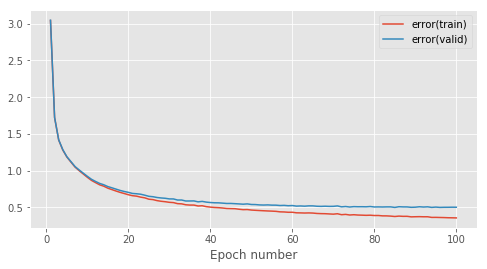

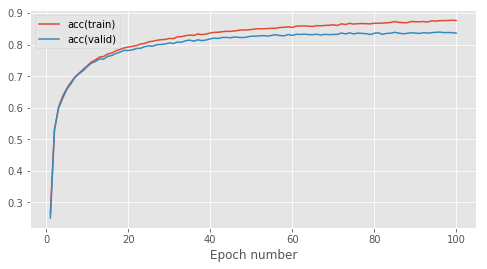

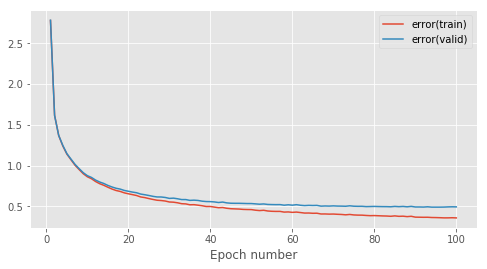

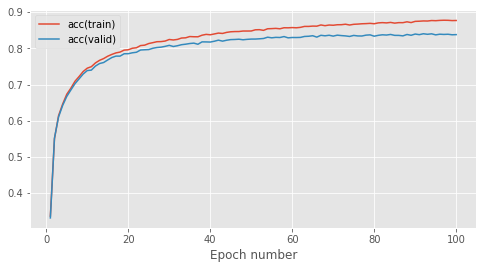

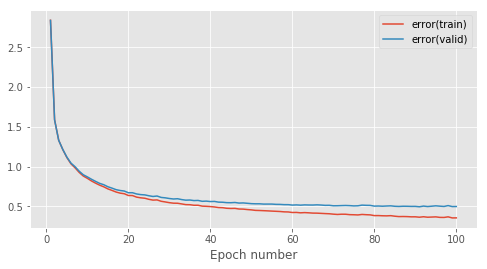

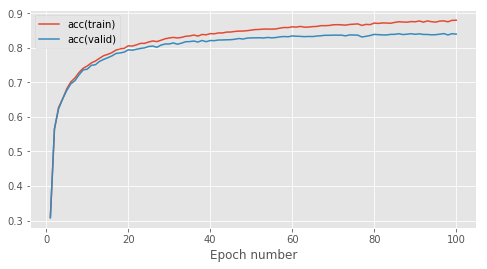

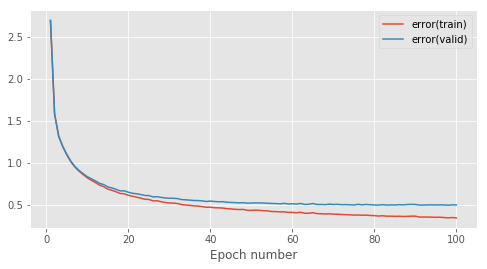

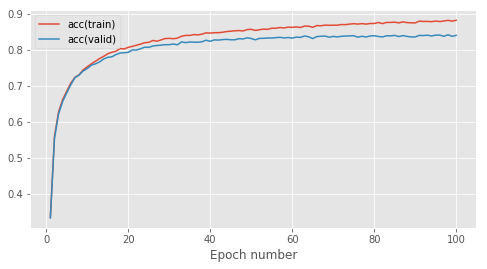

In [3]:
##############SGD With scheduler with no restarts

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

#setup hyperparameters
learning_rate = 0.0075
learning_ranges = [1.05,1.1,1.15,1.2]
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

for learning_range in learning_ranges:
    

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    sgd_scheduler_no_restart = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / learning_range, max_learning_rate=learning_rate * learning_range,
                                                       total_iters_per_period=100,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=1.0)

    error = CrossEntropySoftmaxError()

    # Use a basic gradient descent learning rule
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=sgd_scheduler_no_restart)

learning_rate 0.007875
epoch 1


Epoch 1: 2.8s to complete
    error(train)=2.93e+00, acc(train)=2.95e-01, error(valid)=2.92e+00, acc(valid)=2.96e-01


learning_rate 0.00787211341744548
epoch 2


Epoch 2: 2.7s to complete
    error(train)=1.69e+00, acc(train)=5.41e-01, error(valid)=1.69e+00, acc(valid)=5.37e-01


learning_rate 0.007863499192913159
epoch 3


Epoch 3: 2.6s to complete
    error(train)=1.40e+00, acc(train)=6.08e-01, error(valid)=1.40e+00, acc(valid)=6.01e-01


learning_rate 0.007849293177869806
epoch 4


Epoch 4: 2.7s to complete
    error(train)=1.26e+00, acc(train)=6.45e-01, error(valid)=1.27e+00, acc(valid)=6.38e-01


learning_rate 0.007829719409658915
epoch 5


Epoch 5: 2.7s to complete
    error(train)=1.17e+00, acc(train)=6.67e-01, error(valid)=1.18e+00, acc(valid)=6.61e-01


learning_rate 0.007805086578297972
epoch 6


Epoch 6: 2.7s to complete
    error(train)=1.10e+00, acc(train)=6.85e-01, error(valid)=1.10e+00, acc(valid)=6.79e-01


learning_rate 0.007775783158252481
epoch 7


Epoch 7: 2.7s to complete
    error(train)=1.05e+00, acc(train)=6.94e-01, error(valid)=1.06e+00, acc(valid)=6.90e-01


learning_rate 0.007742271281961574
epoch 8


Epoch 8: 2.7s to complete
    error(train)=9.91e-01, acc(train)=7.13e-01, error(valid)=1.00e+00, acc(valid)=7.07e-01


learning_rate 0.0077050794517333826
epoch 9


Epoch 9: 2.6s to complete
    error(train)=9.43e-01, acc(train)=7.27e-01, error(valid)=9.54e-01, acc(valid)=7.19e-01


learning_rate 0.007664794204947928
epoch 10


Epoch 10: 2.7s to complete
    error(train)=9.01e-01, acc(train)=7.37e-01, error(valid)=9.15e-01, acc(valid)=7.31e-01


learning_rate 0.007622050864012258
epoch 11


Epoch 11: 2.7s to complete
    error(train)=8.74e-01, acc(train)=7.40e-01, error(valid)=8.89e-01, acc(valid)=7.35e-01


learning_rate 0.00757752351694656
epoch 12


Epoch 12: 2.7s to complete
    error(train)=8.43e-01, acc(train)=7.47e-01, error(valid)=8.60e-01, acc(valid)=7.41e-01


learning_rate 0.0075319143866134095
epoch 13


Epoch 13: 2.7s to complete
    error(train)=8.09e-01, acc(train)=7.58e-01, error(valid)=8.27e-01, acc(valid)=7.50e-01


learning_rate 0.007485942756243733
epoch 14


Epoch 14: 2.6s to complete
    error(train)=7.86e-01, acc(train)=7.65e-01, error(valid)=8.06e-01, acc(valid)=7.57e-01


learning_rate 0.007440333625910582
epoch 15


Epoch 15: 2.7s to complete
    error(train)=7.67e-01, acc(train)=7.68e-01, error(valid)=7.87e-01, acc(valid)=7.61e-01


learning_rate 0.007395806278844885
epoch 16


Epoch 16: 2.7s to complete
    error(train)=7.48e-01, acc(train)=7.75e-01, error(valid)=7.70e-01, acc(valid)=7.66e-01


learning_rate 0.007353062937909214
epoch 17


Epoch 17: 2.7s to complete
    error(train)=7.31e-01, acc(train)=7.78e-01, error(valid)=7.55e-01, acc(valid)=7.72e-01


learning_rate 0.00731277769112376
epoch 18


Epoch 18: 2.7s to complete
    error(train)=7.15e-01, acc(train)=7.82e-01, error(valid)=7.40e-01, acc(valid)=7.73e-01


learning_rate 0.007275585860895569
epoch 19


Epoch 19: 2.7s to complete
    error(train)=6.96e-01, acc(train)=7.87e-01, error(valid)=7.22e-01, acc(valid)=7.79e-01


learning_rate 0.007242073984604662
epoch 20


Epoch 20: 2.7s to complete
    error(train)=6.87e-01, acc(train)=7.90e-01, error(valid)=7.14e-01, acc(valid)=7.82e-01


learning_rate 0.0072127705645591705
epoch 21


Epoch 21: 2.7s to complete
    error(train)=6.71e-01, acc(train)=7.93e-01, error(valid)=7.01e-01, acc(valid)=7.84e-01


learning_rate 0.0071881377331982285
epoch 22


Epoch 22: 2.6s to complete
    error(train)=6.61e-01, acc(train)=7.96e-01, error(valid)=6.92e-01, acc(valid)=7.87e-01


learning_rate 0.007168563964987337
epoch 23


Epoch 23: 2.7s to complete
    error(train)=6.50e-01, acc(train)=7.98e-01, error(valid)=6.82e-01, acc(valid)=7.90e-01


learning_rate 0.007154357949943983
epoch 24


Epoch 24: 2.8s to complete
    error(train)=6.41e-01, acc(train)=8.02e-01, error(valid)=6.73e-01, acc(valid)=7.94e-01


learning_rate 0.007145743725411664
epoch 25


Epoch 25: 2.7s to complete
    error(train)=6.26e-01, acc(train)=8.04e-01, error(valid)=6.61e-01, acc(valid)=7.96e-01


learning_rate 0.0070875
epoch 26


Epoch 26: 2.7s to complete
    error(train)=6.15e-01, acc(train)=8.08e-01, error(valid)=6.52e-01, acc(valid)=7.98e-01


learning_rate 0.007087524278809764
epoch 27


Epoch 27: 2.7s to complete
    error(train)=6.10e-01, acc(train)=8.07e-01, error(valid)=6.48e-01, acc(valid)=7.98e-01


learning_rate 0.007087597072645772
epoch 28


Epoch 28: 2.7s to complete
    error(train)=6.02e-01, acc(train)=8.08e-01, error(valid)=6.41e-01, acc(valid)=8.00e-01


learning_rate 0.007087718253802903
epoch 29


Epoch 29: 2.7s to complete
    error(train)=5.92e-01, acc(train)=8.13e-01, error(valid)=6.32e-01, acc(valid)=8.03e-01


learning_rate 0.007087887609688227
epoch 30


Epoch 30: 2.7s to complete
    error(train)=5.88e-01, acc(train)=8.15e-01, error(valid)=6.29e-01, acc(valid)=8.05e-01


learning_rate 0.007088104843193975
epoch 31


Epoch 31: 2.7s to complete
    error(train)=5.77e-01, acc(train)=8.16e-01, error(valid)=6.20e-01, acc(valid)=8.05e-01


learning_rate 0.007088369573218761
epoch 32


Epoch 32: 2.7s to complete
    error(train)=5.70e-01, acc(train)=8.19e-01, error(valid)=6.15e-01, acc(valid)=8.04e-01


learning_rate 0.007088681335336166
epoch 33


Epoch 33: 2.7s to complete
    error(train)=5.68e-01, acc(train)=8.19e-01, error(valid)=6.14e-01, acc(valid)=8.06e-01


learning_rate 0.007089039582609498
epoch 34


Epoch 34: 2.8s to complete
    error(train)=5.58e-01, acc(train)=8.23e-01, error(valid)=6.06e-01, acc(valid)=8.07e-01


learning_rate 0.007089443686551307
epoch 35


Epoch 35: 2.9s to complete
    error(train)=5.50e-01, acc(train)=8.24e-01, error(valid)=5.99e-01, acc(valid)=8.09e-01


learning_rate 0.0070898929382259635
epoch 36


Epoch 36: 2.8s to complete
    error(train)=5.43e-01, acc(train)=8.26e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


learning_rate 0.007090386549493373
epoch 37


Epoch 37: 2.8s to complete
    error(train)=5.44e-01, acc(train)=8.25e-01, error(valid)=5.95e-01, acc(valid)=8.10e-01


learning_rate 0.007090923654391643
epoch 38


Epoch 38: 2.7s to complete
    error(train)=5.37e-01, acc(train)=8.28e-01, error(valid)=5.92e-01, acc(valid)=8.10e-01


learning_rate 0.007091503310656271
epoch 39


Epoch 39: 2.7s to complete
    error(train)=5.27e-01, acc(train)=8.30e-01, error(valid)=5.82e-01, acc(valid)=8.15e-01


learning_rate 0.0070921245013732025
epoch 40


Epoch 40: 2.8s to complete
    error(train)=5.22e-01, acc(train)=8.33e-01, error(valid)=5.79e-01, acc(valid)=8.15e-01


learning_rate 0.0070927861367628365
epoch 41


Epoch 41: 2.8s to complete
    error(train)=5.20e-01, acc(train)=8.33e-01, error(valid)=5.75e-01, acc(valid)=8.16e-01


learning_rate 0.007093487056091874
epoch 42


Epoch 42: 2.8s to complete
    error(train)=5.14e-01, acc(train)=8.34e-01, error(valid)=5.69e-01, acc(valid)=8.16e-01


learning_rate 0.007094226029709639
epoch 43


Epoch 43: 2.8s to complete
    error(train)=5.11e-01, acc(train)=8.35e-01, error(valid)=5.68e-01, acc(valid)=8.19e-01


learning_rate 0.0070950017612053
epoch 44


Epoch 44: 2.7s to complete
    error(train)=5.05e-01, acc(train)=8.36e-01, error(valid)=5.65e-01, acc(valid)=8.18e-01


learning_rate 0.007095812889682219
epoch 45


Epoch 45: 2.8s to complete
    error(train)=4.99e-01, acc(train)=8.38e-01, error(valid)=5.62e-01, acc(valid)=8.19e-01


learning_rate 0.007096657992145424
epoch 46


Epoch 46: 2.7s to complete
    error(train)=4.96e-01, acc(train)=8.40e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


learning_rate 0.007097535585998027
epoch 47


Epoch 47: 2.8s to complete
    error(train)=4.96e-01, acc(train)=8.38e-01, error(valid)=5.59e-01, acc(valid)=8.20e-01


learning_rate 0.007098444131642202
epoch 48


Epoch 48: 2.8s to complete
    error(train)=4.99e-01, acc(train)=8.37e-01, error(valid)=5.66e-01, acc(valid)=8.16e-01


learning_rate 0.007099382035180163
epoch 49


Epoch 49: 2.8s to complete
    error(train)=4.88e-01, acc(train)=8.41e-01, error(valid)=5.55e-01, acc(valid)=8.23e-01


learning_rate 0.007100347651210402
epoch 50


Epoch 50: 2.8s to complete
    error(train)=4.81e-01, acc(train)=8.44e-01, error(valid)=5.48e-01, acc(valid)=8.23e-01


learning_rate 0.0071013392857142855
epoch 51


Epoch 51: 2.7s to complete
    error(train)=4.80e-01, acc(train)=8.43e-01, error(valid)=5.51e-01, acc(valid)=8.21e-01


learning_rate 0.0071023551990279325
epoch 52


Epoch 52: 2.7s to complete
    error(train)=4.77e-01, acc(train)=8.44e-01, error(valid)=5.49e-01, acc(valid)=8.22e-01


learning_rate 0.007103393608894181
epoch 53


Epoch 53: 3.0s to complete
    error(train)=4.71e-01, acc(train)=8.46e-01, error(valid)=5.42e-01, acc(valid)=8.24e-01


learning_rate 0.007104452693589272
epoch 54


Epoch 54: 2.7s to complete
    error(train)=4.69e-01, acc(train)=8.46e-01, error(valid)=5.43e-01, acc(valid)=8.25e-01


learning_rate 0.007105530595118771
epoch 55


Epoch 55: 2.7s to complete
    error(train)=4.72e-01, acc(train)=8.44e-01, error(valid)=5.45e-01, acc(valid)=8.25e-01


learning_rate 0.007106625422477122
epoch 56


Epoch 56: 2.7s to complete
    error(train)=4.66e-01, acc(train)=8.46e-01, error(valid)=5.40e-01, acc(valid)=8.25e-01


learning_rate 0.007107735254965113
epoch 57


Epoch 57: 2.7s to complete
    error(train)=4.61e-01, acc(train)=8.48e-01, error(valid)=5.37e-01, acc(valid)=8.25e-01


learning_rate 0.007108858145559437
epoch 58


Epoch 58: 2.7s to complete
    error(train)=4.58e-01, acc(train)=8.50e-01, error(valid)=5.36e-01, acc(valid)=8.26e-01


learning_rate 0.007109992124328431
epoch 59


Epoch 59: 2.7s to complete
    error(train)=4.54e-01, acc(train)=8.50e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


learning_rate 0.007111135201888005
epoch 60


Epoch 60: 2.7s to complete
    error(train)=4.55e-01, acc(train)=8.48e-01, error(valid)=5.35e-01, acc(valid)=8.23e-01


learning_rate 0.007112285372891699
epoch 61


Epoch 61: 2.7s to complete
    error(train)=4.44e-01, acc(train)=8.54e-01, error(valid)=5.26e-01, acc(valid)=8.28e-01


learning_rate 0.0071134406195487426
epoch 62


Epoch 62: 2.7s to complete
    error(train)=4.44e-01, acc(train)=8.54e-01, error(valid)=5.27e-01, acc(valid)=8.27e-01


learning_rate 0.007114598915163943
epoch 63


Epoch 63: 2.7s to complete
    error(train)=4.46e-01, acc(train)=8.52e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


learning_rate 0.0071157582276932
epoch 64


Epoch 64: 2.8s to complete
    error(train)=4.41e-01, acc(train)=8.55e-01, error(valid)=5.24e-01, acc(valid)=8.29e-01


learning_rate 0.0071169165233084
epoch 65


Epoch 65: 2.7s to complete
    error(train)=4.37e-01, acc(train)=8.55e-01, error(valid)=5.22e-01, acc(valid)=8.30e-01


learning_rate 0.007118071769965444
epoch 66


Epoch 66: 2.7s to complete
    error(train)=4.35e-01, acc(train)=8.56e-01, error(valid)=5.21e-01, acc(valid)=8.29e-01


learning_rate 0.007119221940969138
epoch 67


Epoch 67: 2.7s to complete
    error(train)=4.31e-01, acc(train)=8.57e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


learning_rate 0.007120365018528712
epoch 68


Epoch 68: 2.7s to complete
    error(train)=4.30e-01, acc(train)=8.57e-01, error(valid)=5.18e-01, acc(valid)=8.31e-01


learning_rate 0.007121498997297706
epoch 69


Epoch 69: 2.7s to complete
    error(train)=4.26e-01, acc(train)=8.58e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


learning_rate 0.00712262188789203
epoch 70


Epoch 70: 2.8s to complete
    error(train)=4.26e-01, acc(train)=8.59e-01, error(valid)=5.16e-01, acc(valid)=8.30e-01


learning_rate 0.007123731720380021
epoch 71


Epoch 71: 2.9s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


learning_rate 0.007124826547738372
epoch 72


Epoch 72: 3.0s to complete
    error(train)=4.22e-01, acc(train)=8.59e-01, error(valid)=5.15e-01, acc(valid)=8.31e-01


learning_rate 0.007125904449267871
epoch 73


Epoch 73: 3.1s to complete
    error(train)=4.20e-01, acc(train)=8.60e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


learning_rate 0.007126963533962962
epoch 74


Epoch 74: 3.1s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=5.18e-01, acc(valid)=8.30e-01


learning_rate 0.00712800194382921
epoch 75


Epoch 75: 2.7s to complete
    error(train)=4.18e-01, acc(train)=8.58e-01, error(valid)=5.16e-01, acc(valid)=8.30e-01


learning_rate 0.007129017857142857
epoch 76


Epoch 76: 2.7s to complete
    error(train)=4.17e-01, acc(train)=8.57e-01, error(valid)=5.17e-01, acc(valid)=8.28e-01


learning_rate 0.00713000949164674
epoch 77


Epoch 77: 2.7s to complete
    error(train)=4.13e-01, acc(train)=8.61e-01, error(valid)=5.14e-01, acc(valid)=8.30e-01


learning_rate 0.00713097510767698
epoch 78


Epoch 78: 2.7s to complete
    error(train)=4.15e-01, acc(train)=8.59e-01, error(valid)=5.16e-01, acc(valid)=8.29e-01


learning_rate 0.007131913011214941
epoch 79


Epoch 79: 2.7s to complete
    error(train)=4.11e-01, acc(train)=8.61e-01, error(valid)=5.15e-01, acc(valid)=8.30e-01


learning_rate 0.007132821556859115
epoch 80


Epoch 80: 2.7s to complete
    error(train)=4.12e-01, acc(train)=8.61e-01, error(valid)=5.18e-01, acc(valid)=8.31e-01


learning_rate 0.007133699150711719
epoch 81


Epoch 81: 2.7s to complete
    error(train)=4.09e-01, acc(train)=8.62e-01, error(valid)=5.15e-01, acc(valid)=8.31e-01


learning_rate 0.007134544253174923
epoch 82


Epoch 82: 2.7s to complete
    error(train)=4.02e-01, acc(train)=8.64e-01, error(valid)=5.09e-01, acc(valid)=8.33e-01


learning_rate 0.007135355381651842
epoch 83


Epoch 83: 2.7s to complete
    error(train)=3.99e-01, acc(train)=8.64e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


learning_rate 0.007136131113147504
epoch 84


Epoch 84: 2.7s to complete
    error(train)=4.00e-01, acc(train)=8.65e-01, error(valid)=5.07e-01, acc(valid)=8.33e-01


learning_rate 0.007136870086765269
epoch 85


Epoch 85: 2.7s to complete
    error(train)=4.00e-01, acc(train)=8.64e-01, error(valid)=5.10e-01, acc(valid)=8.32e-01


learning_rate 0.007137571006094306
epoch 86


Epoch 86: 2.7s to complete
    error(train)=3.95e-01, acc(train)=8.66e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


learning_rate 0.00713823264148394
epoch 87


Epoch 87: 2.7s to complete
    error(train)=3.92e-01, acc(train)=8.68e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


learning_rate 0.007138853832200871
epoch 88


Epoch 88: 2.7s to complete
    error(train)=3.91e-01, acc(train)=8.67e-01, error(valid)=5.04e-01, acc(valid)=8.32e-01


learning_rate 0.0071394334884654995
epoch 89


Epoch 89: 2.7s to complete
    error(train)=3.90e-01, acc(train)=8.68e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


learning_rate 0.007139970593363769
epoch 90


Epoch 90: 2.7s to complete
    error(train)=3.91e-01, acc(train)=8.67e-01, error(valid)=5.08e-01, acc(valid)=8.33e-01


learning_rate 0.007140464204631179
epoch 91


Epoch 91: 2.7s to complete
    error(train)=3.97e-01, acc(train)=8.65e-01, error(valid)=5.14e-01, acc(valid)=8.30e-01


learning_rate 0.007140913456305836
epoch 92


Epoch 92: 2.8s to complete
    error(train)=3.86e-01, acc(train)=8.68e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


learning_rate 0.007141317560247645
epoch 93


Epoch 93: 2.7s to complete
    error(train)=3.82e-01, acc(train)=8.70e-01, error(valid)=5.00e-01, acc(valid)=8.35e-01


learning_rate 0.007141675807520976
epoch 94


Epoch 94: 2.7s to complete
    error(train)=3.82e-01, acc(train)=8.69e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01


learning_rate 0.007141987569638381
epoch 95


Epoch 95: 2.7s to complete
    error(train)=3.76e-01, acc(train)=8.73e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


learning_rate 0.0071422522996631675
epoch 96


Epoch 96: 2.7s to complete
    error(train)=3.78e-01, acc(train)=8.71e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


learning_rate 0.0071424695331689155
epoch 97


Epoch 97: 2.7s to complete
    error(train)=3.82e-01, acc(train)=8.70e-01, error(valid)=5.07e-01, acc(valid)=8.33e-01


learning_rate 0.00714263888905424
epoch 98


Epoch 98: 2.7s to complete
    error(train)=3.74e-01, acc(train)=8.72e-01, error(valid)=4.98e-01, acc(valid)=8.37e-01


learning_rate 0.00714276007021137
epoch 99


Epoch 99: 2.7s to complete
    error(train)=3.72e-01, acc(train)=8.72e-01, error(valid)=4.99e-01, acc(valid)=8.37e-01


learning_rate 0.007142832864047379
epoch 100


Epoch 100: 2.7s to complete
    error(train)=3.71e-01, acc(train)=8.74e-01, error(valid)=4.99e-01, acc(valid)=8.36e-01


learning_rate 0.00825
epoch 1


Epoch 1: 2.7s to complete
    error(train)=2.72e+00, acc(train)=3.37e-01, error(valid)=2.72e+00, acc(valid)=3.44e-01


learning_rate 0.008244354842986502
epoch 2


Epoch 2: 2.7s to complete
    error(train)=1.64e+00, acc(train)=5.49e-01, error(valid)=1.64e+00, acc(valid)=5.46e-01


learning_rate 0.008227508399444361
epoch 3


Epoch 3: 2.7s to complete
    error(train)=1.37e+00, acc(train)=6.15e-01, error(valid)=1.38e+00, acc(valid)=6.09e-01


learning_rate 0.008199726347851816
epoch 4


Epoch 4: 2.7s to complete
    error(train)=1.24e+00, acc(train)=6.49e-01, error(valid)=1.25e+00, acc(valid)=6.46e-01


learning_rate 0.008161446827758675
epoch 5


Epoch 5: 2.7s to complete
    error(train)=1.16e+00, acc(train)=6.70e-01, error(valid)=1.16e+00, acc(valid)=6.65e-01


learning_rate 0.008113273530063882
epoch 6


Epoch 6: 2.8s to complete
    error(train)=1.08e+00, acc(train)=6.90e-01, error(valid)=1.09e+00, acc(valid)=6.85e-01


learning_rate 0.00805596617644942
epoch 7


Epoch 7: 2.7s to complete
    error(train)=1.01e+00, acc(train)=7.10e-01, error(valid)=1.03e+00, acc(valid)=7.04e-01


learning_rate 0.007990428538115539
epoch 8


Epoch 8: 2.8s to complete
    error(train)=9.63e-01, acc(train)=7.21e-01, error(valid)=9.73e-01, acc(valid)=7.18e-01


learning_rate 0.007917694182769055
epoch 9


Epoch 9: 2.8s to complete
    error(train)=9.24e-01, acc(train)=7.31e-01, error(valid)=9.35e-01, acc(valid)=7.27e-01


learning_rate 0.007838910174643178
epoch 10


Epoch 10: 3.0s to complete
    error(train)=8.85e-01, acc(train)=7.42e-01, error(valid)=8.97e-01, acc(valid)=7.37e-01


learning_rate 0.007755318984609337
epoch 11


Epoch 11: 2.8s to complete
    error(train)=8.46e-01, acc(train)=7.52e-01, error(valid)=8.58e-01, acc(valid)=7.46e-01


learning_rate 0.007668238895669325
epoch 12


Epoch 12: 2.7s to complete
    error(train)=8.22e-01, acc(train)=7.56e-01, error(valid)=8.37e-01, acc(valid)=7.50e-01


learning_rate 0.007579043212844849
epoch 13


Epoch 13: 2.8s to complete
    error(train)=7.92e-01, acc(train)=7.64e-01, error(valid)=8.07e-01, acc(valid)=7.58e-01


learning_rate 0.007489138605336968
epoch 14


Epoch 14: 2.8s to complete
    error(train)=7.75e-01, acc(train)=7.69e-01, error(valid)=7.90e-01, acc(valid)=7.61e-01


learning_rate 0.007399942922512492
epoch 15


Epoch 15: 2.7s to complete
    error(train)=7.52e-01, acc(train)=7.73e-01, error(valid)=7.70e-01, acc(valid)=7.68e-01


learning_rate 0.00731286283357248
epoch 16


Epoch 16: 2.8s to complete
    error(train)=7.35e-01, acc(train)=7.78e-01, error(valid)=7.54e-01, acc(valid)=7.72e-01


learning_rate 0.007229271643538641
epoch 17


Epoch 17: 2.7s to complete
    error(train)=7.18e-01, acc(train)=7.81e-01, error(valid)=7.38e-01, acc(valid)=7.76e-01


learning_rate 0.007150487635412763
epoch 18


Epoch 18: 2.7s to complete
    error(train)=7.00e-01, acc(train)=7.87e-01, error(valid)=7.22e-01, acc(valid)=7.81e-01


learning_rate 0.007077753280066278
epoch 19


Epoch 19: 2.7s to complete
    error(train)=6.93e-01, acc(train)=7.88e-01, error(valid)=7.18e-01, acc(valid)=7.81e-01


learning_rate 0.007012215641732398
epoch 20


Epoch 20: 2.8s to complete
    error(train)=6.77e-01, acc(train)=7.92e-01, error(valid)=7.02e-01, acc(valid)=7.84e-01


learning_rate 0.006954908288117934
epoch 21


Epoch 21: 2.7s to complete
    error(train)=6.62e-01, acc(train)=7.97e-01, error(valid)=6.88e-01, acc(valid)=7.90e-01


learning_rate 0.006906734990423142
epoch 22


Epoch 22: 2.8s to complete
    error(train)=6.53e-01, acc(train)=7.97e-01, error(valid)=6.81e-01, acc(valid)=7.89e-01


learning_rate 0.0068684554703300005
epoch 23


Epoch 23: 2.8s to complete
    error(train)=6.45e-01, acc(train)=7.99e-01, error(valid)=6.75e-01, acc(valid)=7.88e-01


learning_rate 0.006840673418737456
epoch 24


Epoch 24: 2.7s to complete
    error(train)=6.33e-01, acc(train)=8.01e-01, error(valid)=6.63e-01, acc(valid)=7.91e-01


learning_rate 0.006823826975195316
epoch 25


Epoch 25: 2.7s to complete
    error(train)=6.18e-01, acc(train)=8.08e-01, error(valid)=6.52e-01, acc(valid)=7.96e-01


learning_rate 0.007425
epoch 26


Epoch 26: 2.7s to complete
    error(train)=6.09e-01, acc(train)=8.11e-01, error(valid)=6.43e-01, acc(valid)=8.01e-01


learning_rate 0.007424733858677722
epoch 27


Epoch 27: 2.7s to complete
    error(train)=6.04e-01, acc(train)=8.11e-01, error(valid)=6.41e-01, acc(valid)=7.99e-01


learning_rate 0.007423935901613202
epoch 28


Epoch 28: 2.8s to complete
    error(train)=5.97e-01, acc(train)=8.13e-01, error(valid)=6.35e-01, acc(valid)=8.01e-01


learning_rate 0.00742260752869428
epoch 29


Epoch 29: 2.7s to complete
    error(train)=5.87e-01, acc(train)=8.16e-01, error(valid)=6.24e-01, acc(valid)=8.04e-01


learning_rate 0.007420751070338438
epoch 30


Epoch 30: 2.7s to complete
    error(train)=5.77e-01, acc(train)=8.20e-01, error(valid)=6.18e-01, acc(valid)=8.08e-01


learning_rate 0.007418369783404462
epoch 31


Epoch 31: 2.8s to complete
    error(train)=5.70e-01, acc(train)=8.20e-01, error(valid)=6.11e-01, acc(valid)=8.04e-01


learning_rate 0.007415467845478801
epoch 32


Epoch 32: 2.8s to complete
    error(train)=5.63e-01, acc(train)=8.22e-01, error(valid)=6.06e-01, acc(valid)=8.09e-01


learning_rate 0.0074120503475466615
epoch 33


Epoch 33: 2.8s to complete
    error(train)=5.53e-01, acc(train)=8.24e-01, error(valid)=5.98e-01, acc(valid)=8.11e-01


learning_rate 0.00740812328506069
epoch 34


Epoch 34: 2.7s to complete
    error(train)=5.48e-01, acc(train)=8.27e-01, error(valid)=5.95e-01, acc(valid)=8.13e-01


learning_rate 0.007403693547422913
epoch 35


Epoch 35: 2.8s to complete
    error(train)=5.49e-01, acc(train)=8.25e-01, error(valid)=5.98e-01, acc(valid)=8.11e-01


learning_rate 0.00739876890589838
epoch 36


Epoch 36: 2.8s to complete
    error(train)=5.39e-01, acc(train)=8.28e-01, error(valid)=5.89e-01, acc(valid)=8.15e-01


learning_rate 0.007393357999981731
epoch 37


Epoch 37: 2.7s to complete
    error(train)=5.34e-01, acc(train)=8.29e-01, error(valid)=5.86e-01, acc(valid)=8.14e-01


learning_rate 0.007387470322240582
epoch 38


Epoch 38: 2.8s to complete
    error(train)=5.32e-01, acc(train)=8.30e-01, error(valid)=5.86e-01, acc(valid)=8.16e-01


learning_rate 0.007381116201662335
epoch 39


Epoch 39: 3.0s to complete
    error(train)=5.23e-01, acc(train)=8.32e-01, error(valid)=5.77e-01, acc(valid)=8.16e-01


learning_rate 0.007374306785533633
epoch 40


Epoch 40: 2.8s to complete
    error(train)=5.30e-01, acc(train)=8.27e-01, error(valid)=5.85e-01, acc(valid)=8.09e-01


learning_rate 0.007367054019884217
epoch 41


Epoch 41: 2.7s to complete
    error(train)=5.14e-01, acc(train)=8.33e-01, error(valid)=5.70e-01, acc(valid)=8.17e-01


learning_rate 0.007359370628529545
epoch 42


Epoch 42: 2.8s to complete
    error(train)=5.04e-01, acc(train)=8.38e-01, error(valid)=5.62e-01, acc(valid)=8.23e-01


learning_rate 0.007351270090748885
epoch 43


Epoch 43: 2.8s to complete
    error(train)=5.03e-01, acc(train)=8.38e-01, error(valid)=5.62e-01, acc(valid)=8.19e-01


learning_rate 0.007342766617638087
epoch 44


Epoch 44: 2.8s to complete
    error(train)=4.96e-01, acc(train)=8.40e-01, error(valid)=5.57e-01, acc(valid)=8.23e-01


learning_rate 0.007333875127178487
epoch 45


Epoch 45: 2.8s to complete
    error(train)=4.94e-01, acc(train)=8.40e-01, error(valid)=5.56e-01, acc(valid)=8.22e-01


learning_rate 0.007324611218065699
epoch 46


Epoch 46: 3.2s to complete
    error(train)=4.90e-01, acc(train)=8.41e-01, error(valid)=5.52e-01, acc(valid)=8.22e-01


learning_rate 0.007314991142344205
epoch 47


Epoch 47: 2.9s to complete
    error(train)=4.87e-01, acc(train)=8.42e-01, error(valid)=5.51e-01, acc(valid)=8.24e-01


learning_rate 0.007305031776895743
epoch 48


Epoch 48: 3.7s to complete
    error(train)=4.85e-01, acc(train)=8.42e-01, error(valid)=5.50e-01, acc(valid)=8.22e-01


learning_rate 0.0072947505938315265
epoch 49


Epoch 49: 2.7s to complete
    error(train)=4.78e-01, acc(train)=8.44e-01, error(valid)=5.45e-01, acc(valid)=8.26e-01


learning_rate 0.007284165629840218
epoch 50


Epoch 50: 2.7s to complete
    error(train)=4.73e-01, acc(train)=8.46e-01, error(valid)=5.42e-01, acc(valid)=8.24e-01


learning_rate 0.007273295454545454
epoch 51


Epoch 51: 2.7s to complete
    error(train)=4.69e-01, acc(train)=8.46e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


learning_rate 0.007262159137928412
epoch 52


Epoch 52: 2.7s to complete
    error(train)=4.63e-01, acc(train)=8.49e-01, error(valid)=5.33e-01, acc(valid)=8.29e-01


learning_rate 0.007250776216872585
epoch 53


Epoch 53: 2.7s to complete
    error(train)=4.64e-01, acc(train)=8.49e-01, error(valid)=5.38e-01, acc(valid)=8.28e-01


learning_rate 0.007239166660889445
epoch 54


Epoch 54: 2.8s to complete
    error(train)=4.67e-01, acc(train)=8.45e-01, error(valid)=5.41e-01, acc(valid)=8.23e-01


learning_rate 0.007227350837085141
epoch 55


Epoch 55: 2.8s to complete
    error(train)=4.62e-01, acc(train)=8.48e-01, error(valid)=5.39e-01, acc(valid)=8.25e-01


learning_rate 0.007215349474429671
epoch 56


Epoch 56: 2.8s to complete
    error(train)=4.57e-01, acc(train)=8.50e-01, error(valid)=5.33e-01, acc(valid)=8.27e-01


learning_rate 0.0072031836273912225
epoch 57


Epoch 57: 2.7s to complete
    error(train)=4.49e-01, acc(train)=8.54e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


learning_rate 0.0071908746389994825
epoch 58


Epoch 58: 2.7s to complete
    error(train)=4.47e-01, acc(train)=8.53e-01, error(valid)=5.27e-01, acc(valid)=8.34e-01


learning_rate 0.007178444103402714
epoch 59


Epoch 59: 2.8s to complete
    error(train)=4.49e-01, acc(train)=8.51e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


learning_rate 0.007165913827984277
epoch 60


Epoch 60: 2.7s to complete
    error(train)=4.40e-01, acc(train)=8.55e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


learning_rate 0.007153305795105072
epoch 61


Epoch 61: 2.8s to complete
    error(train)=4.39e-01, acc(train)=8.55e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


learning_rate 0.007140642123539007
epoch 62


Epoch 62: 2.8s to complete
    error(train)=4.40e-01, acc(train)=8.53e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


learning_rate 0.007127945029669154
epoch 63


Epoch 63: 2.8s to complete
    error(train)=4.42e-01, acc(train)=8.52e-01, error(valid)=5.28e-01, acc(valid)=8.27e-01


learning_rate 0.007115236788512663
epoch 64


Epoch 64: 2.8s to complete
    error(train)=4.31e-01, acc(train)=8.59e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


learning_rate 0.00710253969464281
epoch 65


Epoch 65: 2.8s to complete
    error(train)=4.33e-01, acc(train)=8.56e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


learning_rate 0.0070898760230767455
epoch 66


Epoch 66: 2.8s to complete
    error(train)=4.35e-01, acc(train)=8.55e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


learning_rate 0.00707726799019754
epoch 67


Epoch 67: 3.3s to complete
    error(train)=4.28e-01, acc(train)=8.57e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


learning_rate 0.007064737714779104
epoch 68


Epoch 68: 2.8s to complete
    error(train)=4.21e-01, acc(train)=8.61e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


learning_rate 0.007052307179182335
epoch 69


Epoch 69: 2.8s to complete
    error(train)=4.21e-01, acc(train)=8.61e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


learning_rate 0.007039998190790595
epoch 70


Epoch 70: 2.7s to complete
    error(train)=4.21e-01, acc(train)=8.59e-01, error(valid)=5.18e-01, acc(valid)=8.35e-01


learning_rate 0.007027832343752146
epoch 71


Epoch 71: 2.7s to complete
    error(train)=4.18e-01, acc(train)=8.61e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


learning_rate 0.007015830981096676
epoch 72


Epoch 72: 2.7s to complete
    error(train)=4.15e-01, acc(train)=8.63e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


learning_rate 0.007004015157292372
epoch 73


Epoch 73: 2.7s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


learning_rate 0.006992405601309233
epoch 74


Epoch 74: 2.7s to complete
    error(train)=4.08e-01, acc(train)=8.66e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


learning_rate 0.006981022680253405
epoch 75


Epoch 75: 2.7s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


learning_rate 0.006969886363636363
epoch 76


Epoch 76: 2.7s to complete
    error(train)=4.07e-01, acc(train)=8.64e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


learning_rate 0.0069590161883415986
epoch 77


Epoch 77: 2.8s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


learning_rate 0.006948431224350291
epoch 78


Epoch 78: 2.7s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


learning_rate 0.006938150041286074
epoch 79


Epoch 79: 2.8s to complete
    error(train)=4.02e-01, acc(train)=8.66e-01, error(valid)=5.11e-01, acc(valid)=8.39e-01


learning_rate 0.006928190675837612
epoch 80


Epoch 80: 2.7s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


learning_rate 0.006918570600116118
epoch 81


Epoch 81: 2.7s to complete
    error(train)=3.96e-01, acc(train)=8.68e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


learning_rate 0.0069093066910033306
epoch 82


Epoch 82: 2.7s to complete
    error(train)=3.91e-01, acc(train)=8.69e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


learning_rate 0.00690041520054373
epoch 83


Epoch 83: 2.7s to complete
    error(train)=3.94e-01, acc(train)=8.68e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


learning_rate 0.006891911727432932
epoch 84


Epoch 84: 2.8s to complete
    error(train)=3.94e-01, acc(train)=8.67e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


learning_rate 0.006883811189652272
epoch 85


Epoch 85: 2.7s to complete
    error(train)=3.90e-01, acc(train)=8.68e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


learning_rate 0.0068761277982976
epoch 86


Epoch 86: 2.7s to complete
    error(train)=3.86e-01, acc(train)=8.71e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


learning_rate 0.0068688750326481845
epoch 87


Epoch 87: 2.8s to complete
    error(train)=3.85e-01, acc(train)=8.70e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


learning_rate 0.006862065616519482
epoch 88


Epoch 88: 2.7s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


learning_rate 0.006855711495941236
epoch 89


Epoch 89: 2.7s to complete
    error(train)=3.83e-01, acc(train)=8.72e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


learning_rate 0.006849823818200086
epoch 90


Epoch 90: 2.7s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


learning_rate 0.006844412912283437
epoch 91


Epoch 91: 2.7s to complete
    error(train)=3.78e-01, acc(train)=8.72e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


learning_rate 0.006839488270758904
epoch 92


Epoch 92: 2.7s to complete
    error(train)=3.75e-01, acc(train)=8.74e-01, error(valid)=4.99e-01, acc(valid)=8.39e-01


learning_rate 0.006835058533121127
epoch 93


Epoch 93: 2.8s to complete
    error(train)=3.81e-01, acc(train)=8.70e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


learning_rate 0.006831131470635156
epoch 94


Epoch 94: 2.7s to complete
    error(train)=3.74e-01, acc(train)=8.74e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


learning_rate 0.006827713972703016
epoch 95


Epoch 95: 2.7s to complete
    error(train)=3.71e-01, acc(train)=8.75e-01, error(valid)=5.00e-01, acc(valid)=8.40e-01


learning_rate 0.006824812034777356
epoch 96


Epoch 96: 3.2s to complete
    error(train)=3.71e-01, acc(train)=8.75e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


learning_rate 0.00682243074784338
epoch 97


Epoch 97: 2.7s to complete
    error(train)=3.68e-01, acc(train)=8.75e-01, error(valid)=5.00e-01, acc(valid)=8.40e-01


learning_rate 0.006820574289487538
epoch 98


Epoch 98: 2.8s to complete
    error(train)=3.71e-01, acc(train)=8.75e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


learning_rate 0.006819245916568615
epoch 99


Epoch 99: 2.8s to complete
    error(train)=3.72e-01, acc(train)=8.74e-01, error(valid)=5.07e-01, acc(valid)=8.34e-01


learning_rate 0.006818447959504095
epoch 100


Epoch 100: 2.8s to complete
    error(train)=3.66e-01, acc(train)=8.75e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


learning_rate 0.008624999999999999
epoch 1


Epoch 1: 2.8s to complete
    error(train)=2.57e+00, acc(train)=3.84e-01, error(valid)=2.56e+00, acc(valid)=3.81e-01


learning_rate 0.008616707579914952
epoch 2


Epoch 2: 2.7s to complete
    error(train)=1.58e+00, acc(train)=5.58e-01, error(valid)=1.58e+00, acc(valid)=5.54e-01


learning_rate 0.008591961096078207
epoch 3


Epoch 3: 2.7s to complete
    error(train)=1.33e+00, acc(train)=6.27e-01, error(valid)=1.33e+00, acc(valid)=6.19e-01


learning_rate 0.008551150815322699
epoch 4


Epoch 4: 2.7s to complete
    error(train)=1.21e+00, acc(train)=6.57e-01, error(valid)=1.22e+00, acc(valid)=6.49e-01


learning_rate 0.008494920340154822
epoch 5


Epoch 5: 2.8s to complete
    error(train)=1.12e+00, acc(train)=6.78e-01, error(valid)=1.13e+00, acc(valid)=6.75e-01


learning_rate 0.008424156458758436
epoch 6


Epoch 6: 2.8s to complete
    error(train)=1.05e+00, acc(train)=6.98e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01


learning_rate 0.00833997515981545
epoch 7


Epoch 7: 2.8s to complete
    error(train)=9.87e-01, acc(train)=7.14e-01, error(valid)=9.97e-01, acc(valid)=7.09e-01


learning_rate 0.00824370403269767
epoch 8


Epoch 8: 2.8s to complete
    error(train)=9.33e-01, acc(train)=7.28e-01, error(valid)=9.46e-01, acc(valid)=7.22e-01


learning_rate 0.008136861330589325
epoch 9


Epoch 9: 2.7s to complete
    error(train)=8.91e-01, acc(train)=7.37e-01, error(valid)=9.03e-01, acc(valid)=7.32e-01


learning_rate 0.008021132026727398
epoch 10


Epoch 10: 2.7s to complete
    error(train)=8.49e-01, acc(train)=7.49e-01, error(valid)=8.63e-01, acc(valid)=7.44e-01


learning_rate 0.00789834124136713
epoch 11


Epoch 11: 2.7s to complete
    error(train)=8.19e-01, acc(train)=7.56e-01, error(valid)=8.34e-01, acc(valid)=7.50e-01


learning_rate 0.007770425458545314
epoch 12


Epoch 12: 2.8s to complete
    error(train)=7.94e-01, acc(train)=7.61e-01, error(valid)=8.11e-01, acc(valid)=7.56e-01


learning_rate 0.007639401986570229
epoch 13


Epoch 13: 2.7s to complete
    error(train)=7.66e-01, acc(train)=7.69e-01, error(valid)=7.84e-01, acc(valid)=7.64e-01


learning_rate 0.007507337143864553
epoch 14


Epoch 14: 2.7s to complete
    error(train)=7.46e-01, acc(train)=7.74e-01, error(valid)=7.64e-01, acc(valid)=7.67e-01


learning_rate 0.007376313671889468
epoch 15


Epoch 15: 2.7s to complete
    error(train)=7.22e-01, acc(train)=7.81e-01, error(valid)=7.42e-01, acc(valid)=7.75e-01


learning_rate 0.00724839788906765
epoch 16


Epoch 16: 2.7s to complete
    error(train)=7.06e-01, acc(train)=7.84e-01, error(valid)=7.29e-01, acc(valid)=7.76e-01


learning_rate 0.007125607103707383
epoch 17


Epoch 17: 2.7s to complete
    error(train)=6.94e-01, acc(train)=7.87e-01, error(valid)=7.18e-01, acc(valid)=7.79e-01


learning_rate 0.0070098777998454575
epoch 18


Epoch 18: 2.7s to complete
    error(train)=6.79e-01, acc(train)=7.92e-01, error(valid)=7.05e-01, acc(valid)=7.82e-01


learning_rate 0.006903035097737112
epoch 19


Epoch 19: 3.0s to complete
    error(train)=6.65e-01, acc(train)=7.98e-01, error(valid)=6.92e-01, acc(valid)=7.87e-01


learning_rate 0.006806763970619331
epoch 20


Epoch 20: 3.1s to complete
    error(train)=6.49e-01, acc(train)=8.01e-01, error(valid)=6.76e-01, acc(valid)=7.90e-01


learning_rate 0.006722582671676347
epoch 21


Epoch 21: 3.5s to complete
    error(train)=6.41e-01, acc(train)=8.02e-01, error(valid)=6.70e-01, acc(valid)=7.93e-01


learning_rate 0.006651818790279959
epoch 22


Epoch 22: 3.3s to complete
    error(train)=6.26e-01, acc(train)=8.07e-01, error(valid)=6.58e-01, acc(valid)=7.94e-01


learning_rate 0.006595588315112084
epoch 23


Epoch 23: 2.7s to complete
    error(train)=6.20e-01, acc(train)=8.08e-01, error(valid)=6.54e-01, acc(valid)=7.97e-01


learning_rate 0.0065547780343565756
epoch 24


Epoch 24: 2.8s to complete
    error(train)=6.10e-01, acc(train)=8.10e-01, error(valid)=6.44e-01, acc(valid)=8.00e-01


learning_rate 0.00653003155051983
epoch 25


Epoch 25: 2.7s to complete
    error(train)=6.05e-01, acc(train)=8.13e-01, error(valid)=6.41e-01, acc(valid)=7.99e-01


learning_rate 0.0077624999999999994
epoch 26


Epoch 26: 2.8s to complete
    error(train)=5.94e-01, acc(train)=8.15e-01, error(valid)=6.29e-01, acc(valid)=8.04e-01


learning_rate 0.0077619558209553515
epoch 27


Epoch 27: 2.8s to complete
    error(train)=5.92e-01, acc(train)=8.15e-01, error(valid)=6.30e-01, acc(valid)=8.02e-01


learning_rate 0.007760324238496363
epoch 28


Epoch 28: 2.8s to complete
    error(train)=5.77e-01, acc(train)=8.18e-01, error(valid)=6.18e-01, acc(valid)=8.07e-01


learning_rate 0.007757608114973084
epoch 29


Epoch 29: 2.8s to complete
    error(train)=5.77e-01, acc(train)=8.17e-01, error(valid)=6.20e-01, acc(valid)=8.03e-01


learning_rate 0.00775381221538912
epoch 30


Epoch 30: 2.7s to complete
    error(train)=5.71e-01, acc(train)=8.19e-01, error(valid)=6.14e-01, acc(valid)=8.09e-01


learning_rate 0.0077489431990421945
epoch 31


Epoch 31: 2.8s to complete
    error(train)=5.55e-01, acc(train)=8.23e-01, error(valid)=5.98e-01, acc(valid)=8.10e-01


learning_rate 0.007743009607841484
epoch 32


Epoch 32: 2.8s to complete
    error(train)=5.52e-01, acc(train)=8.24e-01, error(valid)=5.98e-01, acc(valid)=8.09e-01


learning_rate 0.007736021851322203
epoch 33


Epoch 33: 2.8s to complete
    error(train)=5.46e-01, acc(train)=8.25e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


learning_rate 0.007727992188383741
epoch 34


Epoch 34: 2.8s to complete
    error(train)=5.34e-01, acc(train)=8.30e-01, error(valid)=5.84e-01, acc(valid)=8.15e-01


learning_rate 0.00771893470578339
epoch 35


Epoch 35: 2.8s to complete
    error(train)=5.30e-01, acc(train)=8.32e-01, error(valid)=5.79e-01, acc(valid)=8.14e-01


learning_rate 0.007708865293423385
epoch 36


Epoch 36: 2.8s to complete
    error(train)=5.25e-01, acc(train)=8.33e-01, error(valid)=5.78e-01, acc(valid)=8.17e-01


learning_rate 0.007697801616474613
epoch 37


Epoch 37: 2.9s to complete
    error(train)=5.23e-01, acc(train)=8.32e-01, error(valid)=5.78e-01, acc(valid)=8.16e-01


learning_rate 0.007685763084385907
epoch 38


Epoch 38: 2.8s to complete
    error(train)=5.13e-01, acc(train)=8.36e-01, error(valid)=5.69e-01, acc(valid)=8.19e-01


learning_rate 0.00767277081683327
epoch 39


Epoch 39: 2.8s to complete
    error(train)=5.05e-01, acc(train)=8.39e-01, error(valid)=5.61e-01, acc(valid)=8.22e-01


learning_rate 0.007658847606668792
epoch 40


Epoch 40: 2.8s to complete
    error(train)=5.05e-01, acc(train)=8.36e-01, error(valid)=5.64e-01, acc(valid)=8.22e-01


learning_rate 0.0076440178799342395
epoch 41


Epoch 41: 2.9s to complete
    error(train)=4.98e-01, acc(train)=8.40e-01, error(valid)=5.58e-01, acc(valid)=8.22e-01


learning_rate 0.007628307653009481
epoch 42


Epoch 42: 2.8s to complete
    error(train)=4.93e-01, acc(train)=8.41e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


learning_rate 0.0076117444869709125
epoch 43


Epoch 43: 2.9s to complete
    error(train)=4.96e-01, acc(train)=8.39e-01, error(valid)=5.58e-01, acc(valid)=8.25e-01


learning_rate 0.007594357439239968
epoch 44


Epoch 44: 2.9s to complete
    error(train)=4.94e-01, acc(train)=8.38e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


learning_rate 0.007576177012606525
epoch 45


Epoch 45: 2.8s to complete
    error(train)=4.85e-01, acc(train)=8.42e-01, error(valid)=5.53e-01, acc(valid)=8.24e-01


learning_rate 0.00755723510171665
epoch 46


Epoch 46: 2.9s to complete
    error(train)=4.80e-01, acc(train)=8.44e-01, error(valid)=5.48e-01, acc(valid)=8.24e-01


learning_rate 0.007537564937118548
epoch 47


Epoch 47: 2.9s to complete
    error(train)=4.75e-01, acc(train)=8.45e-01, error(valid)=5.46e-01, acc(valid)=8.25e-01


learning_rate 0.0075172010269648915
epoch 48


Epoch 48: 2.9s to complete
    error(train)=4.76e-01, acc(train)=8.44e-01, error(valid)=5.47e-01, acc(valid)=8.27e-01


learning_rate 0.007496179096473793
epoch 49


Epoch 49: 2.9s to complete
    error(train)=4.68e-01, acc(train)=8.47e-01, error(valid)=5.39e-01, acc(valid)=8.26e-01


learning_rate 0.007474536025254633
epoch 50


Epoch 50: 2.8s to complete
    error(train)=4.67e-01, acc(train)=8.47e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


learning_rate 0.007452309782608696
epoch 51


Epoch 51: 2.8s to complete
    error(train)=4.58e-01, acc(train)=8.51e-01, error(valid)=5.34e-01, acc(valid)=8.32e-01


learning_rate 0.007429539360918109
epoch 52


Epoch 52: 2.8s to complete
    error(train)=4.57e-01, acc(train)=8.50e-01, error(valid)=5.36e-01, acc(valid)=8.30e-01


learning_rate 0.007406264707239962
epoch 53


Epoch 53: 2.8s to complete
    error(train)=4.54e-01, acc(train)=8.51e-01, error(valid)=5.32e-01, acc(valid)=8.29e-01


learning_rate 0.007382526653225584
epoch 54


Epoch 54: 2.7s to complete
    error(train)=4.54e-01, acc(train)=8.50e-01, error(valid)=5.34e-01, acc(valid)=8.30e-01


learning_rate 0.0073583668434879625
epoch 55


Epoch 55: 2.8s to complete
    error(train)=4.47e-01, acc(train)=8.53e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


learning_rate 0.007333827662542936
epoch 56


Epoch 56: 2.7s to complete
    error(train)=4.48e-01, acc(train)=8.52e-01, error(valid)=5.32e-01, acc(valid)=8.30e-01


learning_rate 0.007308952160452351
epoch 57


Epoch 57: 2.7s to complete
    error(train)=4.43e-01, acc(train)=8.54e-01, error(valid)=5.30e-01, acc(valid)=8.31e-01


learning_rate 0.007283783977299627
epoch 58


Epoch 58: 2.7s to complete
    error(train)=4.41e-01, acc(train)=8.52e-01, error(valid)=5.27e-01, acc(valid)=8.28e-01


learning_rate 0.00725836726663022
epoch 59


Epoch 59: 2.8s to complete
    error(train)=4.47e-01, acc(train)=8.51e-01, error(valid)=5.36e-01, acc(valid)=8.26e-01


learning_rate 0.0072327466179913005
epoch 60


Epoch 60: 2.8s to complete
    error(train)=4.36e-01, acc(train)=8.55e-01, error(valid)=5.25e-01, acc(valid)=8.27e-01


learning_rate 0.007206966978706536
epoch 61


Epoch 61: 2.8s to complete
    error(train)=4.32e-01, acc(train)=8.56e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


learning_rate 0.007181073575023213
epoch 62


Epoch 62: 2.8s to complete
    error(train)=4.34e-01, acc(train)=8.56e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


learning_rate 0.007155111832770028
epoch 63


Epoch 63: 2.8s to complete
    error(train)=4.26e-01, acc(train)=8.59e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


learning_rate 0.007129127297664755
epoch 64


Epoch 64: 2.8s to complete
    error(train)=4.22e-01, acc(train)=8.60e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


learning_rate 0.00710316555541157
epoch 65


Epoch 65: 2.8s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


learning_rate 0.007077272151728247
epoch 66


Epoch 66: 2.8s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


learning_rate 0.007051492512443482
epoch 67


Epoch 67: 2.8s to complete
    error(train)=4.22e-01, acc(train)=8.58e-01, error(valid)=5.20e-01, acc(valid)=8.30e-01


learning_rate 0.007025871863804563
epoch 68


Epoch 68: 2.8s to complete
    error(train)=4.20e-01, acc(train)=8.59e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


learning_rate 0.007000455153135156
epoch 69


Epoch 69: 2.8s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


learning_rate 0.006975286969982432
epoch 70


Epoch 70: 2.7s to complete
    error(train)=4.14e-01, acc(train)=8.62e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


learning_rate 0.006950411467891847
epoch 71


Epoch 71: 2.7s to complete
    error(train)=4.11e-01, acc(train)=8.62e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


learning_rate 0.00692587228694682
epoch 72


Epoch 72: 2.8s to complete
    error(train)=4.14e-01, acc(train)=8.61e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


learning_rate 0.006901712477209198
epoch 73


Epoch 73: 2.8s to complete
    error(train)=4.09e-01, acc(train)=8.63e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


learning_rate 0.006877974423194821
epoch 74


Epoch 74: 2.8s to complete
    error(train)=4.04e-01, acc(train)=8.65e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


learning_rate 0.006854699769516673
epoch 75


Epoch 75: 2.8s to complete
    error(train)=4.02e-01, acc(train)=8.66e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


learning_rate 0.006831929347826087
epoch 76


Epoch 76: 2.8s to complete
    error(train)=4.04e-01, acc(train)=8.64e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


learning_rate 0.00680970310518015
epoch 77


Epoch 77: 2.8s to complete
    error(train)=4.01e-01, acc(train)=8.64e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


learning_rate 0.0067880600339609905
epoch 78


Epoch 78: 2.8s to complete
    error(train)=4.02e-01, acc(train)=8.65e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


learning_rate 0.006767038103469891
epoch 79


Epoch 79: 2.8s to complete
    error(train)=3.99e-01, acc(train)=8.64e-01, error(valid)=5.16e-01, acc(valid)=8.30e-01


learning_rate 0.006746674193316234
epoch 80


Epoch 80: 3.0s to complete
    error(train)=3.96e-01, acc(train)=8.66e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


learning_rate 0.006727004028718133
epoch 81


Epoch 81: 2.8s to complete
    error(train)=3.97e-01, acc(train)=8.66e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


learning_rate 0.0067080621178282574
epoch 82


Epoch 82: 2.8s to complete
    error(train)=3.96e-01, acc(train)=8.67e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


learning_rate 0.006689881691194815
epoch 83


Epoch 83: 2.8s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


learning_rate 0.00667249464346387
epoch 84


Epoch 84: 2.8s to complete
    error(train)=3.85e-01, acc(train)=8.71e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


learning_rate 0.006655931477425301
epoch 85


Epoch 85: 2.8s to complete
    error(train)=3.85e-01, acc(train)=8.71e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


learning_rate 0.006640221250500542
epoch 86


Epoch 86: 2.8s to complete
    error(train)=3.85e-01, acc(train)=8.69e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


learning_rate 0.00662539152376599
epoch 87


Epoch 87: 2.8s to complete
    error(train)=3.79e-01, acc(train)=8.72e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


learning_rate 0.0066114683136015125
epoch 88


Epoch 88: 2.8s to complete
    error(train)=3.81e-01, acc(train)=8.71e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


learning_rate 0.0065984760460488755
epoch 89


Epoch 89: 2.8s to complete
    error(train)=3.78e-01, acc(train)=8.72e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


learning_rate 0.006586437513960169
epoch 90


Epoch 90: 2.8s to complete
    error(train)=3.78e-01, acc(train)=8.70e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


learning_rate 0.0065753738370113975
epoch 91


Epoch 91: 2.9s to complete
    error(train)=3.76e-01, acc(train)=8.73e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


learning_rate 0.006565304424651392
epoch 92


Epoch 92: 3.2s to complete
    error(train)=3.75e-01, acc(train)=8.72e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


learning_rate 0.006556246942051041
epoch 93


Epoch 93: 3.1s to complete
    error(train)=3.79e-01, acc(train)=8.71e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


learning_rate 0.00654821727911258
epoch 94


Epoch 94: 4.0s to complete
    error(train)=3.71e-01, acc(train)=8.73e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


learning_rate 0.0065412295225932985
epoch 95


Epoch 95: 2.8s to complete
    error(train)=3.70e-01, acc(train)=8.74e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


learning_rate 0.006535295931392588
epoch 96


Epoch 96: 2.8s to complete
    error(train)=3.74e-01, acc(train)=8.72e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


learning_rate 0.006530426915045663
epoch 97


Epoch 97: 2.8s to complete
    error(train)=3.70e-01, acc(train)=8.74e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


learning_rate 0.0065266310154616985
epoch 98


Epoch 98: 2.8s to complete
    error(train)=3.68e-01, acc(train)=8.75e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


learning_rate 0.006523914891938419
epoch 99


Epoch 99: 2.8s to complete
    error(train)=3.67e-01, acc(train)=8.76e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


learning_rate 0.006522283309479432
epoch 100


Epoch 100: 2.7s to complete
    error(train)=3.61e-01, acc(train)=8.77e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


learning_rate 0.009
epoch 1


Epoch 1: 2.7s to complete
    error(train)=2.62e+00, acc(train)=3.55e-01, error(valid)=2.63e+00, acc(valid)=3.50e-01


learning_rate 0.008989157714307406
epoch 2


Epoch 2: 2.6s to complete
    error(train)=1.58e+00, acc(train)=5.71e-01, error(valid)=1.58e+00, acc(valid)=5.69e-01


learning_rate 0.008956801846551867
epoch 3


Epoch 3: 2.6s to complete
    error(train)=1.36e+00, acc(train)=6.19e-01, error(valid)=1.37e+00, acc(valid)=6.17e-01


learning_rate 0.008903442668096345
epoch 4


Epoch 4: 2.6s to complete
    error(train)=1.23e+00, acc(train)=6.51e-01, error(valid)=1.25e+00, acc(valid)=6.47e-01


learning_rate 0.008829921685060312
epoch 5


Epoch 5: 2.7s to complete
    error(train)=1.14e+00, acc(train)=6.77e-01, error(valid)=1.16e+00, acc(valid)=6.73e-01


learning_rate 0.008737398367265552
epoch 6


Epoch 6: 2.7s to complete
    error(train)=1.07e+00, acc(train)=6.94e-01, error(valid)=1.09e+00, acc(valid)=6.87e-01


learning_rate 0.008627331862704441
epoch 7


Epoch 7: 2.7s to complete
    error(train)=1.01e+00, acc(train)=7.10e-01, error(valid)=1.03e+00, acc(valid)=7.02e-01


learning_rate 0.008501457985904449
epoch 8


Epoch 8: 2.7s to complete
    error(train)=9.68e-01, acc(train)=7.17e-01, error(valid)=9.88e-01, acc(valid)=7.10e-01


learning_rate 0.00836176184309612
epoch 9


Epoch 9: 2.7s to complete
    error(train)=9.12e-01, acc(train)=7.36e-01, error(valid)=9.33e-01, acc(valid)=7.28e-01


learning_rate 0.008210446525901974
epoch 10


Epoch 10: 2.6s to complete
    error(train)=8.71e-01, acc(train)=7.45e-01, error(valid)=8.92e-01, acc(valid)=7.36e-01


learning_rate 0.008049898367265553
epoch 11


Epoch 11: 2.6s to complete
    error(train)=8.41e-01, acc(train)=7.52e-01, error(valid)=8.65e-01, acc(valid)=7.42e-01


learning_rate 0.007882649307555372
epoch 12


Epoch 12: 2.7s to complete
    error(train)=8.12e-01, acc(train)=7.60e-01, error(valid)=8.38e-01, acc(valid)=7.51e-01


learning_rate 0.007711336964352806
epoch 13


Epoch 13: 2.6s to complete
    error(train)=7.83e-01, acc(train)=7.68e-01, error(valid)=8.10e-01, acc(valid)=7.57e-01


learning_rate 0.0075386630356471945
epoch 14


Epoch 14: 2.7s to complete
    error(train)=7.58e-01, acc(train)=7.75e-01, error(valid)=7.85e-01, acc(valid)=7.63e-01


learning_rate 0.0073673506924446285
epoch 15


Epoch 15: 2.7s to complete
    error(train)=7.50e-01, acc(train)=7.72e-01, error(valid)=7.80e-01, acc(valid)=7.62e-01


learning_rate 0.007200101632734448
epoch 16


Epoch 16: 2.7s to complete
    error(train)=7.20e-01, acc(train)=7.83e-01, error(valid)=7.49e-01, acc(valid)=7.72e-01


learning_rate 0.007039553474098025
epoch 17


Epoch 17: 2.7s to complete
    error(train)=7.10e-01, acc(train)=7.85e-01, error(valid)=7.41e-01, acc(valid)=7.76e-01


learning_rate 0.006888238156903879
epoch 18


Epoch 18: 2.8s to complete
    error(train)=6.92e-01, acc(train)=7.90e-01, error(valid)=7.24e-01, acc(valid)=7.79e-01


learning_rate 0.006748542014095552
epoch 19


Epoch 19: 2.7s to complete
    error(train)=6.84e-01, acc(train)=7.89e-01, error(valid)=7.15e-01, acc(valid)=7.79e-01


learning_rate 0.006622668137295559
epoch 20


Epoch 20: 2.6s to complete
    error(train)=6.68e-01, acc(train)=7.96e-01, error(valid)=7.02e-01, acc(valid)=7.85e-01


learning_rate 0.006512601632734448
epoch 21


Epoch 21: 2.6s to complete
    error(train)=6.52e-01, acc(train)=8.01e-01, error(valid)=6.87e-01, acc(valid)=7.86e-01


learning_rate 0.006420078314939688
epoch 22


Epoch 22: 2.7s to complete
    error(train)=6.44e-01, acc(train)=8.01e-01, error(valid)=6.79e-01, acc(valid)=7.90e-01


learning_rate 0.006346557331903655
epoch 23


Epoch 23: 2.7s to complete
    error(train)=6.28e-01, acc(train)=8.07e-01, error(valid)=6.65e-01, acc(valid)=7.92e-01


learning_rate 0.0062931981534481325
epoch 24


Epoch 24: 2.7s to complete
    error(train)=6.22e-01, acc(train)=8.07e-01, error(valid)=6.59e-01, acc(valid)=7.95e-01


learning_rate 0.006260842285692594
epoch 25


Epoch 25: 2.7s to complete
    error(train)=6.15e-01, acc(train)=8.09e-01, error(valid)=6.53e-01, acc(valid)=7.95e-01


learning_rate 0.0081
epoch 26


Epoch 26: 2.7s to complete
    error(train)=6.06e-01, acc(train)=8.12e-01, error(valid)=6.46e-01, acc(valid)=8.00e-01


learning_rate 0.008099188617841443
epoch 27


Epoch 27: 2.8s to complete
    error(train)=5.96e-01, acc(train)=8.13e-01, error(valid)=6.35e-01, acc(valid)=8.02e-01


learning_rate 0.00809675589480579
epoch 28


Epoch 28: 2.8s to complete
    error(train)=5.89e-01, acc(train)=8.15e-01, error(valid)=6.32e-01, acc(valid)=8.00e-01


learning_rate 0.008092706098715891
epoch 29


Epoch 29: 2.8s to complete
    error(train)=5.77e-01, acc(train)=8.17e-01, error(valid)=6.20e-01, acc(valid)=8.03e-01


learning_rate 0.008087046334290218
epoch 30


Epoch 30: 2.7s to complete
    error(train)=5.67e-01, acc(train)=8.21e-01, error(valid)=6.11e-01, acc(valid)=8.07e-01


learning_rate 0.00807978653067877
epoch 31


Epoch 31: 2.7s to complete
    error(train)=5.63e-01, acc(train)=8.23e-01, error(valid)=6.08e-01, acc(valid)=8.05e-01


learning_rate 0.008070939424043983
epoch 32


Epoch 32: 2.8s to complete
    error(train)=5.52e-01, acc(train)=8.26e-01, error(valid)=5.98e-01, acc(valid)=8.08e-01


learning_rate 0.008060520535217162
epoch 33


Epoch 33: 2.8s to complete
    error(train)=5.47e-01, acc(train)=8.27e-01, error(valid)=5.96e-01, acc(valid)=8.07e-01


learning_rate 0.008048548142469669
epoch 34


Epoch 34: 2.8s to complete
    error(train)=5.45e-01, acc(train)=8.26e-01, error(valid)=5.95e-01, acc(valid)=8.09e-01


learning_rate 0.008035043249446632
epoch 35


Epoch 35: 2.8s to complete
    error(train)=5.37e-01, acc(train)=8.28e-01, error(valid)=5.89e-01, acc(valid)=8.13e-01


learning_rate 0.008020029548319405
epoch 36


Epoch 36: 2.7s to complete
    error(train)=5.26e-01, acc(train)=8.32e-01, error(valid)=5.78e-01, acc(valid)=8.13e-01


learning_rate 0.008003533378221456
epoch 37


Epoch 37: 3.4s to complete
    error(train)=5.23e-01, acc(train)=8.32e-01, error(valid)=5.77e-01, acc(valid)=8.16e-01


learning_rate 0.007985583679040573
epoch 38


Epoch 38: 2.8s to complete
    error(train)=5.16e-01, acc(train)=8.34e-01, error(valid)=5.71e-01, acc(valid)=8.17e-01


learning_rate 0.007966211940648468
epoch 39


Epoch 39: 2.7s to complete
    error(train)=5.11e-01, acc(train)=8.36e-01, error(valid)=5.66e-01, acc(valid)=8.17e-01


learning_rate 0.007945452147656842
epoch 40


Epoch 40: 2.8s to complete
    error(train)=5.04e-01, acc(train)=8.39e-01, error(valid)=5.61e-01, acc(valid)=8.21e-01


learning_rate 0.007923340719796826
epoch 41


Epoch 41: 2.8s to complete
    error(train)=5.06e-01, acc(train)=8.36e-01, error(valid)=5.67e-01, acc(valid)=8.15e-01


learning_rate 0.0078999164480264
epoch 42


Epoch 42: 2.7s to complete
    error(train)=4.98e-01, acc(train)=8.38e-01, error(valid)=5.63e-01, acc(valid)=8.18e-01


learning_rate 0.007875220426477874
epoch 43


Epoch 43: 2.8s to complete
    error(train)=4.96e-01, acc(train)=8.39e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


learning_rate 0.007849295980364806
epoch 44


Epoch 44: 2.8s to complete
    error(train)=4.93e-01, acc(train)=8.38e-01, error(valid)=5.58e-01, acc(valid)=8.20e-01


learning_rate 0.007822188589974863
epoch 45


Epoch 45: 2.9s to complete
    error(train)=4.82e-01, acc(train)=8.44e-01, error(valid)=5.49e-01, acc(valid)=8.21e-01


learning_rate 0.007793945810881943
epoch 46


Epoch 46: 2.8s to complete
    error(train)=4.78e-01, acc(train)=8.45e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


learning_rate 0.007764617190517537
epoch 47


Epoch 47: 2.8s to complete
    error(train)=4.78e-01, acc(train)=8.44e-01, error(valid)=5.49e-01, acc(valid)=8.20e-01


learning_rate 0.007734254181247697
epoch 48


Epoch 48: 2.8s to complete
    error(train)=4.74e-01, acc(train)=8.45e-01, error(valid)=5.46e-01, acc(valid)=8.24e-01


learning_rate 0.007702910050108099
epoch 49


Epoch 49: 2.8s to complete
    error(train)=4.68e-01, acc(train)=8.46e-01, error(valid)=5.41e-01, acc(valid)=8.23e-01


learning_rate 0.007670639785355571
epoch 50


Epoch 50: 2.8s to complete
    error(train)=4.64e-01, acc(train)=8.48e-01, error(valid)=5.40e-01, acc(valid)=8.25e-01


learning_rate 0.0076375
epoch 51


Epoch 51: 2.8s to complete
    error(train)=4.64e-01, acc(train)=8.47e-01, error(valid)=5.41e-01, acc(valid)=8.23e-01


learning_rate 0.007603548832485872
epoch 52


Epoch 52: 2.8s to complete
    error(train)=4.54e-01, acc(train)=8.52e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


learning_rate 0.007568845844697692
epoch 53


Epoch 53: 2.9s to complete
    error(train)=4.55e-01, acc(train)=8.49e-01, error(valid)=5.33e-01, acc(valid)=8.26e-01


learning_rate 0.007533451917468195
epoch 54


Epoch 54: 2.8s to complete
    error(train)=4.51e-01, acc(train)=8.52e-01, error(valid)=5.32e-01, acc(valid)=8.27e-01


learning_rate 0.007497429143772679
epoch 55


Epoch 55: 2.8s to complete
    error(train)=4.47e-01, acc(train)=8.53e-01, error(valid)=5.29e-01, acc(valid)=8.27e-01


learning_rate 0.007460840719796826
epoch 56


Epoch 56: 2.8s to complete
    error(train)=4.48e-01, acc(train)=8.52e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


learning_rate 0.007423750834069121
epoch 57


Epoch 57: 2.8s to complete
    error(train)=4.50e-01, acc(train)=8.51e-01, error(valid)=5.35e-01, acc(valid)=8.25e-01


learning_rate 0.007386224554852356
epoch 58


Epoch 58: 2.8s to complete
    error(train)=4.40e-01, acc(train)=8.54e-01, error(valid)=5.28e-01, acc(valid)=8.26e-01


learning_rate 0.007348327715991795
epoch 59


Epoch 59: 2.8s to complete
    error(train)=4.34e-01, acc(train)=8.56e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


learning_rate 0.007310126801420231
epoch 60


Epoch 60: 2.8s to complete
    error(train)=4.32e-01, acc(train)=8.57e-01, error(valid)=5.23e-01, acc(valid)=8.29e-01


learning_rate 0.00727168882852258
epoch 61


Epoch 61: 2.8s to complete
    error(train)=4.35e-01, acc(train)=8.55e-01, error(valid)=5.27e-01, acc(valid)=8.28e-01


learning_rate 0.007233081230564615
epoch 62


Epoch 62: 2.8s to complete
    error(train)=4.27e-01, acc(train)=8.58e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


learning_rate 0.007194371738392105
epoch 63


Epoch 63: 2.8s to complete
    error(train)=4.28e-01, acc(train)=8.57e-01, error(valid)=5.21e-01, acc(valid)=8.29e-01


learning_rate 0.007155628261607895
epoch 64


Epoch 64: 2.8s to complete
    error(train)=4.26e-01, acc(train)=8.57e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


learning_rate 0.007116918769435385
epoch 65


Epoch 65: 3.6s to complete
    error(train)=4.22e-01, acc(train)=8.60e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


learning_rate 0.007078311171477421
epoch 66


Epoch 66: 3.1s to complete
    error(train)=4.22e-01, acc(train)=8.59e-01, error(valid)=5.18e-01, acc(valid)=8.31e-01


learning_rate 0.007039873198579769
epoch 67


Epoch 67: 3.0s to complete
    error(train)=4.20e-01, acc(train)=8.60e-01, error(valid)=5.19e-01, acc(valid)=8.30e-01


learning_rate 0.0070016722840082046
epoch 68


Epoch 68: 3.1s to complete
    error(train)=4.16e-01, acc(train)=8.60e-01, error(valid)=5.17e-01, acc(valid)=8.30e-01


learning_rate 0.006963775445147644
epoch 69


Epoch 69: 3.5s to complete
    error(train)=4.12e-01, acc(train)=8.62e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


learning_rate 0.006926249165930879
epoch 70


Epoch 70: 2.8s to complete
    error(train)=4.11e-01, acc(train)=8.62e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


learning_rate 0.006889159280203174
epoch 71


Epoch 71: 3.0s to complete
    error(train)=4.07e-01, acc(train)=8.63e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


learning_rate 0.006852570856227321
epoch 72


Epoch 72: 2.8s to complete
    error(train)=4.06e-01, acc(train)=8.64e-01, error(valid)=5.10e-01, acc(valid)=8.34e-01


learning_rate 0.006816548082531805
epoch 73


Epoch 73: 2.9s to complete
    error(train)=4.03e-01, acc(train)=8.65e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


learning_rate 0.006781154155302308
epoch 74


Epoch 74: 2.8s to complete
    error(train)=4.03e-01, acc(train)=8.65e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


learning_rate 0.006746451167514128
epoch 75


Epoch 75: 2.8s to complete
    error(train)=4.06e-01, acc(train)=8.63e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


learning_rate 0.006712500000000001
epoch 76


Epoch 76: 2.8s to complete
    error(train)=4.01e-01, acc(train)=8.66e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


learning_rate 0.006679360214644428
epoch 77


Epoch 77: 2.7s to complete
    error(train)=3.95e-01, acc(train)=8.68e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


learning_rate 0.006647089949891901
epoch 78


Epoch 78: 2.7s to complete
    error(train)=3.95e-01, acc(train)=8.67e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


learning_rate 0.006615745818752303
epoch 79


Epoch 79: 2.7s to complete
    error(train)=3.99e-01, acc(train)=8.65e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


learning_rate 0.006585382809482462
epoch 80


Epoch 80: 2.7s to complete
    error(train)=3.92e-01, acc(train)=8.68e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


learning_rate 0.006556054189118057
epoch 81


Epoch 81: 2.7s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


learning_rate 0.006527811410025137
epoch 82


Epoch 82: 2.7s to complete
    error(train)=3.87e-01, acc(train)=8.69e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


learning_rate 0.006500704019635195
epoch 83


Epoch 83: 2.7s to complete
    error(train)=3.94e-01, acc(train)=8.65e-01, error(valid)=5.09e-01, acc(valid)=8.32e-01


learning_rate 0.006474779573522126
epoch 84


Epoch 84: 2.7s to complete
    error(train)=3.83e-01, acc(train)=8.71e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


learning_rate 0.0064500835519735985
epoch 85


Epoch 85: 2.7s to complete
    error(train)=3.79e-01, acc(train)=8.73e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


learning_rate 0.006426659280203174
epoch 86


Epoch 86: 2.7s to complete
    error(train)=3.84e-01, acc(train)=8.69e-01, error(valid)=5.07e-01, acc(valid)=8.33e-01


learning_rate 0.006404547852343158
epoch 87


Epoch 87: 2.7s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


learning_rate 0.006383788059351532
epoch 88


Epoch 88: 2.8s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


learning_rate 0.006364416320959427
epoch 89


Epoch 89: 2.8s to complete
    error(train)=3.77e-01, acc(train)=8.72e-01, error(valid)=4.99e-01, acc(valid)=8.39e-01


learning_rate 0.006346466621778543
epoch 90


Epoch 90: 2.8s to complete
    error(train)=3.75e-01, acc(train)=8.71e-01, error(valid)=5.01e-01, acc(valid)=8.35e-01


learning_rate 0.006329970451680595
epoch 91


Epoch 91: 2.8s to complete
    error(train)=3.74e-01, acc(train)=8.72e-01, error(valid)=4.99e-01, acc(valid)=8.36e-01


learning_rate 0.006314956750553368
epoch 92


Epoch 92: 2.8s to complete
    error(train)=3.78e-01, acc(train)=8.71e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


learning_rate 0.00630145185753033
epoch 93


Epoch 93: 3.0s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


learning_rate 0.006289479464782838
epoch 94


Epoch 94: 2.8s to complete
    error(train)=3.76e-01, acc(train)=8.72e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


learning_rate 0.006279060575956017
epoch 95


Epoch 95: 2.8s to complete
    error(train)=3.73e-01, acc(train)=8.72e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


learning_rate 0.0062702134693212305
epoch 96


Epoch 96: 2.8s to complete
    error(train)=3.69e-01, acc(train)=8.74e-01, error(valid)=4.99e-01, acc(valid)=8.37e-01


learning_rate 0.006262953665709783
epoch 97


Epoch 97: 2.8s to complete
    error(train)=3.66e-01, acc(train)=8.76e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


learning_rate 0.006257293901284109
epoch 98


Epoch 98: 2.8s to complete
    error(train)=3.65e-01, acc(train)=8.75e-01, error(valid)=4.98e-01, acc(valid)=8.37e-01


learning_rate 0.006253244105194209
epoch 99


Epoch 99: 2.8s to complete
    error(train)=3.64e-01, acc(train)=8.76e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


learning_rate 0.006250811382158557
epoch 100


Epoch 100: 2.8s to complete
    error(train)=3.68e-01, acc(train)=8.74e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


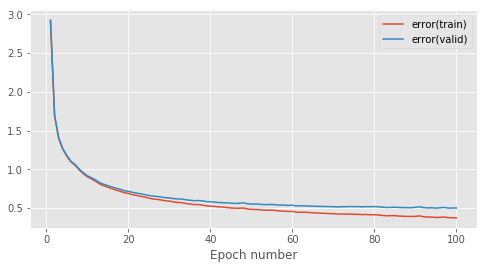

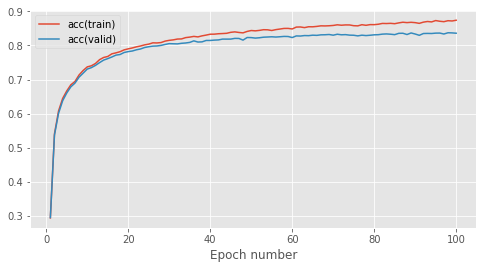

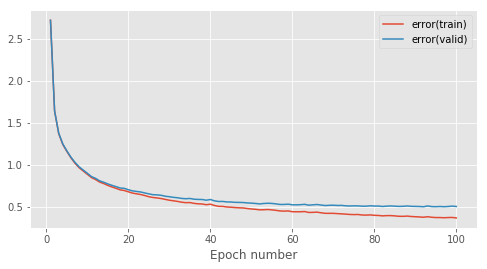

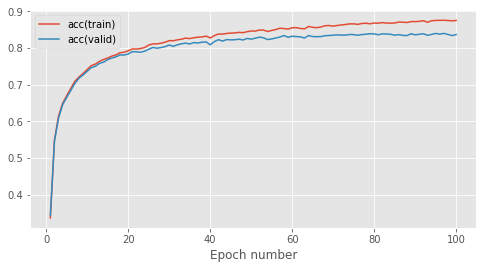

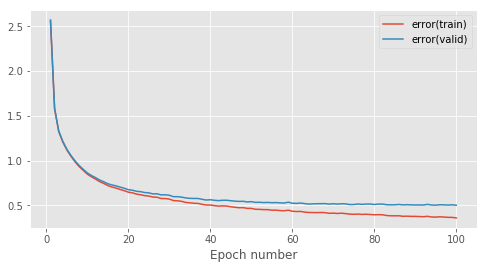

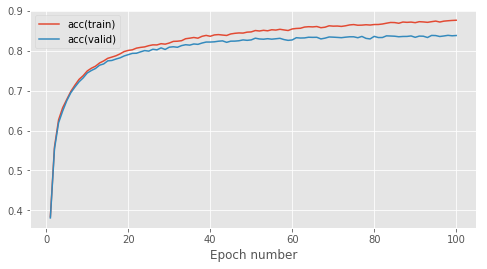

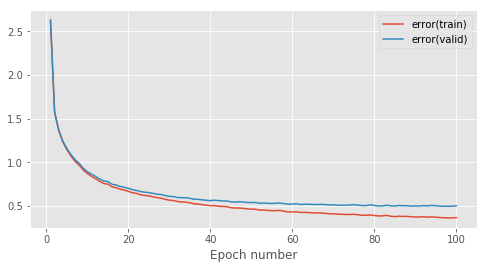

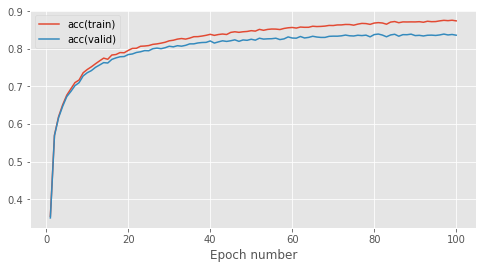

In [4]:
##############SGD With scheduler with special restarts

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

#setup hyperparameters
learning_rate = 0.0075
learning_ranges = [1.05,1.1,1.15,1.2]
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

for learning_range in learning_ranges:
    

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    sgd_scheduler_special = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / learning_range, max_learning_rate=learning_rate * learning_range,
                                                       total_iters_per_period=25,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=3.0)

    error = CrossEntropySoftmaxError()

    # Use a basic gradient descent learning rule
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=sgd_scheduler_special)

learning_rate 0.000105
epoch 1


Epoch 1: 4.2s to complete
    error(train)=1.44e+00, acc(train)=6.02e-01, error(valid)=1.44e+00, acc(valid)=6.01e-01


learning_rate 0.00010499759154464226
epoch 2


Epoch 2: 4.3s to complete
    error(train)=1.19e+00, acc(train)=6.63e-01, error(valid)=1.20e+00, acc(valid)=6.60e-01


learning_rate 0.00010499036855542371
epoch 3


Epoch 3: 4.2s to complete
    error(train)=1.06e+00, acc(train)=6.96e-01, error(valid)=1.08e+00, acc(valid)=6.89e-01


learning_rate 0.00010497833816056266
epoch 4


Epoch 4: 4.3s to complete
    error(train)=9.72e-01, acc(train)=7.19e-01, error(valid)=9.91e-01, acc(valid)=7.11e-01


learning_rate 0.00010496151223260639
epoch 5


Epoch 5: 4.2s to complete
    error(train)=8.97e-01, acc(train)=7.39e-01, error(valid)=9.17e-01, acc(valid)=7.33e-01


learning_rate 0.00010493990737671437
epoch 6


Epoch 6: 4.2s to complete
    error(train)=8.44e-01, acc(train)=7.50e-01, error(valid)=8.67e-01, acc(valid)=7.44e-01


learning_rate 0.00010491354491427099
epoch 7


Epoch 7: 4.3s to complete
    error(train)=7.91e-01, acc(train)=7.66e-01, error(valid)=8.17e-01, acc(valid)=7.58e-01


learning_rate 0.00010488245086184389
epoch 8


Epoch 8: 4.5s to complete
    error(train)=7.56e-01, acc(train)=7.72e-01, error(valid)=7.84e-01, acc(valid)=7.64e-01


learning_rate 0.0001048466559055088
epoch 9


Epoch 9: 4.5s to complete
    error(train)=7.26e-01, acc(train)=7.83e-01, error(valid)=7.55e-01, acc(valid)=7.73e-01


learning_rate 0.00010480619537056604
epoch 10


Epoch 10: 4.5s to complete
    error(train)=6.96e-01, acc(train)=7.88e-01, error(valid)=7.29e-01, acc(valid)=7.79e-01


learning_rate 0.00010476110918667872
epoch 11


Epoch 11: 4.5s to complete
    error(train)=6.77e-01, acc(train)=7.93e-01, error(valid)=7.10e-01, acc(valid)=7.83e-01


learning_rate 0.00010471144184846706
epoch 12


Epoch 12: 4.6s to complete
    error(train)=6.56e-01, acc(train)=7.99e-01, error(valid)=6.95e-01, acc(valid)=7.86e-01


learning_rate 0.00010465724237159743
epoch 13


Epoch 13: 4.6s to complete
    error(train)=6.33e-01, acc(train)=8.06e-01, error(valid)=6.71e-01, acc(valid)=7.92e-01


learning_rate 0.0001045985642444099
epoch 14


Epoch 14: 4.5s to complete
    error(train)=6.21e-01, acc(train)=8.07e-01, error(valid)=6.62e-01, acc(valid)=7.96e-01


learning_rate 0.00010453546537513177
epoch 15


Epoch 15: 4.8s to complete
    error(train)=6.04e-01, acc(train)=8.12e-01, error(valid)=6.48e-01, acc(valid)=7.99e-01


learning_rate 0.00010446800803472895
epoch 16


Epoch 16: 4.6s to complete
    error(train)=5.91e-01, acc(train)=8.16e-01, error(valid)=6.37e-01, acc(valid)=8.02e-01


learning_rate 0.0001043962587954522
epoch 17


Epoch 17: 4.6s to complete
    error(train)=5.77e-01, acc(train)=8.19e-01, error(valid)=6.25e-01, acc(valid)=8.06e-01


learning_rate 0.0001043202884651383
epoch 18


Epoch 18: 4.6s to complete
    error(train)=5.68e-01, acc(train)=8.22e-01, error(valid)=6.20e-01, acc(valid)=8.06e-01


learning_rate 0.00010424017201733127
epoch 19


Epoch 19: 4.7s to complete
    error(train)=5.55e-01, acc(train)=8.25e-01, error(valid)=6.08e-01, acc(valid)=8.09e-01


learning_rate 0.00010415598851729251
epoch 20


Epoch 20: 4.6s to complete
    error(train)=5.50e-01, acc(train)=8.25e-01, error(valid)=6.05e-01, acc(valid)=8.09e-01


learning_rate 0.00010406782104397297
epoch 21


Epoch 21: 4.6s to complete
    error(train)=5.44e-01, acc(train)=8.28e-01, error(valid)=6.00e-01, acc(valid)=8.11e-01


learning_rate 0.0001039757566080242
epoch 22


Epoch 22: 4.7s to complete
    error(train)=5.37e-01, acc(train)=8.28e-01, error(valid)=5.98e-01, acc(valid)=8.11e-01


learning_rate 0.00010387988606592945
epoch 23


Epoch 23: 4.6s to complete
    error(train)=5.27e-01, acc(train)=8.30e-01, error(valid)=5.87e-01, acc(valid)=8.12e-01


learning_rate 0.00010378030403033915
epoch 24


Epoch 24: 4.6s to complete
    error(train)=5.12e-01, acc(train)=8.37e-01, error(valid)=5.76e-01, acc(valid)=8.19e-01


learning_rate 0.00010367710877669976
epoch 25


Epoch 25: 4.5s to complete
    error(train)=5.11e-01, acc(train)=8.38e-01, error(valid)=5.76e-01, acc(valid)=8.20e-01


learning_rate 0.00010357040214626767
epoch 26


Epoch 26: 4.6s to complete
    error(train)=5.04e-01, acc(train)=8.37e-01, error(valid)=5.72e-01, acc(valid)=8.17e-01


learning_rate 0.00010346028944560431
epoch 27


Epoch 27: 5.0s to complete
    error(train)=4.98e-01, acc(train)=8.40e-01, error(valid)=5.69e-01, acc(valid)=8.19e-01


learning_rate 0.00010334687934265117
epoch 28


Epoch 28: 5.1s to complete
    error(train)=4.90e-01, acc(train)=8.41e-01, error(valid)=5.63e-01, acc(valid)=8.22e-01


learning_rate 0.00010323028375948765
epoch 29


Epoch 29: 4.9s to complete
    error(train)=4.82e-01, acc(train)=8.45e-01, error(valid)=5.58e-01, acc(valid)=8.22e-01


learning_rate 0.00010311061776187763
epoch 30


Epoch 30: 4.6s to complete
    error(train)=4.78e-01, acc(train)=8.46e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


learning_rate 0.00010298799944571326
epoch 31


Epoch 31: 4.6s to complete
    error(train)=4.76e-01, acc(train)=8.46e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


learning_rate 0.00010286254982046874
epoch 32


Epoch 32: 4.8s to complete
    error(train)=4.69e-01, acc(train)=8.47e-01, error(valid)=5.52e-01, acc(valid)=8.23e-01


learning_rate 0.00010273439268977844
epoch 33


Epoch 33: 5.0s to complete
    error(train)=4.63e-01, acc(train)=8.50e-01, error(valid)=5.49e-01, acc(valid)=8.25e-01


learning_rate 0.00010260365452925777
epoch 34


Epoch 34: 5.1s to complete
    error(train)=4.60e-01, acc(train)=8.50e-01, error(valid)=5.46e-01, acc(valid)=8.23e-01


learning_rate 0.00010247046436168695
epoch 35


Epoch 35: 4.8s to complete
    error(train)=4.54e-01, acc(train)=8.52e-01, error(valid)=5.42e-01, acc(valid)=8.27e-01


learning_rate 0.00010233495362968112
epoch 36


Epoch 36: 4.9s to complete
    error(train)=4.49e-01, acc(train)=8.54e-01, error(valid)=5.39e-01, acc(valid)=8.29e-01


learning_rate 0.00010219725606597238
epoch 37


Epoch 37: 5.0s to complete
    error(train)=4.45e-01, acc(train)=8.54e-01, error(valid)=5.38e-01, acc(valid)=8.29e-01


learning_rate 0.00010205750756143167
epoch 38


Epoch 38: 4.8s to complete
    error(train)=4.42e-01, acc(train)=8.55e-01, error(valid)=5.37e-01, acc(valid)=8.29e-01


learning_rate 0.00010191584603096093
epoch 39


Epoch 39: 4.6s to complete
    error(train)=4.39e-01, acc(train)=8.56e-01, error(valid)=5.35e-01, acc(valid)=8.30e-01


learning_rate 0.00010177241127738773
epoch 40


Epoch 40: 4.6s to complete
    error(train)=4.32e-01, acc(train)=8.59e-01, error(valid)=5.32e-01, acc(valid)=8.31e-01


learning_rate 0.00010162734485349677
epoch 41


Epoch 41: 4.6s to complete
    error(train)=4.32e-01, acc(train)=8.57e-01, error(valid)=5.35e-01, acc(valid)=8.29e-01


learning_rate 0.00010148078992233434
epoch 42


Epoch 42: 4.5s to complete
    error(train)=4.24e-01, acc(train)=8.61e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


learning_rate 0.0001013328911159237
epoch 43


Epoch 43: 4.5s to complete
    error(train)=4.20e-01, acc(train)=8.62e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


learning_rate 0.00010118379439253074
epoch 44


Epoch 44: 4.4s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=5.27e-01, acc(valid)=8.30e-01


learning_rate 0.0001010336468926208
epoch 45


Epoch 45: 4.4s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


learning_rate 0.00010088259679364875
epoch 46


Epoch 46: 4.4s to complete
    error(train)=4.12e-01, acc(train)=8.63e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


learning_rate 0.00010073079316382578
epoch 47


Epoch 47: 4.5s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


learning_rate 0.00010057838581500704
epoch 48


Epoch 48: 4.5s to complete
    error(train)=4.12e-01, acc(train)=8.63e-01, error(valid)=5.30e-01, acc(valid)=8.31e-01


learning_rate 0.00010042552515484546
epoch 49


Epoch 49: 4.5s to complete
    error(train)=4.05e-01, acc(train)=8.65e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


learning_rate 0.00010027236203835754
epoch 50


Epoch 50: 4.4s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


learning_rate 0.00010011904761904762
epoch 51


Epoch 51: 4.4s to complete
    error(train)=3.95e-01, acc(train)=8.68e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


learning_rate 9.996573319973771e-05
epoch 52


Epoch 52: 4.4s to complete
    error(train)=3.92e-01, acc(train)=8.69e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


learning_rate 9.981257008324978e-05
epoch 53


Epoch 53: 4.4s to complete
    error(train)=3.89e-01, acc(train)=8.70e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


learning_rate 9.96597094230882e-05
epoch 54


Epoch 54: 4.3s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


learning_rate 9.950730207426947e-05
epoch 55


Epoch 55: 4.4s to complete
    error(train)=3.90e-01, acc(train)=8.69e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


learning_rate 9.93554984444465e-05
epoch 56


Epoch 56: 4.4s to complete
    error(train)=3.82e-01, acc(train)=8.73e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


learning_rate 9.920444834547444e-05
epoch 57


Epoch 57: 4.4s to complete
    error(train)=3.83e-01, acc(train)=8.71e-01, error(valid)=5.18e-01, acc(valid)=8.35e-01


learning_rate 9.90543008455645e-05
epoch 58


Epoch 58: 4.4s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


learning_rate 9.890520412217155e-05
epoch 59


Epoch 59: 4.4s to complete
    error(train)=3.80e-01, acc(train)=8.71e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


learning_rate 9.87573053157609e-05
epoch 60


Epoch 60: 4.4s to complete
    error(train)=3.74e-01, acc(train)=8.74e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


learning_rate 9.861075038459847e-05
epoch 61


Epoch 61: 4.4s to complete
    error(train)=3.72e-01, acc(train)=8.74e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


learning_rate 9.846568396070751e-05
epoch 62


Epoch 62: 4.5s to complete
    error(train)=3.69e-01, acc(train)=8.75e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


learning_rate 9.832224920713431e-05
epoch 63


Epoch 63: 4.5s to complete
    error(train)=3.68e-01, acc(train)=8.76e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


learning_rate 9.818058767666357e-05
epoch 64


Epoch 64: 4.5s to complete
    error(train)=3.65e-01, acc(train)=8.77e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


learning_rate 9.804083917212287e-05
epoch 65


Epoch 65: 4.4s to complete
    error(train)=3.59e-01, acc(train)=8.78e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


learning_rate 9.790314160841412e-05
epoch 66


Epoch 66: 4.4s to complete
    error(train)=3.59e-01, acc(train)=8.79e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


learning_rate 9.77676308764083e-05
epoch 67


Epoch 67: 4.4s to complete
    error(train)=3.59e-01, acc(train)=8.78e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


learning_rate 9.763444070883747e-05
epoch 68


Epoch 68: 4.5s to complete
    error(train)=3.57e-01, acc(train)=8.78e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


learning_rate 9.750370254831681e-05
epoch 69


Epoch 69: 4.4s to complete
    error(train)=3.53e-01, acc(train)=8.80e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


learning_rate 9.73755454176265e-05
epoch 70


Epoch 70: 4.4s to complete
    error(train)=3.57e-01, acc(train)=8.78e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


learning_rate 9.725009579238198e-05
epoch 71


Epoch 71: 4.5s to complete
    error(train)=3.55e-01, acc(train)=8.78e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


learning_rate 9.712747747621762e-05
epoch 72


Epoch 72: 4.5s to complete
    error(train)=3.48e-01, acc(train)=8.81e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


learning_rate 9.700781147860759e-05
epoch 73


Epoch 73: 4.5s to complete
    error(train)=3.50e-01, acc(train)=8.80e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


learning_rate 9.689121589544408e-05
epoch 74


Epoch 74: 4.5s to complete
    error(train)=3.43e-01, acc(train)=8.83e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


learning_rate 9.677780579249093e-05
epoch 75


Epoch 75: 4.8s to complete
    error(train)=3.45e-01, acc(train)=8.83e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


learning_rate 9.666769309182757e-05
epoch 76


Epoch 76: 4.4s to complete
    error(train)=3.43e-01, acc(train)=8.83e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


learning_rate 9.656098646139549e-05
epoch 77


Epoch 77: 4.5s to complete
    error(train)=3.37e-01, acc(train)=8.85e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


learning_rate 9.645779120775609e-05
epoch 78


Epoch 78: 4.5s to complete
    error(train)=3.36e-01, acc(train)=8.85e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


learning_rate 9.63582091721658e-05
epoch 79


Epoch 79: 5.1s to complete
    error(train)=3.34e-01, acc(train)=8.86e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


learning_rate 9.626233863007104e-05
epoch 80


Epoch 80: 5.0s to complete
    error(train)=3.33e-01, acc(train)=8.87e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


learning_rate 9.617027419412228e-05
epoch 81


Epoch 81: 4.7s to complete
    error(train)=3.32e-01, acc(train)=8.87e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


learning_rate 9.608210672080273e-05
epoch 82


Epoch 82: 4.5s to complete
    error(train)=3.30e-01, acc(train)=8.86e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


learning_rate 9.599792322076398e-05
epoch 83


Epoch 83: 4.4s to complete
    error(train)=3.29e-01, acc(train)=8.87e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


learning_rate 9.591780677295695e-05
epoch 84


Epoch 84: 4.5s to complete
    error(train)=3.29e-01, acc(train)=8.86e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


learning_rate 9.584183644264305e-05
epoch 85


Epoch 85: 4.4s to complete
    error(train)=3.24e-01, acc(train)=8.89e-01, error(valid)=5.15e-01, acc(valid)=8.38e-01


learning_rate 9.57700872033663e-05
epoch 86


Epoch 86: 4.3s to complete
    error(train)=3.24e-01, acc(train)=8.89e-01, error(valid)=5.16e-01, acc(valid)=8.37e-01


learning_rate 9.570262986296348e-05
epoch 87


Epoch 87: 4.3s to complete
    error(train)=3.24e-01, acc(train)=8.89e-01, error(valid)=5.20e-01, acc(valid)=8.37e-01


learning_rate 9.563953099368534e-05
epoch 88


Epoch 88: 4.4s to complete
    error(train)=3.25e-01, acc(train)=8.86e-01, error(valid)=5.23e-01, acc(valid)=8.35e-01


learning_rate 9.558085286649782e-05
epoch 89


Epoch 89: 4.4s to complete
    error(train)=3.15e-01, acc(train)=8.92e-01, error(valid)=5.12e-01, acc(valid)=8.38e-01


learning_rate 9.552665338962819e-05
epoch 90


Epoch 90: 4.4s to complete
    error(train)=3.17e-01, acc(train)=8.91e-01, error(valid)=5.17e-01, acc(valid)=8.39e-01


learning_rate 9.547698605141651e-05
epoch 91


Epoch 91: 4.4s to complete
    error(train)=3.19e-01, acc(train)=8.90e-01, error(valid)=5.21e-01, acc(valid)=8.36e-01


learning_rate 9.543189986752921e-05
epoch 92


Epoch 92: 4.4s to complete
    error(train)=3.16e-01, acc(train)=8.91e-01, error(valid)=5.23e-01, acc(valid)=8.36e-01


learning_rate 9.539143933258645e-05
epoch 93


Epoch 93: 4.4s to complete
    error(train)=3.13e-01, acc(train)=8.92e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01


learning_rate 9.535564437625136e-05
epoch 94


Epoch 94: 4.4s to complete
    error(train)=3.10e-01, acc(train)=8.93e-01, error(valid)=5.15e-01, acc(valid)=8.37e-01


learning_rate 9.532455032382426e-05
epoch 95


Epoch 95: 4.4s to complete
    error(train)=3.14e-01, acc(train)=8.91e-01, error(valid)=5.25e-01, acc(valid)=8.37e-01


learning_rate 9.529818786138088e-05
epoch 96


Epoch 96: 4.6s to complete
    error(train)=3.09e-01, acc(train)=8.93e-01, error(valid)=5.19e-01, acc(valid)=8.38e-01


learning_rate 9.527658300548886e-05
epoch 97


Epoch 97: 4.4s to complete
    error(train)=3.07e-01, acc(train)=8.94e-01, error(valid)=5.21e-01, acc(valid)=8.38e-01


learning_rate 9.525975707753259e-05
epoch 98


Epoch 98: 4.5s to complete
    error(train)=3.05e-01, acc(train)=8.95e-01, error(valid)=5.20e-01, acc(valid)=8.36e-01


learning_rate 9.524772668267153e-05
epoch 99


Epoch 99: 4.4s to complete
    error(train)=3.04e-01, acc(train)=8.95e-01, error(valid)=5.22e-01, acc(valid)=8.37e-01


learning_rate 9.524050369345298e-05
epoch 100


Epoch 100: 4.4s to complete
    error(train)=3.00e-01, acc(train)=8.96e-01, error(valid)=5.21e-01, acc(valid)=8.39e-01


learning_rate 0.00011000000000000002
epoch 1


Epoch 1: 4.2s to complete
    error(train)=1.43e+00, acc(train)=6.04e-01, error(valid)=1.43e+00, acc(valid)=6.09e-01


learning_rate 0.00010999528989440019
epoch 2


Epoch 2: 4.3s to complete
    error(train)=1.16e+00, acc(train)=6.73e-01, error(valid)=1.16e+00, acc(valid)=6.73e-01


learning_rate 0.00010998116422590625
epoch 3


Epoch 3: 4.1s to complete
    error(train)=1.02e+00, acc(train)=7.08e-01, error(valid)=1.02e+00, acc(valid)=7.07e-01


learning_rate 0.0001099576369348476
epoch 4


Epoch 4: 4.2s to complete
    error(train)=9.25e-01, acc(train)=7.31e-01, error(valid)=9.37e-01, acc(valid)=7.29e-01


learning_rate 0.00010992473123982004
epoch 5


Epoch 5: 4.2s to complete
    error(train)=8.56e-01, acc(train)=7.48e-01, error(valid)=8.73e-01, acc(valid)=7.47e-01


learning_rate 0.00010988247961477178
epoch 6


Epoch 6: 4.3s to complete
    error(train)=8.11e-01, acc(train)=7.60e-01, error(valid)=8.34e-01, acc(valid)=7.53e-01


learning_rate 0.00010983092375695569
epoch 7


Epoch 7: 4.3s to complete
    error(train)=7.65e-01, acc(train)=7.72e-01, error(valid)=7.91e-01, acc(valid)=7.65e-01


learning_rate 0.00010977011454577898
epoch 8


Epoch 8: 4.3s to complete
    error(train)=7.33e-01, acc(train)=7.80e-01, error(valid)=7.62e-01, acc(valid)=7.71e-01


learning_rate 0.0001097001119925915
epoch 9


Epoch 9: 4.4s to complete
    error(train)=7.04e-01, acc(train)=7.87e-01, error(valid)=7.33e-01, acc(valid)=7.80e-01


learning_rate 0.00010962098518146174
epoch 10


Epoch 10: 4.3s to complete
    error(train)=6.82e-01, acc(train)=7.92e-01, error(valid)=7.16e-01, acc(valid)=7.84e-01


learning_rate 0.00010953281220099921
epoch 11


Epoch 11: 4.3s to complete
    error(train)=6.55e-01, acc(train)=7.98e-01, error(valid)=6.91e-01, acc(valid)=7.90e-01


learning_rate 0.00010943568006729035
epoch 12


Epoch 12: 4.3s to complete
    error(train)=6.37e-01, acc(train)=8.05e-01, error(valid)=6.75e-01, acc(valid)=7.93e-01


learning_rate 0.00010932968463802423
epoch 13


Epoch 13: 4.4s to complete
    error(train)=6.23e-01, acc(train)=8.07e-01, error(valid)=6.64e-01, acc(valid)=7.95e-01


learning_rate 0.00010921493051789256
epoch 14


Epoch 14: 4.3s to complete
    error(train)=6.06e-01, acc(train)=8.10e-01, error(valid)=6.49e-01, acc(valid)=7.97e-01


learning_rate 0.00010909153095535747
epoch 15


Epoch 15: 4.3s to complete
    error(train)=5.88e-01, acc(train)=8.16e-01, error(valid)=6.35e-01, acc(valid)=8.04e-01


learning_rate 0.00010895960773088898
epoch 16


Epoch 16: 4.5s to complete
    error(train)=5.78e-01, acc(train)=8.20e-01, error(valid)=6.26e-01, acc(valid)=8.06e-01


learning_rate 0.00010881929103678235
epoch 17


Epoch 17: 4.3s to complete
    error(train)=5.71e-01, acc(train)=8.19e-01, error(valid)=6.20e-01, acc(valid)=8.03e-01


learning_rate 0.00010867071934867403
epoch 18


Epoch 18: 4.4s to complete
    error(train)=5.57e-01, acc(train)=8.24e-01, error(valid)=6.09e-01, acc(valid)=8.09e-01


learning_rate 0.00010851403928888288
epoch 19


Epoch 19: 4.4s to complete
    error(train)=5.44e-01, acc(train)=8.29e-01, error(valid)=6.00e-01, acc(valid)=8.12e-01


learning_rate 0.00010834940548171174
epoch 20


Epoch 20: 4.4s to complete
    error(train)=5.37e-01, acc(train)=8.29e-01, error(valid)=5.96e-01, acc(valid)=8.11e-01


learning_rate 0.00010817698040085179
epoch 21


Epoch 21: 4.4s to complete
    error(train)=5.27e-01, acc(train)=8.31e-01, error(valid)=5.88e-01, acc(valid)=8.11e-01


learning_rate 0.0001079969342090407
epoch 22


Epoch 22: 4.4s to complete
    error(train)=5.18e-01, acc(train)=8.34e-01, error(valid)=5.80e-01, acc(valid)=8.15e-01


learning_rate 0.00010780944459013256
epoch 23


Epoch 23: 4.4s to complete
    error(train)=5.13e-01, acc(train)=8.35e-01, error(valid)=5.79e-01, acc(valid)=8.13e-01


learning_rate 0.00010761469657374532
epoch 24


Epoch 24: 4.5s to complete
    error(train)=5.05e-01, acc(train)=8.38e-01, error(valid)=5.74e-01, acc(valid)=8.18e-01


learning_rate 0.00010741288235265894
epoch 25


Epoch 25: 4.5s to complete
    error(train)=5.05e-01, acc(train)=8.36e-01, error(valid)=5.75e-01, acc(valid)=8.14e-01


learning_rate 0.00010720420109314433
epoch 26


Epoch 26: 4.4s to complete
    error(train)=4.93e-01, acc(train)=8.40e-01, error(valid)=5.65e-01, acc(valid)=8.19e-01


learning_rate 0.00010698885873841023
epoch 27


Epoch 27: 4.5s to complete
    error(train)=4.89e-01, acc(train)=8.42e-01, error(valid)=5.63e-01, acc(valid)=8.18e-01


learning_rate 0.00010676706780536214
epoch 28


Epoch 28: 4.5s to complete
    error(train)=4.77e-01, acc(train)=8.46e-01, error(valid)=5.52e-01, acc(valid)=8.23e-01


learning_rate 0.00010653904717487387
epoch 29


Epoch 29: 4.5s to complete
    error(train)=4.72e-01, acc(train)=8.48e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


learning_rate 0.00010630502187577843
epoch 30


Epoch 30: 4.5s to complete
    error(train)=4.67e-01, acc(train)=8.48e-01, error(valid)=5.49e-01, acc(valid)=8.22e-01


learning_rate 0.0001060652228627918
epoch 31


Epoch 31: 4.5s to complete
    error(train)=4.64e-01, acc(train)=8.49e-01, error(valid)=5.47e-01, acc(valid)=8.24e-01


learning_rate 0.00010581988678858854
epoch 32


Epoch 32: 5.1s to complete
    error(train)=4.56e-01, acc(train)=8.52e-01, error(valid)=5.40e-01, acc(valid)=8.25e-01


learning_rate 0.00010556925577025408
epoch 33


Epoch 33: 5.5s to complete
    error(train)=4.58e-01, acc(train)=8.50e-01, error(valid)=5.45e-01, acc(valid)=8.25e-01


learning_rate 0.00010531357715034447
epoch 34


Epoch 34: 5.4s to complete
    error(train)=4.50e-01, acc(train)=8.53e-01, error(valid)=5.42e-01, acc(valid)=8.25e-01


learning_rate 0.00010505310325278912
epoch 35


Epoch 35: 4.9s to complete
    error(train)=4.44e-01, acc(train)=8.54e-01, error(valid)=5.35e-01, acc(valid)=8.27e-01


learning_rate 0.0001047880911338775
epoch 36


Epoch 36: 5.2s to complete
    error(train)=4.38e-01, acc(train)=8.57e-01, error(valid)=5.34e-01, acc(valid)=8.27e-01


learning_rate 0.0001045188023285757
epoch 37


Epoch 37: 5.0s to complete
    error(train)=4.33e-01, acc(train)=8.58e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


learning_rate 0.00010424550259242291
epoch 38


Epoch 38: 4.8s to complete
    error(train)=4.31e-01, acc(train)=8.57e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


learning_rate 0.00010396846163926285
epoch 39


Epoch 39: 4.4s to complete
    error(train)=4.27e-01, acc(train)=8.59e-01, error(valid)=5.30e-01, acc(valid)=8.30e-01


learning_rate 0.0001036879528750687
epoch 40


Epoch 40: 4.5s to complete
    error(train)=4.24e-01, acc(train)=8.60e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


learning_rate 0.0001034042531281245
epoch 41


Epoch 41: 4.5s to complete
    error(train)=4.21e-01, acc(train)=8.61e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


learning_rate 0.00010311764237582901
epoch 42


Epoch 42: 4.5s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=5.25e-01, acc(valid)=8.29e-01


learning_rate 0.0001028284034683918
epoch 43


Epoch 43: 4.7s to complete
    error(train)=4.15e-01, acc(train)=8.63e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


learning_rate 0.00010253682184969428
epoch 44


Epoch 44: 4.5s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


learning_rate 0.00010224318527559102
epoch 45


Epoch 45: 4.5s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


learning_rate 0.00010194778352992949
epoch 46


Epoch 46: 4.5s to complete
    error(train)=4.04e-01, acc(train)=8.65e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


learning_rate 0.00010165090813856836
epoch 47


Epoch 47: 4.4s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=5.19e-01, acc(valid)=8.29e-01


learning_rate 0.00010135285208167673
epoch 48


Epoch 48: 4.4s to complete
    error(train)=3.97e-01, acc(train)=8.69e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


learning_rate 0.000101053909504598
epoch 49


Epoch 49: 4.4s to complete
    error(train)=3.94e-01, acc(train)=8.68e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


learning_rate 0.00010075437542756396
epoch 50


Epoch 50: 4.5s to complete
    error(train)=3.98e-01, acc(train)=8.66e-01, error(valid)=5.22e-01, acc(valid)=8.27e-01


learning_rate 0.00010045454545454546
epoch 51


Epoch 51: 4.5s to complete
    error(train)=3.91e-01, acc(train)=8.69e-01, error(valid)=5.18e-01, acc(valid)=8.31e-01


learning_rate 0.00010015471548152696
epoch 52


Epoch 52: 4.5s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


learning_rate 9.985518140449292e-05
epoch 53


Epoch 53: 4.6s to complete
    error(train)=3.85e-01, acc(train)=8.71e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


learning_rate 9.955623882741419e-05
epoch 54


Epoch 54: 4.5s to complete
    error(train)=3.77e-01, acc(train)=8.74e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


learning_rate 9.925818277052256e-05
epoch 55


Epoch 55: 4.5s to complete
    error(train)=3.75e-01, acc(train)=8.75e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


learning_rate 9.896130737916143e-05
epoch 56


Epoch 56: 4.7s to complete
    error(train)=3.74e-01, acc(train)=8.75e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


learning_rate 9.86659056334999e-05
epoch 57


Epoch 57: 4.5s to complete
    error(train)=3.71e-01, acc(train)=8.76e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


learning_rate 9.837226905939664e-05
epoch 58


Epoch 58: 4.4s to complete
    error(train)=3.68e-01, acc(train)=8.77e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


learning_rate 9.808068744069912e-05
epoch 59


Epoch 59: 4.5s to complete
    error(train)=3.70e-01, acc(train)=8.75e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


learning_rate 9.779144853326191e-05
epoch 60


Epoch 60: 4.5s to complete
    error(train)=3.67e-01, acc(train)=8.76e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


learning_rate 9.750483778096642e-05
epoch 61


Epoch 61: 4.5s to complete
    error(train)=3.64e-01, acc(train)=8.77e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


learning_rate 9.722113803402222e-05
epoch 62


Epoch 62: 4.5s to complete
    error(train)=3.68e-01, acc(train)=8.75e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


learning_rate 9.694062926982808e-05
epoch 63


Epoch 63: 4.6s to complete
    error(train)=3.64e-01, acc(train)=8.77e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


learning_rate 9.666358831666801e-05
epoch 64


Epoch 64: 4.5s to complete
    error(train)=3.58e-01, acc(train)=8.79e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


learning_rate 9.639028858051521e-05
epoch 65


Epoch 65: 4.5s to complete
    error(train)=3.61e-01, acc(train)=8.76e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


learning_rate 9.612099977521342e-05
epoch 66


Epoch 66: 4.4s to complete
    error(train)=3.57e-01, acc(train)=8.79e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


learning_rate 9.58559876563018e-05
epoch 67


Epoch 67: 4.5s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


learning_rate 9.559551375874645e-05
epoch 68


Epoch 68: 4.4s to complete
    error(train)=3.50e-01, acc(train)=8.83e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


learning_rate 9.533983513883685e-05
epoch 69


Epoch 69: 4.5s to complete
    error(train)=3.48e-01, acc(train)=8.82e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


learning_rate 9.50892041205024e-05
epoch 70


Epoch 70: 4.4s to complete
    error(train)=3.44e-01, acc(train)=8.84e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


learning_rate 9.484386804629912e-05
epoch 71


Epoch 71: 4.5s to complete
    error(train)=3.46e-01, acc(train)=8.83e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


learning_rate 9.46040690333125e-05
epoch 72


Epoch 72: 4.4s to complete
    error(train)=3.45e-01, acc(train)=8.82e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


learning_rate 9.437004373421705e-05
epoch 73


Epoch 73: 4.4s to complete
    error(train)=3.47e-01, acc(train)=8.81e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


learning_rate 9.414202310372878e-05
epoch 74


Epoch 74: 4.4s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


learning_rate 9.392023217068069e-05
epoch 75


Epoch 75: 4.4s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


learning_rate 9.370488981594659e-05
epoch 76


Epoch 76: 4.4s to complete
    error(train)=3.38e-01, acc(train)=8.85e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


learning_rate 9.349620855643199e-05
epoch 77


Epoch 77: 4.4s to complete
    error(train)=3.34e-01, acc(train)=8.87e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


learning_rate 9.32943943353456e-05
epoch 78


Epoch 78: 4.4s to complete
    error(train)=3.37e-01, acc(train)=8.85e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


learning_rate 9.309964631895838e-05
epoch 79


Epoch 79: 4.4s to complete
    error(train)=3.37e-01, acc(train)=8.85e-01, error(valid)=5.20e-01, acc(valid)=8.36e-01


learning_rate 9.291215670005023e-05
epoch 80


Epoch 80: 4.4s to complete
    error(train)=3.30e-01, acc(train)=8.87e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


learning_rate 9.273211050823913e-05
epoch 81


Epoch 81: 4.5s to complete
    error(train)=3.30e-01, acc(train)=8.88e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


learning_rate 9.255968542737918e-05
epoch 82


Epoch 82: 4.5s to complete
    error(train)=3.27e-01, acc(train)=8.89e-01, error(valid)=5.15e-01, acc(valid)=8.37e-01


learning_rate 9.239505162020804e-05
epoch 83


Epoch 83: 4.5s to complete
    error(train)=3.25e-01, acc(train)=8.89e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


learning_rate 9.22383715604169e-05
epoch 84


Epoch 84: 4.8s to complete
    error(train)=3.27e-01, acc(train)=8.88e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


learning_rate 9.208979987230857e-05
epoch 85


Epoch 85: 4.9s to complete
    error(train)=3.22e-01, acc(train)=8.90e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


learning_rate 9.194948317820194e-05
epoch 86


Epoch 86: 5.0s to complete
    error(train)=3.22e-01, acc(train)=8.91e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


learning_rate 9.181755995373345e-05
epoch 87


Epoch 87: 4.5s to complete
    error(train)=3.22e-01, acc(train)=8.90e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


learning_rate 9.169416039119836e-05
epoch 88


Epoch 88: 4.5s to complete
    error(train)=3.22e-01, acc(train)=8.89e-01, error(valid)=5.23e-01, acc(valid)=8.34e-01


learning_rate 9.157940627106669e-05
epoch 89


Epoch 89: 4.5s to complete
    error(train)=3.16e-01, acc(train)=8.92e-01, error(valid)=5.19e-01, acc(valid)=8.36e-01


learning_rate 9.147341084180057e-05
epoch 90


Epoch 90: 4.5s to complete
    error(train)=3.16e-01, acc(train)=8.92e-01, error(valid)=5.19e-01, acc(valid)=8.36e-01


learning_rate 9.137627870809171e-05
epoch 91


Epoch 91: 4.6s to complete
    error(train)=3.13e-01, acc(train)=8.93e-01, error(valid)=5.20e-01, acc(valid)=8.35e-01


learning_rate 9.128810572762918e-05
epoch 92


Epoch 92: 4.6s to complete
    error(train)=3.13e-01, acc(train)=8.92e-01, error(valid)=5.21e-01, acc(valid)=8.36e-01


learning_rate 9.120897891649943e-05
epoch 93


Epoch 93: 4.5s to complete
    error(train)=3.10e-01, acc(train)=8.93e-01, error(valid)=5.20e-01, acc(valid)=8.36e-01


learning_rate 9.113897636331196e-05
epoch 94


Epoch 94: 4.5s to complete
    error(train)=3.10e-01, acc(train)=8.94e-01, error(valid)=5.18e-01, acc(valid)=8.38e-01


learning_rate 9.107816715213524e-05
epoch 95


Epoch 95: 4.6s to complete
    error(train)=3.10e-01, acc(train)=8.93e-01, error(valid)=5.22e-01, acc(valid)=8.35e-01


learning_rate 9.102661129431914e-05
epoch 96


Epoch 96: 4.6s to complete
    error(train)=3.09e-01, acc(train)=8.93e-01, error(valid)=5.23e-01, acc(valid)=8.36e-01


learning_rate 9.098435966927088e-05
epoch 97


Epoch 97: 4.5s to complete
    error(train)=3.08e-01, acc(train)=8.94e-01, error(valid)=5.28e-01, acc(valid)=8.35e-01


learning_rate 9.095145397424332e-05
epoch 98


Epoch 98: 4.5s to complete
    error(train)=3.08e-01, acc(train)=8.93e-01, error(valid)=5.29e-01, acc(valid)=8.37e-01


learning_rate 9.092792668318467e-05
epoch 99


Epoch 99: 4.5s to complete
    error(train)=3.04e-01, acc(train)=8.96e-01, error(valid)=5.23e-01, acc(valid)=8.35e-01


learning_rate 9.091380101469074e-05
epoch 100


Epoch 100: 4.5s to complete
    error(train)=3.03e-01, acc(train)=8.96e-01, error(valid)=5.24e-01, acc(valid)=8.36e-01


learning_rate 0.00011499999999999999
epoch 1


Epoch 1: 4.3s to complete
    error(train)=1.38e+00, acc(train)=6.18e-01, error(valid)=1.38e+00, acc(valid)=6.18e-01


learning_rate 0.00011499308111817166
epoch 2


Epoch 2: 4.4s to complete
    error(train)=1.15e+00, acc(train)=6.79e-01, error(valid)=1.15e+00, acc(valid)=6.77e-01


learning_rate 0.00011497233130078772
epoch 3


Epoch 3: 4.3s to complete
    error(train)=1.02e+00, acc(train)=7.08e-01, error(valid)=1.04e+00, acc(valid)=7.06e-01


learning_rate 0.00011493777102541275
epoch 4


Epoch 4: 4.3s to complete
    error(train)=9.35e-01, acc(train)=7.30e-01, error(valid)=9.49e-01, acc(valid)=7.26e-01


learning_rate 0.00011488943439886604
epoch 5


Epoch 5: 4.2s to complete
    error(train)=8.66e-01, acc(train)=7.47e-01, error(valid)=8.82e-01, acc(valid)=7.45e-01


learning_rate 0.00011482736912356225
epoch 6


Epoch 6: 4.2s to complete
    error(train)=8.09e-01, acc(train)=7.62e-01, error(valid)=8.28e-01, acc(valid)=7.57e-01


learning_rate 0.00011475163645043486
epoch 7


Epoch 7: 4.3s to complete
    error(train)=7.78e-01, acc(train)=7.67e-01, error(valid)=8.01e-01, acc(valid)=7.61e-01


learning_rate 0.00011466231111848894
epoch 8


Epoch 8: 4.3s to complete
    error(train)=7.34e-01, acc(train)=7.80e-01, error(valid)=7.55e-01, acc(valid)=7.73e-01


learning_rate 0.00011455948128104275
epoch 9


Epoch 9: 4.3s to complete
    error(train)=7.06e-01, acc(train)=7.86e-01, error(valid)=7.30e-01, acc(valid)=7.76e-01


learning_rate 0.00011444324841873104
epoch 10


Epoch 10: 4.4s to complete
    error(train)=6.75e-01, acc(train)=7.94e-01, error(valid)=7.02e-01, acc(valid)=7.87e-01


learning_rate 0.00011431372723935595
epoch 11


Epoch 11: 4.4s to complete
    error(train)=6.50e-01, acc(train)=8.01e-01, error(valid)=6.81e-01, acc(valid)=7.93e-01


learning_rate 0.00011417104556468424
epoch 12


Epoch 12: 4.5s to complete
    error(train)=6.29e-01, acc(train)=8.08e-01, error(valid)=6.62e-01, acc(valid)=7.97e-01


learning_rate 0.00011401534420430265
epoch 13


Epoch 13: 4.4s to complete
    error(train)=6.12e-01, acc(train)=8.12e-01, error(valid)=6.49e-01, acc(valid)=8.01e-01


learning_rate 0.00011384677681665581
epoch 14


Epoch 14: 4.5s to complete
    error(train)=5.98e-01, acc(train)=8.14e-01, error(valid)=6.36e-01, acc(valid)=8.04e-01


learning_rate 0.00011366550975740396
epoch 15


Epoch 15: 4.4s to complete
    error(train)=5.80e-01, acc(train)=8.20e-01, error(valid)=6.23e-01, acc(valid)=8.05e-01


learning_rate 0.00011347172191524994
epoch 16


Epoch 16: 4.4s to complete
    error(train)=5.69e-01, acc(train)=8.23e-01, error(valid)=6.11e-01, acc(valid)=8.11e-01


learning_rate 0.00011326560453539765
epoch 17


Epoch 17: 4.6s to complete
    error(train)=5.56e-01, acc(train)=8.25e-01, error(valid)=6.02e-01, acc(valid)=8.09e-01


learning_rate 0.00011304736103081615
epoch 18


Epoch 18: 4.4s to complete
    error(train)=5.43e-01, acc(train)=8.28e-01, error(valid)=5.91e-01, acc(valid)=8.14e-01


learning_rate 0.00011281720678149564
epoch 19


Epoch 19: 4.5s to complete
    error(train)=5.36e-01, acc(train)=8.30e-01, error(valid)=5.87e-01, acc(valid)=8.14e-01


learning_rate 0.0001125753689218933
epoch 20


Epoch 20: 4.5s to complete
    error(train)=5.25e-01, acc(train)=8.33e-01, error(valid)=5.81e-01, acc(valid)=8.16e-01


learning_rate 0.00011232208611677914
epoch 21


Epoch 21: 4.5s to complete
    error(train)=5.16e-01, acc(train)=8.35e-01, error(valid)=5.74e-01, acc(valid)=8.18e-01


learning_rate 0.00011205760832570261
epoch 22


Epoch 22: 4.4s to complete
    error(train)=5.09e-01, acc(train)=8.37e-01, error(valid)=5.70e-01, acc(valid)=8.18e-01


learning_rate 0.00011178219655631268
epoch 23


Epoch 23: 4.5s to complete
    error(train)=5.02e-01, acc(train)=8.39e-01, error(valid)=5.65e-01, acc(valid)=8.23e-01


learning_rate 0.00011149612260677492
epoch 24


Epoch 24: 4.6s to complete
    error(train)=4.91e-01, acc(train)=8.43e-01, error(valid)=5.54e-01, acc(valid)=8.23e-01


learning_rate 0.00011119966879753935
epoch 25


Epoch 25: 4.6s to complete
    error(train)=4.86e-01, acc(train)=8.42e-01, error(valid)=5.56e-01, acc(valid)=8.24e-01


learning_rate 0.0001108931276927244
epoch 26


Epoch 26: 4.5s to complete
    error(train)=4.77e-01, acc(train)=8.47e-01, error(valid)=5.46e-01, acc(valid)=8.27e-01


learning_rate 0.00011057680181139139
epoch 27


Epoch 27: 4.5s to complete
    error(train)=4.72e-01, acc(train)=8.48e-01, error(valid)=5.45e-01, acc(valid)=8.27e-01


learning_rate 0.00011025100332899467
epoch 28


Epoch 28: 4.5s to complete
    error(train)=4.74e-01, acc(train)=8.46e-01, error(valid)=5.48e-01, acc(valid)=8.26e-01


learning_rate 0.00010991605376930227
epoch 29


Epoch 29: 4.5s to complete
    error(train)=4.65e-01, acc(train)=8.49e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


learning_rate 0.00010957228368709064
epoch 30


Epoch 30: 4.6s to complete
    error(train)=4.58e-01, acc(train)=8.51e-01, error(valid)=5.38e-01, acc(valid)=8.28e-01


learning_rate 0.00010922003234192706
epoch 31


Epoch 31: 4.5s to complete
    error(train)=4.52e-01, acc(train)=8.53e-01, error(valid)=5.33e-01, acc(valid)=8.27e-01


learning_rate 0.00010885964736336139
epoch 32


Epoch 32: 4.9s to complete
    error(train)=4.51e-01, acc(train)=8.53e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


learning_rate 0.00010849148440785766
epoch 33


Epoch 33: 5.0s to complete
    error(train)=4.42e-01, acc(train)=8.55e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


learning_rate 0.00010811590680780412
epoch 34


Epoch 34: 5.2s to complete
    error(train)=4.43e-01, acc(train)=8.54e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


learning_rate 0.00010773328521294795
epoch 35


Epoch 35: 5.0s to complete
    error(train)=4.35e-01, acc(train)=8.58e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


learning_rate 0.00010734399722460886
epoch 36


Epoch 36: 5.7s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


learning_rate 0.000106948427023032
epoch 37


Epoch 37: 5.6s to complete
    error(train)=4.28e-01, acc(train)=8.58e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


learning_rate 0.00010654696498824855
epoch 38


Epoch 38: 4.9s to complete
    error(train)=4.26e-01, acc(train)=8.59e-01, error(valid)=5.22e-01, acc(valid)=8.35e-01


learning_rate 0.00010614000731481776
epoch 39


Epoch 39: 4.6s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


learning_rate 0.00010572795562083072
epoch 40


Epoch 40: 4.4s to complete
    error(train)=4.15e-01, acc(train)=8.63e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


learning_rate 0.00010531121655156175
epoch 41


Epoch 41: 4.4s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


learning_rate 0.00010489020137815876
epoch 42


Epoch 42: 4.4s to complete
    error(train)=4.10e-01, acc(train)=8.64e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


learning_rate 0.00010446532559176808
epoch 43


Epoch 43: 4.4s to complete
    error(train)=4.04e-01, acc(train)=8.67e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


learning_rate 0.00010403700849349499
epoch 44


Epoch 44: 4.4s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


learning_rate 0.00010360567278060418
epoch 45


Epoch 45: 4.4s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


learning_rate 0.00010317174412936845
epoch 46


Epoch 46: 4.4s to complete
    error(train)=3.98e-01, acc(train)=8.67e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


learning_rate 0.00010273565077497774
epoch 47


Epoch 47: 4.3s to complete
    error(train)=3.94e-01, acc(train)=8.69e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


learning_rate 0.00010229782308892265
epoch 48


Epoch 48: 4.3s to complete
    error(train)=3.95e-01, acc(train)=8.69e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


learning_rate 0.00010185869315426971
epoch 49


Epoch 49: 4.3s to complete
    error(train)=3.88e-01, acc(train)=8.71e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


learning_rate 0.00010141869433924766
epoch 50


Epoch 50: 4.3s to complete
    error(train)=3.82e-01, acc(train)=8.73e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


learning_rate 0.00010097826086956522
epoch 51


Epoch 51: 4.3s to complete
    error(train)=3.82e-01, acc(train)=8.72e-01, error(valid)=5.06e-01, acc(valid)=8.39e-01


learning_rate 0.00010053782739988277
epoch 52


Epoch 52: 4.4s to complete
    error(train)=3.77e-01, acc(train)=8.74e-01, error(valid)=5.07e-01, acc(valid)=8.39e-01


learning_rate 0.00010009782858486072
epoch 53


Epoch 53: 4.5s to complete
    error(train)=3.77e-01, acc(train)=8.74e-01, error(valid)=5.07e-01, acc(valid)=8.41e-01


learning_rate 9.965869865020778e-05
epoch 54


Epoch 54: 4.3s to complete
    error(train)=3.71e-01, acc(train)=8.77e-01, error(valid)=5.02e-01, acc(valid)=8.41e-01


learning_rate 9.922087096415269e-05
epoch 55


Epoch 55: 4.3s to complete
    error(train)=3.69e-01, acc(train)=8.76e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


learning_rate 9.878477760976198e-05
epoch 56


Epoch 56: 4.3s to complete
    error(train)=3.71e-01, acc(train)=8.74e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


learning_rate 9.835084895852625e-05
epoch 57


Epoch 57: 4.4s to complete
    error(train)=3.71e-01, acc(train)=8.75e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


learning_rate 9.791951324563544e-05
epoch 58


Epoch 58: 4.2s to complete
    error(train)=3.67e-01, acc(train)=8.76e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


learning_rate 9.749119614736237e-05
epoch 59


Epoch 59: 4.3s to complete
    error(train)=3.61e-01, acc(train)=8.78e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


learning_rate 9.706632036097167e-05
epoch 60


Epoch 60: 4.3s to complete
    error(train)=3.61e-01, acc(train)=8.79e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


learning_rate 9.664530518756868e-05
epoch 61


Epoch 61: 4.3s to complete
    error(train)=3.61e-01, acc(train)=8.78e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


learning_rate 9.622856611829971e-05
epoch 62


Epoch 62: 4.3s to complete
    error(train)=3.54e-01, acc(train)=8.80e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


learning_rate 9.581651442431267e-05
epoch 63


Epoch 63: 4.3s to complete
    error(train)=3.57e-01, acc(train)=8.80e-01, error(valid)=5.07e-01, acc(valid)=8.39e-01


learning_rate 9.540955675088188e-05
epoch 64


Epoch 64: 4.5s to complete
    error(train)=3.54e-01, acc(train)=8.81e-01, error(valid)=5.06e-01, acc(valid)=8.39e-01


learning_rate 9.500809471609844e-05
epoch 65


Epoch 65: 4.4s to complete
    error(train)=3.50e-01, acc(train)=8.82e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


learning_rate 9.461252451452157e-05
epoch 66


Epoch 66: 4.4s to complete
    error(train)=3.49e-01, acc(train)=8.82e-01, error(valid)=5.06e-01, acc(valid)=8.40e-01


learning_rate 9.422323652618247e-05
epoch 67


Epoch 67: 4.4s to complete
    error(train)=3.48e-01, acc(train)=8.82e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


learning_rate 9.384061493132631e-05
epoch 68


Epoch 68: 4.3s to complete
    error(train)=3.49e-01, acc(train)=8.81e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


learning_rate 9.346503733127276e-05
epoch 69


Epoch 69: 4.4s to complete
    error(train)=3.49e-01, acc(train)=8.81e-01, error(valid)=5.13e-01, acc(valid)=8.38e-01


learning_rate 9.309687437576905e-05
epoch 70


Epoch 70: 4.4s to complete
    error(train)=3.42e-01, acc(train)=8.84e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


learning_rate 9.273648939720337e-05
epoch 71


Epoch 71: 4.4s to complete
    error(train)=3.40e-01, acc(train)=8.85e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


learning_rate 9.238423805203979e-05
epoch 72


Epoch 72: 4.4s to complete
    error(train)=3.36e-01, acc(train)=8.86e-01, error(valid)=5.05e-01, acc(valid)=8.40e-01


learning_rate 9.204046796982816e-05
epoch 73


Epoch 73: 4.3s to complete
    error(train)=3.36e-01, acc(train)=8.86e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


learning_rate 9.170551841013576e-05
epoch 74


Epoch 74: 4.4s to complete
    error(train)=3.34e-01, acc(train)=8.87e-01, error(valid)=5.07e-01, acc(valid)=8.40e-01


learning_rate 9.137971992773904e-05
epoch 75


Epoch 75: 4.3s to complete
    error(train)=3.31e-01, acc(train)=8.87e-01, error(valid)=5.06e-01, acc(valid)=8.39e-01


learning_rate 9.106339404640602e-05
epoch 76


Epoch 76: 4.3s to complete
    error(train)=3.31e-01, acc(train)=8.88e-01, error(valid)=5.06e-01, acc(valid)=8.42e-01


learning_rate 9.075685294159108e-05
epoch 77


Epoch 77: 4.4s to complete
    error(train)=3.26e-01, acc(train)=8.90e-01, error(valid)=5.02e-01, acc(valid)=8.42e-01


learning_rate 9.046039913235551e-05
epoch 78


Epoch 78: 4.3s to complete
    error(train)=3.26e-01, acc(train)=8.89e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


learning_rate 9.017432518281775e-05
epoch 79


Epoch 79: 4.2s to complete
    error(train)=3.26e-01, acc(train)=8.89e-01, error(valid)=5.08e-01, acc(valid)=8.40e-01


learning_rate 8.989891341342782e-05
epoch 80


Epoch 80: 4.3s to complete
    error(train)=3.25e-01, acc(train)=8.89e-01, error(valid)=5.09e-01, acc(valid)=8.39e-01


learning_rate 8.963443562235129e-05
epoch 81


Epoch 81: 4.2s to complete
    error(train)=3.19e-01, acc(train)=8.92e-01, error(valid)=5.04e-01, acc(valid)=8.41e-01


learning_rate 8.938115281723713e-05
epoch 82


Epoch 82: 4.3s to complete
    error(train)=3.20e-01, acc(train)=8.91e-01, error(valid)=5.06e-01, acc(valid)=8.40e-01


learning_rate 8.91393149576348e-05
epoch 83


Epoch 83: 4.3s to complete
    error(train)=3.22e-01, acc(train)=8.89e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


learning_rate 8.890916070831428e-05
epoch 84


Epoch 84: 4.3s to complete
    error(train)=3.18e-01, acc(train)=8.92e-01, error(valid)=5.11e-01, acc(valid)=8.39e-01


learning_rate 8.869091720373278e-05
epoch 85


Epoch 85: 4.4s to complete
    error(train)=3.20e-01, acc(train)=8.90e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


learning_rate 8.84847998238805e-05
epoch 86


Epoch 86: 4.4s to complete
    error(train)=3.17e-01, acc(train)=8.91e-01, error(valid)=5.10e-01, acc(valid)=8.39e-01


learning_rate 8.829101198172647e-05
epoch 87


Epoch 87: 4.4s to complete
    error(train)=3.15e-01, acc(train)=8.91e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


learning_rate 8.810974492247462e-05
epoch 88


Epoch 88: 4.3s to complete
    error(train)=3.13e-01, acc(train)=8.92e-01, error(valid)=5.12e-01, acc(valid)=8.39e-01


learning_rate 8.794117753482779e-05
epoch 89


Epoch 89: 4.8s to complete
    error(train)=3.11e-01, acc(train)=8.93e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


learning_rate 8.778547617444619e-05
epoch 90


Epoch 90: 4.8s to complete
    error(train)=3.15e-01, acc(train)=8.91e-01, error(valid)=5.15e-01, acc(valid)=8.38e-01


learning_rate 8.764279449977448e-05
epoch 91


Epoch 91: 4.8s to complete
    error(train)=3.07e-01, acc(train)=8.94e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


learning_rate 8.75132733203994e-05
epoch 92


Epoch 92: 4.4s to complete
    error(train)=3.06e-01, acc(train)=8.95e-01, error(valid)=5.12e-01, acc(valid)=8.38e-01


learning_rate 8.739704045808768e-05
epoch 93


Epoch 93: 4.3s to complete
    error(train)=3.06e-01, acc(train)=8.95e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


learning_rate 8.729421062064149e-05
epoch 94


Epoch 94: 4.4s to complete
    error(train)=3.07e-01, acc(train)=8.94e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


learning_rate 8.720488528869557e-05
epoch 95


Epoch 95: 4.4s to complete
    error(train)=3.02e-01, acc(train)=8.96e-01, error(valid)=5.15e-01, acc(valid)=8.39e-01


learning_rate 8.712915261556819e-05
epoch 96


Epoch 96: 4.4s to complete
    error(train)=3.03e-01, acc(train)=8.96e-01, error(valid)=5.17e-01, acc(valid)=8.38e-01


learning_rate 8.70670873402644e-05
epoch 97


Epoch 97: 4.6s to complete
    error(train)=3.05e-01, acc(train)=8.95e-01, error(valid)=5.22e-01, acc(valid)=8.36e-01


learning_rate 8.701875071371768e-05
epoch 98


Epoch 98: 5.4s to complete
    error(train)=3.02e-01, acc(train)=8.96e-01, error(valid)=5.18e-01, acc(valid)=8.38e-01


learning_rate 8.698419043834271e-05
epoch 99


Epoch 99: 4.4s to complete
    error(train)=2.98e-01, acc(train)=8.98e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01


learning_rate 8.696344062095877e-05
epoch 100


Epoch 100: 4.5s to complete
    error(train)=2.97e-01, acc(train)=8.97e-01, error(valid)=5.19e-01, acc(valid)=8.36e-01


learning_rate 0.00012
epoch 1


Epoch 1: 4.4s to complete
    error(train)=1.40e+00, acc(train)=6.08e-01, error(valid)=1.41e+00, acc(valid)=6.02e-01


learning_rate 0.00011999095360670508
epoch 2


Epoch 2: 4.3s to complete
    error(train)=1.17e+00, acc(train)=6.67e-01, error(valid)=1.17e+00, acc(valid)=6.65e-01


learning_rate 0.00011996382335451832
epoch 3


Epoch 3: 4.2s to complete
    error(train)=1.03e+00, acc(train)=7.05e-01, error(valid)=1.04e+00, acc(valid)=7.01e-01


learning_rate 0.00011991863601772313
epoch 4


Epoch 4: 4.3s to complete
    error(train)=9.48e-01, acc(train)=7.26e-01, error(valid)=9.59e-01, acc(valid)=7.23e-01


learning_rate 0.00011985543619076543
epoch 5


Epoch 5: 4.3s to complete
    error(train)=8.79e-01, acc(train)=7.41e-01, error(valid)=8.95e-01, acc(valid)=7.38e-01


learning_rate 0.00011977428624424419
epoch 6


Epoch 6: 4.2s to complete
    error(train)=8.25e-01, acc(train)=7.55e-01, error(valid)=8.47e-01, acc(valid)=7.50e-01


learning_rate 0.0001196752662633593
epoch 7


Epoch 7: 4.3s to complete
    error(train)=7.82e-01, acc(train)=7.66e-01, error(valid)=8.07e-01, acc(valid)=7.60e-01


learning_rate 0.00011955847396887704
epoch 8


Epoch 8: 4.4s to complete
    error(train)=7.47e-01, acc(train)=7.76e-01, error(valid)=7.75e-01, acc(valid)=7.68e-01


learning_rate 0.00011942402462069158
epoch 9


Epoch 9: 4.4s to complete
    error(train)=7.16e-01, acc(train)=7.83e-01, error(valid)=7.46e-01, acc(valid)=7.76e-01


learning_rate 0.00011927205090407729
epoch 10


Epoch 10: 4.4s to complete
    error(train)=6.93e-01, acc(train)=7.89e-01, error(valid)=7.27e-01, acc(valid)=7.77e-01


learning_rate 0.00011910270279874449
epoch 11


Epoch 11: 4.4s to complete
    error(train)=6.71e-01, acc(train)=7.95e-01, error(valid)=7.10e-01, acc(valid)=7.84e-01


learning_rate 0.00011891614743082747
epoch 12


Epoch 12: 4.3s to complete
    error(train)=6.52e-01, acc(train)=8.01e-01, error(valid)=6.93e-01, acc(valid)=7.90e-01


learning_rate 0.00011871256890795128
epoch 13


Epoch 13: 4.4s to complete
    error(train)=6.31e-01, acc(train)=8.06e-01, error(valid)=6.75e-01, acc(valid)=7.93e-01


learning_rate 0.00011849216813753966
epoch 14


Epoch 14: 4.4s to complete
    error(train)=6.18e-01, acc(train)=8.08e-01, error(valid)=6.64e-01, acc(valid)=7.94e-01


learning_rate 0.00011825516262854369
epoch 15


Epoch 15: 4.5s to complete
    error(train)=6.03e-01, acc(train)=8.11e-01, error(valid)=6.52e-01, acc(valid)=7.97e-01


learning_rate 0.00011800178627678675
epoch 16


Epoch 16: 4.4s to complete
    error(train)=5.87e-01, acc(train)=8.16e-01, error(valid)=6.38e-01, acc(valid)=7.99e-01


learning_rate 0.00011773228913413751
epoch 17


Epoch 17: 4.5s to complete
    error(train)=5.77e-01, acc(train)=8.20e-01, error(valid)=6.28e-01, acc(valid)=8.03e-01


learning_rate 0.00011744693716173897
epoch 18


Epoch 18: 5.0s to complete
    error(train)=5.63e-01, acc(train)=8.22e-01, error(valid)=6.18e-01, acc(valid)=8.03e-01


learning_rate 0.00011714601196753695
epoch 19


Epoch 19: 4.5s to complete
    error(train)=5.55e-01, acc(train)=8.26e-01, error(valid)=6.14e-01, acc(valid)=8.06e-01


learning_rate 0.00011682981052836696
epoch 20


Epoch 20: 4.4s to complete
    error(train)=5.47e-01, acc(train)=8.27e-01, error(valid)=6.06e-01, acc(valid)=8.06e-01


learning_rate 0.00011649864489687404
epoch 21


Epoch 21: 4.4s to complete
    error(train)=5.34e-01, acc(train)=8.32e-01, error(valid)=5.97e-01, acc(valid)=8.13e-01


learning_rate 0.00011615284189355434
epoch 22


Epoch 22: 4.4s to complete
    error(train)=5.24e-01, acc(train)=8.34e-01, error(valid)=5.90e-01, acc(valid)=8.12e-01


learning_rate 0.0001157927427842228
epoch 23


Epoch 23: 4.5s to complete
    error(train)=5.22e-01, acc(train)=8.33e-01, error(valid)=5.90e-01, acc(valid)=8.12e-01


learning_rate 0.0001154187029432251
epoch 24


Epoch 24: 4.5s to complete
    error(train)=5.17e-01, acc(train)=8.33e-01, error(valid)=5.87e-01, acc(valid)=8.14e-01


learning_rate 0.00011503109150272589
epoch 25


Epoch 25: 4.6s to complete
    error(train)=5.03e-01, acc(train)=8.40e-01, error(valid)=5.75e-01, acc(valid)=8.18e-01


learning_rate 0.00011463029098842004
epoch 26


Epoch 26: 4.5s to complete
    error(train)=5.06e-01, acc(train)=8.37e-01, error(valid)=5.81e-01, acc(valid)=8.15e-01


learning_rate 0.00011421669694202597
epoch 27


Epoch 27: 4.6s to complete
    error(train)=4.94e-01, acc(train)=8.42e-01, error(valid)=5.70e-01, acc(valid)=8.20e-01


learning_rate 0.00011379071753093363
epoch 28


Epoch 28: 4.5s to complete
    error(train)=4.83e-01, acc(train)=8.46e-01, error(valid)=5.61e-01, acc(valid)=8.19e-01


learning_rate 0.00011335277314539265
epoch 29


Epoch 29: 4.5s to complete
    error(train)=4.78e-01, acc(train)=8.45e-01, error(valid)=5.58e-01, acc(valid)=8.18e-01


learning_rate 0.00011290329598363791
epoch 30


Epoch 30: 4.5s to complete
    error(train)=4.76e-01, acc(train)=8.46e-01, error(valid)=5.61e-01, acc(valid)=8.21e-01


learning_rate 0.000112442729625362
epoch 31


Epoch 31: 4.5s to complete
    error(train)=4.67e-01, acc(train)=8.50e-01, error(valid)=5.52e-01, acc(valid)=8.23e-01


learning_rate 0.00011197152859395573
epoch 32


Epoch 32: 4.6s to complete
    error(train)=4.60e-01, acc(train)=8.52e-01, error(valid)=5.48e-01, acc(valid)=8.24e-01


learning_rate 0.00011149015790794828
epoch 33


Epoch 33: 4.8s to complete
    error(train)=4.59e-01, acc(train)=8.51e-01, error(valid)=5.48e-01, acc(valid)=8.25e-01


learning_rate 0.00011099909262209015
epoch 34


Epoch 34: 4.7s to complete
    error(train)=4.53e-01, acc(train)=8.53e-01, error(valid)=5.47e-01, acc(valid)=8.27e-01


learning_rate 0.00011049881735853146
epoch 35


Epoch 35: 4.7s to complete
    error(train)=4.48e-01, acc(train)=8.55e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


learning_rate 0.00010998982582855836
epoch 36


Epoch 36: 4.8s to complete
    error(train)=4.42e-01, acc(train)=8.56e-01, error(valid)=5.35e-01, acc(valid)=8.27e-01


learning_rate 0.00010947262034535967
epoch 37


Epoch 37: 4.9s to complete
    error(train)=4.37e-01, acc(train)=8.58e-01, error(valid)=5.36e-01, acc(valid)=8.26e-01


learning_rate 0.00010894771132830431
epoch 38


Epoch 38: 4.8s to complete
    error(train)=4.37e-01, acc(train)=8.58e-01, error(valid)=5.38e-01, acc(valid)=8.28e-01


learning_rate 0.0001084156167992191
epoch 39


Epoch 39: 4.2s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=5.33e-01, acc(valid)=8.30e-01


learning_rate 0.00010787686187116368
epoch 40


Epoch 40: 4.3s to complete
    error(train)=4.28e-01, acc(train)=8.59e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


learning_rate 0.00010733197823020737
epoch 41


Epoch 41: 4.4s to complete
    error(train)=4.27e-01, acc(train)=8.60e-01, error(valid)=5.33e-01, acc(valid)=8.29e-01


learning_rate 0.00010678150361071921
epoch 42


Epoch 42: 4.8s to complete
    error(train)=4.24e-01, acc(train)=8.60e-01, error(valid)=5.34e-01, acc(valid)=8.29e-01


learning_rate 0.00010622598126468902
epoch 43


Epoch 43: 5.0s to complete
    error(train)=4.19e-01, acc(train)=8.62e-01, error(valid)=5.31e-01, acc(valid)=8.28e-01


learning_rate 0.0001056659594256033
epoch 44


Epoch 44: 4.5s to complete
    error(train)=4.09e-01, acc(train)=8.66e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


learning_rate 0.00010510199076740496
epoch 45


Epoch 45: 4.5s to complete
    error(train)=4.07e-01, acc(train)=8.66e-01, error(valid)=5.22e-01, acc(valid)=8.33e-01


learning_rate 0.00010453463185907091
epoch 46


Epoch 46: 4.5s to complete
    error(train)=4.05e-01, acc(train)=8.67e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


learning_rate 0.00010396444261534559
epoch 47


Epoch 47: 4.5s to complete
    error(train)=4.03e-01, acc(train)=8.67e-01, error(valid)=5.21e-01, acc(valid)=8.31e-01


learning_rate 0.00010339198574417277
epoch 48


Epoch 48: 4.3s to complete
    error(train)=4.03e-01, acc(train)=8.67e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


learning_rate 0.00010281782619137076
epoch 49


Epoch 49: 4.4s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


learning_rate 0.00010224253058309902
epoch 50


Epoch 50: 4.4s to complete
    error(train)=3.98e-01, acc(train)=8.69e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


learning_rate 0.00010166666666666668
epoch 51


Epoch 51: 4.4s to complete
    error(train)=3.91e-01, acc(train)=8.72e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


learning_rate 0.00010109080275023432
epoch 52


Epoch 52: 4.5s to complete
    error(train)=3.92e-01, acc(train)=8.68e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


learning_rate 0.00010051550714196259
epoch 53


Epoch 53: 4.4s to complete
    error(train)=3.84e-01, acc(train)=8.72e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


learning_rate 9.994134758916058e-05
epoch 54


Epoch 54: 4.4s to complete
    error(train)=3.84e-01, acc(train)=8.72e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


learning_rate 9.936889071798776e-05
epoch 55


Epoch 55: 4.5s to complete
    error(train)=3.80e-01, acc(train)=8.74e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


learning_rate 9.879870147426244e-05
epoch 56


Epoch 56: 4.4s to complete
    error(train)=3.78e-01, acc(train)=8.74e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


learning_rate 9.823134256592838e-05
epoch 57


Epoch 57: 4.4s to complete
    error(train)=3.77e-01, acc(train)=8.74e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


learning_rate 9.766737390773007e-05
epoch 58


Epoch 58: 4.4s to complete
    error(train)=3.73e-01, acc(train)=8.75e-01, error(valid)=5.12e-01, acc(valid)=8.32e-01


learning_rate 9.710735206864434e-05
epoch 59


Epoch 59: 4.4s to complete
    error(train)=3.74e-01, acc(train)=8.75e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


learning_rate 9.655182972261413e-05
epoch 60


Epoch 60: 4.4s to complete
    error(train)=3.67e-01, acc(train)=8.77e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


learning_rate 9.600135510312597e-05
epoch 61


Epoch 61: 4.4s to complete
    error(train)=3.66e-01, acc(train)=8.78e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


learning_rate 9.545647146216967e-05
epoch 62


Epoch 62: 4.5s to complete
    error(train)=3.66e-01, acc(train)=8.77e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


learning_rate 9.491771653411424e-05
epoch 63


Epoch 63: 4.4s to complete
    error(train)=3.63e-01, acc(train)=8.78e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


learning_rate 9.438562200502904e-05
epoch 64


Epoch 64: 4.4s to complete
    error(train)=3.64e-01, acc(train)=8.78e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


learning_rate 9.386071298797367e-05
epoch 65


Epoch 65: 4.4s to complete
    error(train)=3.58e-01, acc(train)=8.80e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


learning_rate 9.334350750477498e-05
epoch 66


Epoch 66: 4.5s to complete
    error(train)=3.58e-01, acc(train)=8.80e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


learning_rate 9.283451597480189e-05
epoch 67


Epoch 67: 4.5s to complete
    error(train)=3.57e-01, acc(train)=8.80e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


learning_rate 9.23342407112432e-05
epoch 68


Epoch 68: 4.5s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


learning_rate 9.184317542538507e-05
epoch 69


Epoch 69: 4.4s to complete
    error(train)=3.49e-01, acc(train)=8.83e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


learning_rate 9.136180473937762e-05
epoch 70


Epoch 70: 4.4s to complete
    error(train)=3.51e-01, acc(train)=8.82e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


learning_rate 9.089060370797134e-05
epoch 71


Epoch 71: 4.4s to complete
    error(train)=3.47e-01, acc(train)=8.83e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


learning_rate 9.043003734969544e-05
epoch 72


Epoch 72: 4.4s to complete
    error(train)=3.47e-01, acc(train)=8.83e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


learning_rate 8.99805601879407e-05
epoch 73


Epoch 73: 4.5s to complete
    error(train)=3.45e-01, acc(train)=8.83e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


learning_rate 8.954261580239973e-05
epoch 74


Epoch 74: 4.5s to complete
    error(train)=3.41e-01, acc(train)=8.84e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


learning_rate 8.911663639130739e-05
epoch 75


Epoch 75: 4.5s to complete
    error(train)=3.40e-01, acc(train)=8.85e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


learning_rate 8.870304234491331e-05
epoch 76


Epoch 76: 4.5s to complete
    error(train)=3.38e-01, acc(train)=8.85e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


learning_rate 8.830224183060747e-05
epoch 77


Epoch 77: 4.6s to complete
    error(train)=3.38e-01, acc(train)=8.86e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


learning_rate 8.791463039010825e-05
epoch 78


Epoch 78: 4.6s to complete
    error(train)=3.37e-01, acc(train)=8.85e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


learning_rate 8.754059054911054e-05
epoch 79


Epoch 79: 5.0s to complete
    error(train)=3.34e-01, acc(train)=8.86e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


learning_rate 8.718049143977902e-05
epoch 80


Epoch 80: 4.5s to complete
    error(train)=3.34e-01, acc(train)=8.87e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


learning_rate 8.68346884364593e-05
epoch 81


Epoch 81: 4.4s to complete
    error(train)=3.33e-01, acc(train)=8.87e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


learning_rate 8.650352280496637e-05
epoch 82


Epoch 82: 4.5s to complete
    error(train)=3.29e-01, acc(train)=8.88e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


learning_rate 8.618732136579641e-05
epoch 83


Epoch 83: 4.4s to complete
    error(train)=3.28e-01, acc(train)=8.89e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


learning_rate 8.588639617159437e-05
epoch 84


Epoch 84: 4.3s to complete
    error(train)=3.27e-01, acc(train)=8.89e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


learning_rate 8.560104419919585e-05
epoch 85


Epoch 85: 4.4s to complete
    error(train)=3.25e-01, acc(train)=8.88e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


learning_rate 8.53315470565466e-05
epoch 86


Epoch 86: 4.4s to complete
    error(train)=3.22e-01, acc(train)=8.91e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


learning_rate 8.507817070478966e-05
epoch 87


Epoch 87: 4.5s to complete
    error(train)=3.20e-01, acc(train)=8.91e-01, error(valid)=5.12e-01, acc(valid)=8.38e-01


learning_rate 8.484116519579369e-05
epoch 88


Epoch 88: 4.5s to complete
    error(train)=3.21e-01, acc(train)=8.91e-01, error(valid)=5.15e-01, acc(valid)=8.37e-01


learning_rate 8.462076442538207e-05
epoch 89


Epoch 89: 4.5s to complete
    error(train)=3.21e-01, acc(train)=8.90e-01, error(valid)=5.19e-01, acc(valid)=8.36e-01


learning_rate 8.441718590250587e-05
epoch 90


Epoch 90: 4.5s to complete
    error(train)=3.17e-01, acc(train)=8.92e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


learning_rate 8.423063053458887e-05
epoch 91


Epoch 91: 4.5s to complete
    error(train)=3.16e-01, acc(train)=8.92e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


learning_rate 8.406128242925606e-05
epoch 92


Epoch 92: 4.4s to complete
    error(train)=3.16e-01, acc(train)=8.92e-01, error(valid)=5.16e-01, acc(valid)=8.37e-01


learning_rate 8.390930871264178e-05
epoch 93


Epoch 93: 4.5s to complete
    error(train)=3.14e-01, acc(train)=8.92e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


learning_rate 8.37748593644563e-05
epoch 94


Epoch 94: 5.0s to complete
    error(train)=3.15e-01, acc(train)=8.92e-01, error(valid)=5.19e-01, acc(valid)=8.36e-01


learning_rate 8.365806706997405e-05
epoch 95


Epoch 95: 4.9s to complete
    error(train)=3.12e-01, acc(train)=8.93e-01, error(valid)=5.17e-01, acc(valid)=8.37e-01


learning_rate 8.355904708908916e-05
epoch 96


Epoch 96: 4.9s to complete
    error(train)=3.13e-01, acc(train)=8.93e-01, error(valid)=5.20e-01, acc(valid)=8.37e-01


learning_rate 8.347789714256792e-05
epoch 97


Epoch 97: 4.4s to complete
    error(train)=3.10e-01, acc(train)=8.94e-01, error(valid)=5.19e-01, acc(valid)=8.38e-01


learning_rate 8.341469731561021e-05
epoch 98


Epoch 98: 4.4s to complete
    error(train)=3.07e-01, acc(train)=8.95e-01, error(valid)=5.19e-01, acc(valid)=8.38e-01


learning_rate 8.336950997881503e-05
epoch 99


Epoch 99: 5.0s to complete
    error(train)=3.05e-01, acc(train)=8.95e-01, error(valid)=5.21e-01, acc(valid)=8.35e-01


learning_rate 8.334237972662826e-05
epoch 100


Epoch 100: 4.4s to complete
    error(train)=3.03e-01, acc(train)=8.96e-01, error(valid)=5.18e-01, acc(valid)=8.37e-01


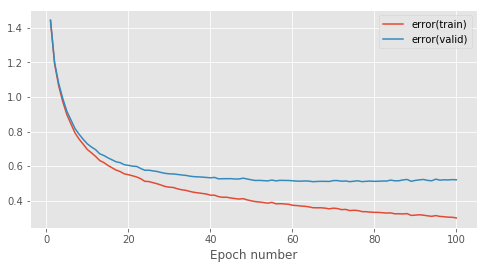

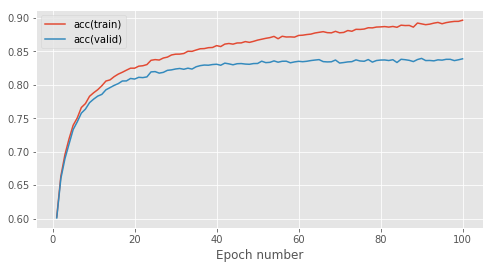

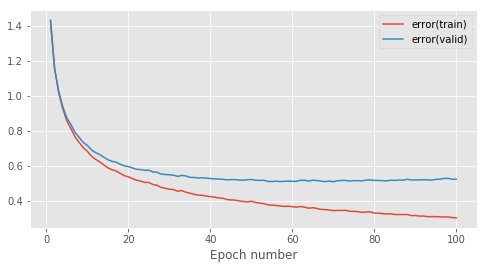

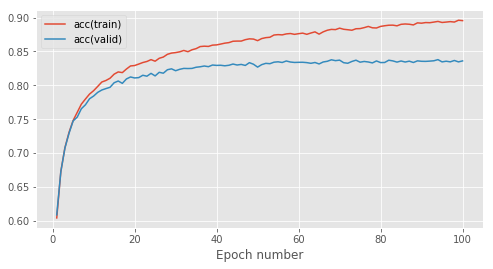

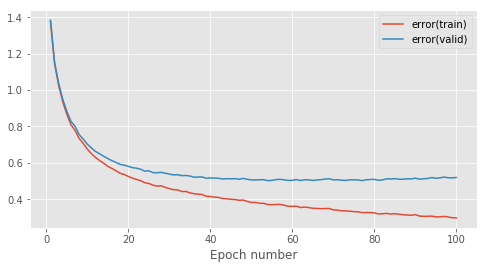

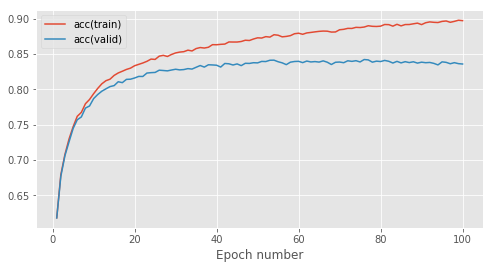

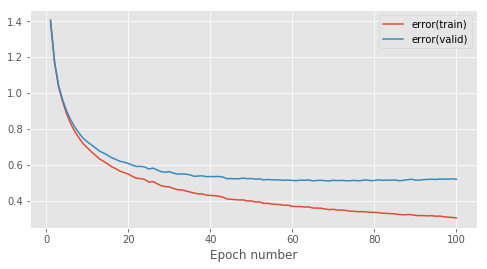

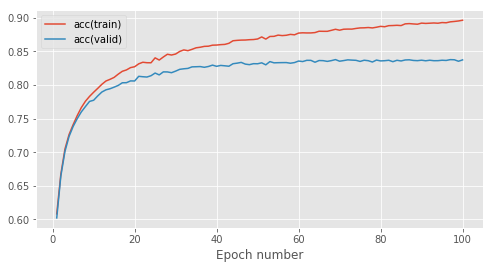

In [5]:
############# Adam BaseLine with no restart scheduler

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

#setup hyperparameters
learning_rate = 1e-4
learning_ranges = [1.05,1.1,1.15,1.2]
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

for learning_range in learning_ranges:
    

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    adam_scheduler_no_restart = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / learning_range, max_learning_rate=learning_rate * learning_range,
                                                       total_iters_per_period=100,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=1.0)

    error = CrossEntropySoftmaxError() 

    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=adam_scheduler_no_restart)

learning_rate 0.000105
epoch 1


Epoch 1: 4.2s to complete
    error(train)=1.44e+00, acc(train)=6.03e-01, error(valid)=1.44e+00, acc(valid)=6.00e-01


learning_rate 0.00010496151223260639
epoch 2


Epoch 2: 4.1s to complete
    error(train)=1.18e+00, acc(train)=6.68e-01, error(valid)=1.19e+00, acc(valid)=6.62e-01


learning_rate 0.0001048466559055088
epoch 3


Epoch 3: 4.2s to complete
    error(train)=1.05e+00, acc(train)=7.02e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


learning_rate 0.00010465724237159743
epoch 4


Epoch 4: 4.1s to complete
    error(train)=9.64e-01, acc(train)=7.23e-01, error(valid)=9.77e-01, acc(valid)=7.17e-01


learning_rate 0.0001043962587954522
epoch 5


Epoch 5: 4.1s to complete
    error(train)=8.93e-01, acc(train)=7.40e-01, error(valid)=9.13e-01, acc(valid)=7.34e-01


learning_rate 0.00010406782104397297
epoch 6


Epoch 6: 4.2s to complete
    error(train)=8.41e-01, acc(train)=7.53e-01, error(valid)=8.65e-01, acc(valid)=7.46e-01


learning_rate 0.00010367710877669976
epoch 7


Epoch 7: 4.2s to complete
    error(train)=8.10e-01, acc(train)=7.56e-01, error(valid)=8.37e-01, acc(valid)=7.50e-01


learning_rate 0.00010323028375948765
epoch 8


Epoch 8: 4.4s to complete
    error(train)=7.61e-01, acc(train)=7.73e-01, error(valid)=7.90e-01, acc(valid)=7.66e-01


learning_rate 0.00010273439268977844
epoch 9


Epoch 9: 4.4s to complete
    error(train)=7.31e-01, acc(train)=7.80e-01, error(valid)=7.62e-01, acc(valid)=7.71e-01


learning_rate 0.00010219725606597238
epoch 10


Epoch 10: 4.4s to complete
    error(train)=7.01e-01, acc(train)=7.87e-01, error(valid)=7.36e-01, acc(valid)=7.75e-01


learning_rate 0.00010162734485349677
epoch 11


Epoch 11: 4.4s to complete
    error(train)=6.77e-01, acc(train)=7.94e-01, error(valid)=7.11e-01, acc(valid)=7.84e-01


learning_rate 0.0001010336468926208
epoch 12


Epoch 12: 4.4s to complete
    error(train)=6.61e-01, acc(train)=7.97e-01, error(valid)=7.00e-01, acc(valid)=7.85e-01


learning_rate 0.00010042552515484546
epoch 13


Epoch 13: 4.4s to complete
    error(train)=6.38e-01, acc(train)=8.04e-01, error(valid)=6.78e-01, acc(valid)=7.92e-01


learning_rate 9.981257008324978e-05
epoch 14


Epoch 14: 4.4s to complete
    error(train)=6.28e-01, acc(train)=8.06e-01, error(valid)=6.73e-01, acc(valid)=7.92e-01


learning_rate 9.920444834547444e-05
epoch 15


Epoch 15: 4.3s to complete
    error(train)=6.10e-01, acc(train)=8.10e-01, error(valid)=6.57e-01, acc(valid)=7.95e-01


learning_rate 9.861075038459847e-05
epoch 16


Epoch 16: 4.4s to complete
    error(train)=5.96e-01, acc(train)=8.15e-01, error(valid)=6.44e-01, acc(valid)=7.99e-01


learning_rate 9.804083917212287e-05
epoch 17


Epoch 17: 4.5s to complete
    error(train)=5.84e-01, acc(train)=8.18e-01, error(valid)=6.33e-01, acc(valid)=8.05e-01


learning_rate 9.750370254831681e-05
epoch 18


Epoch 18: 4.5s to complete
    error(train)=5.74e-01, acc(train)=8.21e-01, error(valid)=6.22e-01, acc(valid)=8.06e-01


learning_rate 9.700781147860759e-05
epoch 19


Epoch 19: 5.0s to complete
    error(train)=5.66e-01, acc(train)=8.21e-01, error(valid)=6.19e-01, acc(valid)=8.05e-01


learning_rate 9.656098646139549e-05
epoch 20


Epoch 20: 4.3s to complete
    error(train)=5.49e-01, acc(train)=8.27e-01, error(valid)=6.04e-01, acc(valid)=8.13e-01


learning_rate 9.617027419412228e-05
epoch 21


Epoch 21: 4.4s to complete
    error(train)=5.41e-01, acc(train)=8.29e-01, error(valid)=5.98e-01, acc(valid)=8.13e-01


learning_rate 9.584183644264305e-05
epoch 22


Epoch 22: 4.4s to complete
    error(train)=5.35e-01, acc(train)=8.31e-01, error(valid)=5.95e-01, acc(valid)=8.13e-01


learning_rate 9.558085286649782e-05
epoch 23


Epoch 23: 4.4s to complete
    error(train)=5.26e-01, acc(train)=8.33e-01, error(valid)=5.88e-01, acc(valid)=8.16e-01


learning_rate 9.539143933258645e-05
epoch 24


Epoch 24: 4.4s to complete
    error(train)=5.16e-01, acc(train)=8.36e-01, error(valid)=5.80e-01, acc(valid)=8.19e-01


learning_rate 9.527658300548886e-05
epoch 25


Epoch 25: 4.4s to complete
    error(train)=5.13e-01, acc(train)=8.35e-01, error(valid)=5.77e-01, acc(valid)=8.19e-01


learning_rate 9.45e-05
epoch 26


Epoch 26: 4.5s to complete
    error(train)=5.08e-01, acc(train)=8.37e-01, error(valid)=5.75e-01, acc(valid)=8.20e-01


learning_rate 9.450032371746353e-05
epoch 27


Epoch 27: 4.5s to complete
    error(train)=4.99e-01, acc(train)=8.39e-01, error(valid)=5.67e-01, acc(valid)=8.21e-01


learning_rate 9.450129430194364e-05
epoch 28


Epoch 28: 4.5s to complete
    error(train)=4.92e-01, acc(train)=8.41e-01, error(valid)=5.61e-01, acc(valid)=8.22e-01


learning_rate 9.450291005070538e-05
epoch 29


Epoch 29: 4.5s to complete
    error(train)=4.85e-01, acc(train)=8.44e-01, error(valid)=5.57e-01, acc(valid)=8.23e-01


learning_rate 9.450516812917637e-05
epoch 30


Epoch 30: 4.5s to complete
    error(train)=4.81e-01, acc(train)=8.43e-01, error(valid)=5.57e-01, acc(valid)=8.21e-01


learning_rate 9.450806457591967e-05
epoch 31


Epoch 31: 4.5s to complete
    error(train)=4.75e-01, acc(train)=8.47e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


learning_rate 9.451159430958348e-05
epoch 32


Epoch 32: 4.7s to complete
    error(train)=4.69e-01, acc(train)=8.48e-01, error(valid)=5.47e-01, acc(valid)=8.29e-01


learning_rate 9.451575113781555e-05
epoch 33


Epoch 33: 5.0s to complete
    error(train)=4.64e-01, acc(train)=8.50e-01, error(valid)=5.44e-01, acc(valid)=8.27e-01


learning_rate 9.452052776812666e-05
epoch 34


Epoch 34: 5.0s to complete
    error(train)=4.59e-01, acc(train)=8.52e-01, error(valid)=5.42e-01, acc(valid)=8.29e-01


learning_rate 9.452591582068411e-05
epoch 35


Epoch 35: 4.8s to complete
    error(train)=4.55e-01, acc(train)=8.51e-01, error(valid)=5.38e-01, acc(valid)=8.31e-01


learning_rate 9.453190584301286e-05
epoch 36


Epoch 36: 4.9s to complete
    error(train)=4.52e-01, acc(train)=8.53e-01, error(valid)=5.39e-01, acc(valid)=8.29e-01


learning_rate 9.453848732657832e-05
epoch 37


Epoch 37: 5.0s to complete
    error(train)=4.49e-01, acc(train)=8.52e-01, error(valid)=5.38e-01, acc(valid)=8.27e-01


learning_rate 9.454564872522191e-05
epoch 38


Epoch 38: 4.8s to complete
    error(train)=4.42e-01, acc(train)=8.56e-01, error(valid)=5.33e-01, acc(valid)=8.32e-01


learning_rate 9.455337747541696e-05
epoch 39


Epoch 39: 5.3s to complete
    error(train)=4.39e-01, acc(train)=8.56e-01, error(valid)=5.30e-01, acc(valid)=8.32e-01


learning_rate 9.456166001830938e-05
epoch 40


Epoch 40: 4.4s to complete
    error(train)=4.39e-01, acc(train)=8.56e-01, error(valid)=5.32e-01, acc(valid)=8.29e-01


learning_rate 9.457048182350449e-05
epoch 41


Epoch 41: 4.4s to complete
    error(train)=4.36e-01, acc(train)=8.55e-01, error(valid)=5.32e-01, acc(valid)=8.31e-01


learning_rate 9.457982741455833e-05
epoch 42


Epoch 42: 4.4s to complete
    error(train)=4.26e-01, acc(train)=8.60e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


learning_rate 9.458968039612853e-05
epoch 43


Epoch 43: 4.4s to complete
    error(train)=4.25e-01, acc(train)=8.59e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


learning_rate 9.460002348273734e-05
epoch 44


Epoch 44: 4.4s to complete
    error(train)=4.23e-01, acc(train)=8.60e-01, error(valid)=5.22e-01, acc(valid)=8.35e-01


learning_rate 9.461083852909626e-05
epoch 45


Epoch 45: 4.4s to complete
    error(train)=4.19e-01, acc(train)=8.61e-01, error(valid)=5.22e-01, acc(valid)=8.33e-01


learning_rate 9.4622106561939e-05
epoch 46


Epoch 46: 4.9s to complete
    error(train)=4.15e-01, acc(train)=8.62e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


learning_rate 9.463380781330704e-05
epoch 47


Epoch 47: 4.9s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=5.23e-01, acc(valid)=8.34e-01


learning_rate 9.464592175522937e-05
epoch 48


Epoch 48: 4.7s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


learning_rate 9.465842713573551e-05
epoch 49


Epoch 49: 4.5s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=5.20e-01, acc(valid)=8.35e-01


learning_rate 9.46713020161387e-05
epoch 50


Epoch 50: 4.4s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


learning_rate 9.468452380952382e-05
epoch 51


Epoch 51: 4.5s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


learning_rate 9.469806932037243e-05
epoch 52


Epoch 52: 4.5s to complete
    error(train)=3.94e-01, acc(train)=8.68e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


learning_rate 9.471191478525575e-05
epoch 53


Epoch 53: 4.5s to complete
    error(train)=3.91e-01, acc(train)=8.70e-01, error(valid)=5.09e-01, acc(valid)=8.39e-01


learning_rate 9.472603591452363e-05
epoch 54


Epoch 54: 4.5s to complete
    error(train)=3.95e-01, acc(train)=8.67e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


learning_rate 9.474040793491696e-05
epoch 55


Epoch 55: 4.5s to complete
    error(train)=3.85e-01, acc(train)=8.72e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


learning_rate 9.47550056330283e-05
epoch 56


Epoch 56: 4.5s to complete
    error(train)=3.89e-01, acc(train)=8.69e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


learning_rate 9.476980339953485e-05
epoch 57


Epoch 57: 4.5s to complete
    error(train)=3.82e-01, acc(train)=8.72e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


learning_rate 9.478477527412584e-05
epoch 58


Epoch 58: 4.4s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=5.06e-01, acc(valid)=8.39e-01


learning_rate 9.479989499104575e-05
epoch 59


Epoch 59: 4.6s to complete
    error(train)=3.75e-01, acc(train)=8.75e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


learning_rate 9.48151360251734e-05
epoch 60


Epoch 60: 4.4s to complete
    error(train)=3.78e-01, acc(train)=8.73e-01, error(valid)=5.08e-01, acc(valid)=8.39e-01


learning_rate 9.4830471638556e-05
epoch 61


Epoch 61: 4.5s to complete
    error(train)=3.73e-01, acc(train)=8.74e-01, error(valid)=5.06e-01, acc(valid)=8.39e-01


learning_rate 9.484587492731657e-05
epoch 62


Epoch 62: 4.5s to complete
    error(train)=3.70e-01, acc(train)=8.76e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


learning_rate 9.486131886885257e-05
epoch 63


Epoch 63: 4.4s to complete
    error(train)=3.69e-01, acc(train)=8.74e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


learning_rate 9.487677636924268e-05
epoch 64


Epoch 64: 4.4s to complete
    error(train)=3.66e-01, acc(train)=8.76e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


learning_rate 9.489222031077868e-05
epoch 65


Epoch 65: 4.5s to complete
    error(train)=3.63e-01, acc(train)=8.77e-01, error(valid)=5.04e-01, acc(valid)=8.40e-01


learning_rate 9.490762359953925e-05
epoch 66


Epoch 66: 4.5s to complete
    error(train)=3.63e-01, acc(train)=8.78e-01, error(valid)=5.06e-01, acc(valid)=8.39e-01


learning_rate 9.492295921292184e-05
epoch 67


Epoch 67: 4.5s to complete
    error(train)=3.62e-01, acc(train)=8.78e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


learning_rate 9.49382002470495e-05
epoch 68


Epoch 68: 4.6s to complete
    error(train)=3.58e-01, acc(train)=8.79e-01, error(valid)=5.04e-01, acc(valid)=8.40e-01


learning_rate 9.49533199639694e-05
epoch 69


Epoch 69: 4.5s to complete
    error(train)=3.56e-01, acc(train)=8.80e-01, error(valid)=5.04e-01, acc(valid)=8.40e-01


learning_rate 9.49682918385604e-05
epoch 70


Epoch 70: 4.4s to complete
    error(train)=3.53e-01, acc(train)=8.81e-01, error(valid)=5.02e-01, acc(valid)=8.41e-01


learning_rate 9.498308960506695e-05
epoch 71


Epoch 71: 4.4s to complete
    error(train)=3.52e-01, acc(train)=8.80e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


learning_rate 9.499768730317829e-05
epoch 72


Epoch 72: 4.3s to complete
    error(train)=3.50e-01, acc(train)=8.82e-01, error(valid)=5.05e-01, acc(valid)=8.40e-01


learning_rate 9.501205932357161e-05
epoch 73


Epoch 73: 4.4s to complete
    error(train)=3.50e-01, acc(train)=8.81e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


learning_rate 9.50261804528395e-05
epoch 74


Epoch 74: 4.4s to complete
    error(train)=3.49e-01, acc(train)=8.82e-01, error(valid)=5.08e-01, acc(valid)=8.41e-01


learning_rate 9.504002591772281e-05
epoch 75


Epoch 75: 4.4s to complete
    error(train)=3.45e-01, acc(train)=8.82e-01, error(valid)=5.02e-01, acc(valid)=8.41e-01


learning_rate 9.505357142857143e-05
epoch 76


Epoch 76: 4.5s to complete
    error(train)=3.43e-01, acc(train)=8.83e-01, error(valid)=5.03e-01, acc(valid)=8.41e-01


learning_rate 9.506679322195654e-05
epoch 77


Epoch 77: 4.5s to complete
    error(train)=3.45e-01, acc(train)=8.83e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


learning_rate 9.507966810235973e-05
epoch 78


Epoch 78: 4.5s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=5.06e-01, acc(valid)=8.40e-01


learning_rate 9.509217348286588e-05
epoch 79


Epoch 79: 4.6s to complete
    error(train)=3.39e-01, acc(train)=8.85e-01, error(valid)=5.06e-01, acc(valid)=8.40e-01


learning_rate 9.510428742478821e-05
epoch 80


Epoch 80: 4.5s to complete
    error(train)=3.38e-01, acc(train)=8.84e-01, error(valid)=5.06e-01, acc(valid)=8.41e-01


learning_rate 9.511598867615624e-05
epoch 81


Epoch 81: 4.4s to complete
    error(train)=3.34e-01, acc(train)=8.86e-01, error(valid)=5.02e-01, acc(valid)=8.42e-01


learning_rate 9.512725670899899e-05
epoch 82


Epoch 82: 4.5s to complete
    error(train)=3.34e-01, acc(train)=8.85e-01, error(valid)=5.06e-01, acc(valid)=8.39e-01


learning_rate 9.51380717553579e-05
epoch 83


Epoch 83: 4.5s to complete
    error(train)=3.31e-01, acc(train)=8.87e-01, error(valid)=5.07e-01, acc(valid)=8.39e-01


learning_rate 9.514841484196672e-05
epoch 84


Epoch 84: 4.4s to complete
    error(train)=3.29e-01, acc(train)=8.88e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


learning_rate 9.515826782353692e-05
epoch 85


Epoch 85: 4.5s to complete
    error(train)=3.28e-01, acc(train)=8.87e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


learning_rate 9.516761341459076e-05
epoch 86


Epoch 86: 4.5s to complete
    error(train)=3.26e-01, acc(train)=8.88e-01, error(valid)=5.06e-01, acc(valid)=8.39e-01


learning_rate 9.517643521978587e-05
epoch 87


Epoch 87: 4.5s to complete
    error(train)=3.27e-01, acc(train)=8.88e-01, error(valid)=5.07e-01, acc(valid)=8.39e-01


learning_rate 9.518471776267829e-05
epoch 88


Epoch 88: 4.5s to complete
    error(train)=3.21e-01, acc(train)=8.91e-01, error(valid)=5.08e-01, acc(valid)=8.40e-01


learning_rate 9.519244651287334e-05
epoch 89


Epoch 89: 4.5s to complete
    error(train)=3.19e-01, acc(train)=8.91e-01, error(valid)=5.05e-01, acc(valid)=8.41e-01


learning_rate 9.519960791151692e-05
epoch 90


Epoch 90: 4.5s to complete
    error(train)=3.24e-01, acc(train)=8.89e-01, error(valid)=5.13e-01, acc(valid)=8.39e-01


learning_rate 9.520618939508239e-05
epoch 91


Epoch 91: 4.6s to complete
    error(train)=3.18e-01, acc(train)=8.91e-01, error(valid)=5.09e-01, acc(valid)=8.42e-01


learning_rate 9.521217941741114e-05
epoch 92


Epoch 92: 4.5s to complete
    error(train)=3.18e-01, acc(train)=8.90e-01, error(valid)=5.11e-01, acc(valid)=8.40e-01


learning_rate 9.521756746996859e-05
epoch 93


Epoch 93: 4.5s to complete
    error(train)=3.16e-01, acc(train)=8.91e-01, error(valid)=5.12e-01, acc(valid)=8.40e-01


learning_rate 9.52223441002797e-05
epoch 94


Epoch 94: 4.5s to complete
    error(train)=3.16e-01, acc(train)=8.92e-01, error(valid)=5.12e-01, acc(valid)=8.40e-01


learning_rate 9.522650092851176e-05
epoch 95


Epoch 95: 4.5s to complete
    error(train)=3.13e-01, acc(train)=8.92e-01, error(valid)=5.11e-01, acc(valid)=8.39e-01


learning_rate 9.523003066217558e-05
epoch 96


Epoch 96: 4.5s to complete
    error(train)=3.10e-01, acc(train)=8.93e-01, error(valid)=5.10e-01, acc(valid)=8.42e-01


learning_rate 9.523292710891888e-05
epoch 97


Epoch 97: 4.6s to complete
    error(train)=3.08e-01, acc(train)=8.93e-01, error(valid)=5.07e-01, acc(valid)=8.41e-01


learning_rate 9.523518518738987e-05
epoch 98


Epoch 98: 5.0s to complete
    error(train)=3.07e-01, acc(train)=8.95e-01, error(valid)=5.09e-01, acc(valid)=8.41e-01


learning_rate 9.523680093615161e-05
epoch 99


Epoch 99: 5.2s to complete
    error(train)=3.07e-01, acc(train)=8.94e-01, error(valid)=5.11e-01, acc(valid)=8.39e-01


learning_rate 9.523777152063172e-05
epoch 100


Epoch 100: 5.1s to complete
    error(train)=3.06e-01, acc(train)=8.95e-01, error(valid)=5.15e-01, acc(valid)=8.40e-01


learning_rate 0.00011000000000000002
epoch 1


Epoch 1: 4.3s to complete
    error(train)=1.40e+00, acc(train)=6.20e-01, error(valid)=1.40e+00, acc(valid)=6.19e-01


learning_rate 0.00010992473123982004
epoch 2


Epoch 2: 4.3s to complete
    error(train)=1.16e+00, acc(train)=6.74e-01, error(valid)=1.16e+00, acc(valid)=6.72e-01


learning_rate 0.0001097001119925915
epoch 3


Epoch 3: 4.2s to complete
    error(train)=1.03e+00, acc(train)=7.05e-01, error(valid)=1.04e+00, acc(valid)=7.04e-01


learning_rate 0.00010932968463802423
epoch 4


Epoch 4: 4.3s to complete
    error(train)=9.49e-01, acc(train)=7.27e-01, error(valid)=9.55e-01, acc(valid)=7.25e-01


learning_rate 0.00010881929103678235
epoch 5


Epoch 5: 4.3s to complete
    error(train)=8.77e-01, acc(train)=7.46e-01, error(valid)=8.90e-01, acc(valid)=7.39e-01


learning_rate 0.00010817698040085179
epoch 6


Epoch 6: 4.4s to complete
    error(train)=8.24e-01, acc(train)=7.59e-01, error(valid)=8.40e-01, acc(valid)=7.50e-01


learning_rate 0.00010741288235265894
epoch 7


Epoch 7: 4.4s to complete
    error(train)=7.87e-01, acc(train)=7.66e-01, error(valid)=8.03e-01, acc(valid)=7.58e-01


learning_rate 0.00010653904717487387
epoch 8


Epoch 8: 4.5s to complete
    error(train)=7.52e-01, acc(train)=7.74e-01, error(valid)=7.73e-01, acc(valid)=7.65e-01


learning_rate 0.00010556925577025408
epoch 9


Epoch 9: 4.5s to complete
    error(train)=7.26e-01, acc(train)=7.82e-01, error(valid)=7.51e-01, acc(valid)=7.72e-01


learning_rate 0.0001045188023285757
epoch 10


Epoch 10: 4.4s to complete
    error(train)=6.94e-01, acc(train)=7.91e-01, error(valid)=7.19e-01, acc(valid)=7.82e-01


learning_rate 0.0001034042531281245
epoch 11


Epoch 11: 4.5s to complete
    error(train)=6.72e-01, acc(train)=7.97e-01, error(valid)=6.97e-01, acc(valid)=7.89e-01


learning_rate 0.00010224318527559102
epoch 12


Epoch 12: 4.4s to complete
    error(train)=6.52e-01, acc(train)=8.00e-01, error(valid)=6.83e-01, acc(valid)=7.89e-01


learning_rate 0.000101053909504598
epoch 13


Epoch 13: 4.5s to complete
    error(train)=6.40e-01, acc(train)=8.02e-01, error(valid)=6.71e-01, acc(valid)=7.91e-01


learning_rate 9.985518140449292e-05
epoch 14


Epoch 14: 4.5s to complete
    error(train)=6.18e-01, acc(train)=8.09e-01, error(valid)=6.55e-01, acc(valid)=7.98e-01


learning_rate 9.86659056334999e-05
epoch 15


Epoch 15: 4.5s to complete
    error(train)=6.09e-01, acc(train)=8.11e-01, error(valid)=6.48e-01, acc(valid)=8.00e-01


learning_rate 9.750483778096642e-05
epoch 16


Epoch 16: 4.6s to complete
    error(train)=5.92e-01, acc(train)=8.15e-01, error(valid)=6.34e-01, acc(valid)=8.00e-01


learning_rate 9.639028858051521e-05
epoch 17


Epoch 17: 4.6s to complete
    error(train)=5.84e-01, acc(train)=8.18e-01, error(valid)=6.29e-01, acc(valid)=8.02e-01


learning_rate 9.533983513883685e-05
epoch 18


Epoch 18: 4.5s to complete
    error(train)=5.75e-01, acc(train)=8.21e-01, error(valid)=6.22e-01, acc(valid)=8.04e-01


learning_rate 9.437004373421705e-05
epoch 19


Epoch 19: 4.5s to complete
    error(train)=5.62e-01, acc(train)=8.24e-01, error(valid)=6.12e-01, acc(valid)=8.07e-01


learning_rate 9.349620855643199e-05
epoch 20


Epoch 20: 5.0s to complete
    error(train)=5.53e-01, acc(train)=8.25e-01, error(valid)=6.05e-01, acc(valid)=8.07e-01


learning_rate 9.273211050823913e-05
epoch 21


Epoch 21: 4.5s to complete
    error(train)=5.43e-01, acc(train)=8.30e-01, error(valid)=5.96e-01, acc(valid)=8.12e-01


learning_rate 9.208979987230857e-05
epoch 22


Epoch 22: 4.6s to complete
    error(train)=5.37e-01, acc(train)=8.31e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


learning_rate 9.157940627106669e-05
epoch 23


Epoch 23: 4.5s to complete
    error(train)=5.30e-01, acc(train)=8.32e-01, error(valid)=5.90e-01, acc(valid)=8.12e-01


learning_rate 9.120897891649943e-05
epoch 24


Epoch 24: 4.6s to complete
    error(train)=5.22e-01, acc(train)=8.34e-01, error(valid)=5.83e-01, acc(valid)=8.14e-01


learning_rate 9.098435966927088e-05
epoch 25


Epoch 25: 4.6s to complete
    error(train)=5.14e-01, acc(train)=8.36e-01, error(valid)=5.76e-01, acc(valid)=8.17e-01


learning_rate 9.900000000000002e-05
epoch 26


Epoch 26: 4.7s to complete
    error(train)=5.12e-01, acc(train)=8.36e-01, error(valid)=5.76e-01, acc(valid)=8.17e-01


learning_rate 9.899645144903632e-05
epoch 27


Epoch 27: 4.6s to complete
    error(train)=5.06e-01, acc(train)=8.37e-01, error(valid)=5.73e-01, acc(valid)=8.16e-01


learning_rate 9.898581202150937e-05
epoch 28


Epoch 28: 4.4s to complete
    error(train)=4.96e-01, acc(train)=8.40e-01, error(valid)=5.67e-01, acc(valid)=8.15e-01


learning_rate 9.89681003825904e-05
epoch 29


Epoch 29: 4.4s to complete
    error(train)=4.89e-01, acc(train)=8.43e-01, error(valid)=5.63e-01, acc(valid)=8.18e-01


learning_rate 9.894334760451252e-05
epoch 30


Epoch 30: 4.3s to complete
    error(train)=4.83e-01, acc(train)=8.43e-01, error(valid)=5.57e-01, acc(valid)=8.19e-01


learning_rate 9.89115971120595e-05
epoch 31


Epoch 31: 4.4s to complete
    error(train)=4.79e-01, acc(train)=8.44e-01, error(valid)=5.55e-01, acc(valid)=8.22e-01


learning_rate 9.887290460638403e-05
epoch 32


Epoch 32: 4.5s to complete
    error(train)=4.75e-01, acc(train)=8.47e-01, error(valid)=5.53e-01, acc(valid)=8.22e-01


learning_rate 9.882733796728883e-05
epoch 33


Epoch 33: 4.8s to complete
    error(train)=4.65e-01, acc(train)=8.50e-01, error(valid)=5.45e-01, acc(valid)=8.25e-01


learning_rate 9.877497713414256e-05
epoch 34


Epoch 34: 4.8s to complete
    error(train)=4.66e-01, acc(train)=8.48e-01, error(valid)=5.50e-01, acc(valid)=8.23e-01


learning_rate 9.871591396563885e-05
epoch 35


Epoch 35: 4.8s to complete
    error(train)=4.63e-01, acc(train)=8.48e-01, error(valid)=5.48e-01, acc(valid)=8.21e-01


learning_rate 9.865025207864508e-05
epoch 36


Epoch 36: 4.9s to complete
    error(train)=4.56e-01, acc(train)=8.50e-01, error(valid)=5.45e-01, acc(valid)=8.26e-01


learning_rate 9.85781066664231e-05
epoch 37


Epoch 37: 5.0s to complete
    error(train)=4.52e-01, acc(train)=8.50e-01, error(valid)=5.44e-01, acc(valid)=8.24e-01


learning_rate 9.84996042965411e-05
epoch 38


Epoch 38: 4.7s to complete
    error(train)=4.44e-01, acc(train)=8.54e-01, error(valid)=5.37e-01, acc(valid)=8.26e-01


learning_rate 9.841488268883116e-05
epoch 39


Epoch 39: 4.4s to complete
    error(train)=4.41e-01, acc(train)=8.54e-01, error(valid)=5.38e-01, acc(valid)=8.24e-01


learning_rate 9.832409047378179e-05
epoch 40


Epoch 40: 4.3s to complete
    error(train)=4.37e-01, acc(train)=8.55e-01, error(valid)=5.34e-01, acc(valid)=8.25e-01


learning_rate 9.822738693178958e-05
epoch 41


Epoch 41: 4.3s to complete
    error(train)=4.32e-01, acc(train)=8.56e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


learning_rate 9.812494171372727e-05
epoch 42


Epoch 42: 4.3s to complete
    error(train)=4.29e-01, acc(train)=8.58e-01, error(valid)=5.31e-01, acc(valid)=8.27e-01


learning_rate 9.801693454331848e-05
epoch 43


Epoch 43: 4.3s to complete
    error(train)=4.23e-01, acc(train)=8.59e-01, error(valid)=5.29e-01, acc(valid)=8.27e-01


learning_rate 9.790355490184118e-05
epoch 44


Epoch 44: 4.3s to complete
    error(train)=4.17e-01, acc(train)=8.62e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


learning_rate 9.778500169571318e-05
epoch 45


Epoch 45: 4.4s to complete
    error(train)=4.20e-01, acc(train)=8.59e-01, error(valid)=5.30e-01, acc(valid)=8.27e-01


learning_rate 9.766148290754267e-05
epoch 46


Epoch 46: 4.4s to complete
    error(train)=4.15e-01, acc(train)=8.62e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


learning_rate 9.753321523125608e-05
epoch 47


Epoch 47: 4.4s to complete
    error(train)=4.17e-01, acc(train)=8.61e-01, error(valid)=5.31e-01, acc(valid)=8.28e-01


learning_rate 9.740042369194326e-05
epoch 48


Epoch 48: 4.4s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


learning_rate 9.726334125108703e-05
epoch 49


Epoch 49: 4.4s to complete
    error(train)=4.06e-01, acc(train)=8.63e-01, error(valid)=5.21e-01, acc(valid)=8.31e-01


learning_rate 9.71222083978696e-05
epoch 50


Epoch 50: 4.8s to complete
    error(train)=4.03e-01, acc(train)=8.65e-01, error(valid)=5.23e-01, acc(valid)=8.29e-01


learning_rate 9.697727272727275e-05
epoch 51


Epoch 51: 4.7s to complete
    error(train)=4.03e-01, acc(train)=8.65e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


learning_rate 9.682878850571218e-05
epoch 52


Epoch 52: 4.8s to complete
    error(train)=3.95e-01, acc(train)=8.68e-01, error(valid)=5.17e-01, acc(valid)=8.31e-01


learning_rate 9.66770162249678e-05
epoch 53


Epoch 53: 4.3s to complete
    error(train)=3.94e-01, acc(train)=8.67e-01, error(valid)=5.17e-01, acc(valid)=8.31e-01


learning_rate 9.652222214519262e-05
epoch 54


Epoch 54: 4.3s to complete
    error(train)=3.98e-01, acc(train)=8.66e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


learning_rate 9.63646778278019e-05
epoch 55


Epoch 55: 4.3s to complete
    error(train)=3.89e-01, acc(train)=8.69e-01, error(valid)=5.16e-01, acc(valid)=8.30e-01


learning_rate 9.62046596590623e-05
epoch 56


Epoch 56: 4.3s to complete
    error(train)=3.87e-01, acc(train)=8.69e-01, error(valid)=5.19e-01, acc(valid)=8.30e-01


learning_rate 9.604244836521632e-05
epoch 57


Epoch 57: 4.4s to complete
    error(train)=3.84e-01, acc(train)=8.70e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


learning_rate 9.587832851999312e-05
epoch 58


Epoch 58: 4.3s to complete
    error(train)=3.83e-01, acc(train)=8.70e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


learning_rate 9.571258804536953e-05
epoch 59


Epoch 59: 4.3s to complete
    error(train)=3.78e-01, acc(train)=8.73e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


learning_rate 9.554551770645704e-05
epoch 60


Epoch 60: 4.7s to complete
    error(train)=3.83e-01, acc(train)=8.70e-01, error(valid)=5.20e-01, acc(valid)=8.30e-01


learning_rate 9.537741060140098e-05
epoch 61


Epoch 61: 4.4s to complete
    error(train)=3.76e-01, acc(train)=8.74e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


learning_rate 9.520856164718678e-05
epoch 62


Epoch 62: 4.3s to complete
    error(train)=3.74e-01, acc(train)=8.72e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


learning_rate 9.50392670622554e-05
epoch 63


Epoch 63: 4.3s to complete
    error(train)=3.71e-01, acc(train)=8.74e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


learning_rate 9.486982384683552e-05
epoch 64


Epoch 64: 4.3s to complete
    error(train)=3.66e-01, acc(train)=8.76e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


learning_rate 9.470052926190414e-05
epoch 65


Epoch 65: 4.4s to complete
    error(train)=3.67e-01, acc(train)=8.75e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


learning_rate 9.453168030768995e-05
epoch 66


Epoch 66: 4.5s to complete
    error(train)=3.66e-01, acc(train)=8.75e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


learning_rate 9.436357320263388e-05
epoch 67


Epoch 67: 4.5s to complete
    error(train)=3.64e-01, acc(train)=8.76e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


learning_rate 9.41965028637214e-05
epoch 68


Epoch 68: 4.4s to complete
    error(train)=3.58e-01, acc(train)=8.78e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


learning_rate 9.403076238909781e-05
epoch 69


Epoch 69: 4.4s to complete
    error(train)=3.54e-01, acc(train)=8.81e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


learning_rate 9.38666425438746e-05
epoch 70


Epoch 70: 4.4s to complete
    error(train)=3.54e-01, acc(train)=8.80e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


learning_rate 9.370443125002863e-05
epoch 71


Epoch 71: 4.3s to complete
    error(train)=3.55e-01, acc(train)=8.79e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


learning_rate 9.354441308128902e-05
epoch 72


Epoch 72: 4.3s to complete
    error(train)=3.52e-01, acc(train)=8.79e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


learning_rate 9.338686876389831e-05
epoch 73


Epoch 73: 4.3s to complete
    error(train)=3.51e-01, acc(train)=8.80e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


learning_rate 9.323207468412312e-05
epoch 74


Epoch 74: 4.3s to complete
    error(train)=3.51e-01, acc(train)=8.79e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


learning_rate 9.308030240337874e-05
epoch 75


Epoch 75: 4.3s to complete
    error(train)=3.48e-01, acc(train)=8.81e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


learning_rate 9.293181818181819e-05
epoch 76


Epoch 76: 4.3s to complete
    error(train)=3.45e-01, acc(train)=8.82e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


learning_rate 9.278688251122133e-05
epoch 77


Epoch 77: 4.4s to complete
    error(train)=3.42e-01, acc(train)=8.83e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


learning_rate 9.264574965800389e-05
epoch 78


Epoch 78: 4.4s to complete
    error(train)=3.39e-01, acc(train)=8.84e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


learning_rate 9.250866721714766e-05
epoch 79


Epoch 79: 4.4s to complete
    error(train)=3.41e-01, acc(train)=8.84e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


learning_rate 9.237587567783485e-05
epoch 80


Epoch 80: 4.4s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


learning_rate 9.224760800154825e-05
epoch 81


Epoch 81: 4.4s to complete
    error(train)=3.37e-01, acc(train)=8.85e-01, error(valid)=5.15e-01, acc(valid)=8.32e-01


learning_rate 9.212408921337775e-05
epoch 82


Epoch 82: 4.4s to complete
    error(train)=3.39e-01, acc(train)=8.82e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


learning_rate 9.200553600724975e-05
epoch 83


Epoch 83: 4.4s to complete
    error(train)=3.34e-01, acc(train)=8.85e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


learning_rate 9.189215636577244e-05
epoch 84


Epoch 84: 4.3s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


learning_rate 9.178414919536365e-05
epoch 85


Epoch 85: 4.3s to complete
    error(train)=3.34e-01, acc(train)=8.84e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


learning_rate 9.168170397730134e-05
epoch 86


Epoch 86: 4.3s to complete
    error(train)=3.31e-01, acc(train)=8.85e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


learning_rate 9.158500043530914e-05
epoch 87


Epoch 87: 4.3s to complete
    error(train)=3.27e-01, acc(train)=8.88e-01, error(valid)=5.15e-01, acc(valid)=8.37e-01


learning_rate 9.149420822025976e-05
epoch 88


Epoch 88: 4.4s to complete
    error(train)=3.23e-01, acc(train)=8.89e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


learning_rate 9.140948661254982e-05
epoch 89


Epoch 89: 4.4s to complete
    error(train)=3.22e-01, acc(train)=8.89e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


learning_rate 9.133098424266783e-05
epoch 90


Epoch 90: 4.3s to complete
    error(train)=3.27e-01, acc(train)=8.87e-01, error(valid)=5.24e-01, acc(valid)=8.34e-01


learning_rate 9.125883883044583e-05
epoch 91


Epoch 91: 4.3s to complete
    error(train)=3.24e-01, acc(train)=8.87e-01, error(valid)=5.20e-01, acc(valid)=8.35e-01


learning_rate 9.119317694345207e-05
epoch 92


Epoch 92: 4.3s to complete
    error(train)=3.19e-01, acc(train)=8.90e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


learning_rate 9.113411377494836e-05
epoch 93


Epoch 93: 4.3s to complete
    error(train)=3.18e-01, acc(train)=8.90e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


learning_rate 9.108175294180209e-05
epoch 94


Epoch 94: 4.4s to complete
    error(train)=3.17e-01, acc(train)=8.91e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


learning_rate 9.103618630270689e-05
epoch 95


Epoch 95: 4.3s to complete
    error(train)=3.16e-01, acc(train)=8.90e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


learning_rate 9.099749379703142e-05
epoch 96


Epoch 96: 4.3s to complete
    error(train)=3.16e-01, acc(train)=8.90e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


learning_rate 9.09657433045784e-05
epoch 97


Epoch 97: 4.4s to complete
    error(train)=3.11e-01, acc(train)=8.93e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


learning_rate 9.094099052650052e-05
epoch 98


Epoch 98: 4.4s to complete
    error(train)=3.11e-01, acc(train)=8.92e-01, error(valid)=5.18e-01, acc(valid)=8.35e-01


learning_rate 9.092327888758155e-05
epoch 99


Epoch 99: 4.4s to complete
    error(train)=3.13e-01, acc(train)=8.91e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


learning_rate 9.091263946005461e-05
epoch 100


Epoch 100: 4.3s to complete
    error(train)=3.06e-01, acc(train)=8.95e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


learning_rate 0.00011499999999999999
epoch 1


Epoch 1: 4.7s to complete
    error(train)=1.41e+00, acc(train)=6.11e-01, error(valid)=1.40e+00, acc(valid)=6.07e-01


learning_rate 0.00011488943439886604
epoch 2


Epoch 2: 4.0s to complete
    error(train)=1.17e+00, acc(train)=6.68e-01, error(valid)=1.18e+00, acc(valid)=6.61e-01


learning_rate 0.00011455948128104275
epoch 3


Epoch 3: 4.3s to complete
    error(train)=1.05e+00, acc(train)=7.00e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01


learning_rate 0.00011401534420430265
epoch 4


Epoch 4: 4.5s to complete
    error(train)=9.58e-01, acc(train)=7.24e-01, error(valid)=9.65e-01, acc(valid)=7.20e-01


learning_rate 0.00011326560453539765
epoch 5


Epoch 5: 5.1s to complete
    error(train)=8.91e-01, acc(train)=7.40e-01, error(valid)=9.03e-01, acc(valid)=7.36e-01


learning_rate 0.00011232208611677914
epoch 6


Epoch 6: 4.2s to complete
    error(train)=8.32e-01, acc(train)=7.54e-01, error(valid)=8.47e-01, acc(valid)=7.50e-01


learning_rate 0.00011119966879753935
epoch 7


Epoch 7: 4.3s to complete
    error(train)=7.88e-01, acc(train)=7.65e-01, error(valid)=8.06e-01, acc(valid)=7.60e-01


learning_rate 0.00010991605376930227
epoch 8


Epoch 8: 4.4s to complete
    error(train)=7.50e-01, acc(train)=7.75e-01, error(valid)=7.72e-01, acc(valid)=7.68e-01


learning_rate 0.00010849148440785766
epoch 9


Epoch 9: 4.3s to complete
    error(train)=7.24e-01, acc(train)=7.82e-01, error(valid)=7.51e-01, acc(valid)=7.77e-01


learning_rate 0.000106948427023032
epoch 10


Epoch 10: 4.3s to complete
    error(train)=7.03e-01, acc(train)=7.85e-01, error(valid)=7.31e-01, acc(valid)=7.77e-01


learning_rate 0.00010531121655156175
epoch 11


Epoch 11: 4.4s to complete
    error(train)=6.75e-01, acc(train)=7.95e-01, error(valid)=7.06e-01, acc(valid)=7.88e-01


learning_rate 0.00010360567278060418
epoch 12


Epoch 12: 4.4s to complete
    error(train)=6.57e-01, acc(train)=7.98e-01, error(valid)=6.93e-01, acc(valid)=7.90e-01


learning_rate 0.00010185869315426971
epoch 13


Epoch 13: 4.4s to complete
    error(train)=6.36e-01, acc(train)=8.03e-01, error(valid)=6.74e-01, acc(valid)=7.96e-01


learning_rate 0.00010009782858486072
epoch 14


Epoch 14: 4.4s to complete
    error(train)=6.22e-01, acc(train)=8.08e-01, error(valid)=6.64e-01, acc(valid)=7.97e-01


learning_rate 9.835084895852625e-05
epoch 15


Epoch 15: 4.5s to complete
    error(train)=6.06e-01, acc(train)=8.12e-01, error(valid)=6.51e-01, acc(valid)=8.01e-01


learning_rate 9.664530518756868e-05
epoch 16


Epoch 16: 4.5s to complete
    error(train)=5.97e-01, acc(train)=8.14e-01, error(valid)=6.45e-01, acc(valid)=8.01e-01


learning_rate 9.500809471609844e-05
epoch 17


Epoch 17: 4.5s to complete
    error(train)=5.81e-01, acc(train)=8.18e-01, error(valid)=6.30e-01, acc(valid)=8.02e-01


learning_rate 9.346503733127276e-05
epoch 18


Epoch 18: 4.4s to complete
    error(train)=5.76e-01, acc(train)=8.21e-01, error(valid)=6.32e-01, acc(valid)=8.04e-01


learning_rate 9.204046796982816e-05
epoch 19


Epoch 19: 4.3s to complete
    error(train)=5.62e-01, acc(train)=8.24e-01, error(valid)=6.18e-01, acc(valid)=8.07e-01


learning_rate 9.075685294159108e-05
epoch 20


Epoch 20: 4.4s to complete
    error(train)=5.55e-01, acc(train)=8.25e-01, error(valid)=6.14e-01, acc(valid)=8.07e-01


learning_rate 8.963443562235129e-05
epoch 21


Epoch 21: 4.3s to complete
    error(train)=5.47e-01, acc(train)=8.27e-01, error(valid)=6.10e-01, acc(valid)=8.08e-01


learning_rate 8.869091720373278e-05
epoch 22


Epoch 22: 5.0s to complete
    error(train)=5.43e-01, acc(train)=8.28e-01, error(valid)=6.06e-01, acc(valid)=8.12e-01


learning_rate 8.794117753482779e-05
epoch 23


Epoch 23: 4.4s to complete
    error(train)=5.32e-01, acc(train)=8.31e-01, error(valid)=5.96e-01, acc(valid)=8.12e-01


learning_rate 8.739704045808768e-05
epoch 24


Epoch 24: 4.5s to complete
    error(train)=5.24e-01, acc(train)=8.35e-01, error(valid)=5.93e-01, acc(valid)=8.16e-01


learning_rate 8.70670873402644e-05
epoch 25


Epoch 25: 4.5s to complete
    error(train)=5.18e-01, acc(train)=8.36e-01, error(valid)=5.87e-01, acc(valid)=8.16e-01


learning_rate 0.0001035
epoch 26


Epoch 26: 4.5s to complete
    error(train)=5.17e-01, acc(train)=8.35e-01, error(valid)=5.87e-01, acc(valid)=8.15e-01


learning_rate 0.00010349274427940469
epoch 27


Epoch 27: 4.4s to complete
    error(train)=5.09e-01, acc(train)=8.37e-01, error(valid)=5.81e-01, acc(valid)=8.16e-01


learning_rate 0.00010347098984661817
epoch 28


Epoch 28: 4.4s to complete
    error(train)=5.04e-01, acc(train)=8.39e-01, error(valid)=5.79e-01, acc(valid)=8.15e-01


learning_rate 0.0001034347748663078
epoch 29


Epoch 29: 4.5s to complete
    error(train)=4.96e-01, acc(train)=8.39e-01, error(valid)=5.75e-01, acc(valid)=8.17e-01


learning_rate 0.00010338416287185493
epoch 30


Epoch 30: 4.4s to complete
    error(train)=4.89e-01, acc(train)=8.41e-01, error(valid)=5.71e-01, acc(valid)=8.16e-01


learning_rate 0.00010331924265389594
epoch 31


Epoch 31: 4.4s to complete
    error(train)=4.79e-01, acc(train)=8.46e-01, error(valid)=5.61e-01, acc(valid)=8.21e-01


learning_rate 0.00010324012810455312
epoch 32


Epoch 32: 4.5s to complete
    error(train)=4.78e-01, acc(train)=8.45e-01, error(valid)=5.62e-01, acc(valid)=8.20e-01


learning_rate 0.00010314695801762937
epoch 33


Epoch 33: 4.7s to complete
    error(train)=4.73e-01, acc(train)=8.47e-01, error(valid)=5.59e-01, acc(valid)=8.21e-01


learning_rate 0.00010303989584511655
epoch 34


Epoch 34: 4.7s to complete
    error(train)=4.67e-01, acc(train)=8.49e-01, error(valid)=5.55e-01, acc(valid)=8.23e-01


learning_rate 0.0001029191294104452
epoch 35


Epoch 35: 4.7s to complete
    error(train)=4.62e-01, acc(train)=8.49e-01, error(valid)=5.53e-01, acc(valid)=8.25e-01


learning_rate 0.00010278487057897847
epoch 36


Epoch 36: 4.8s to complete
    error(train)=4.58e-01, acc(train)=8.51e-01, error(valid)=5.51e-01, acc(valid)=8.23e-01


learning_rate 0.00010263735488632818
epoch 37


Epoch 37: 4.9s to complete
    error(train)=4.58e-01, acc(train)=8.50e-01, error(valid)=5.56e-01, acc(valid)=8.21e-01


learning_rate 0.00010247684112514543
epoch 38


Epoch 38: 4.6s to complete
    error(train)=4.49e-01, acc(train)=8.53e-01, error(valid)=5.44e-01, acc(valid)=8.26e-01


learning_rate 0.00010230361089111028
epoch 39


Epoch 39: 4.4s to complete
    error(train)=4.43e-01, acc(train)=8.54e-01, error(valid)=5.45e-01, acc(valid)=8.26e-01


learning_rate 0.00010211796808891723
epoch 40


Epoch 40: 4.4s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.42e-01, acc(valid)=8.24e-01


learning_rate 0.0001019202383991232
epoch 41


Epoch 41: 4.3s to complete
    error(train)=4.38e-01, acc(train)=8.55e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


learning_rate 0.00010171076870679308
epoch 42


Epoch 42: 4.5s to complete
    error(train)=4.33e-01, acc(train)=8.58e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


learning_rate 0.0001014899264929455
epoch 43


Epoch 43: 4.3s to complete
    error(train)=4.33e-01, acc(train)=8.57e-01, error(valid)=5.42e-01, acc(valid)=8.23e-01


learning_rate 0.00010125809918986624
epoch 44


Epoch 44: 4.3s to complete
    error(train)=4.27e-01, acc(train)=8.58e-01, error(valid)=5.37e-01, acc(valid)=8.26e-01


learning_rate 0.00010101569350142033
epoch 45


Epoch 45: 4.4s to complete
    error(train)=4.25e-01, acc(train)=8.60e-01, error(valid)=5.37e-01, acc(valid)=8.25e-01


learning_rate 0.00010076313468955534
epoch 46


Epoch 46: 4.4s to complete
    error(train)=4.23e-01, acc(train)=8.59e-01, error(valid)=5.35e-01, acc(valid)=8.26e-01


learning_rate 0.00010050086582824732
epoch 47


Epoch 47: 4.3s to complete
    error(train)=4.15e-01, acc(train)=8.62e-01, error(valid)=5.32e-01, acc(valid)=8.30e-01


learning_rate 0.00010022934702619855
epoch 48


Epoch 48: 4.5s to complete
    error(train)=4.15e-01, acc(train)=8.61e-01, error(valid)=5.32e-01, acc(valid)=8.27e-01


learning_rate 9.994905461965057e-05
epoch 49


Epoch 49: 4.4s to complete
    error(train)=4.09e-01, acc(train)=8.65e-01, error(valid)=5.28e-01, acc(valid)=8.29e-01


learning_rate 9.966048033672843e-05
epoch 50


Epoch 50: 4.4s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.29e-01, acc(valid)=8.29e-01


learning_rate 9.936413043478261e-05
epoch 51


Epoch 51: 4.5s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


learning_rate 9.906052481224147e-05
epoch 52


Epoch 52: 4.5s to complete
    error(train)=3.97e-01, acc(train)=8.67e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


learning_rate 9.875019609653283e-05
epoch 53


Epoch 53: 4.5s to complete
    error(train)=4.00e-01, acc(train)=8.66e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


learning_rate 9.843368870967445e-05
epoch 54


Epoch 54: 4.5s to complete
    error(train)=3.95e-01, acc(train)=8.68e-01, error(valid)=5.26e-01, acc(valid)=8.29e-01


learning_rate 9.811155791317284e-05
epoch 55


Epoch 55: 4.5s to complete
    error(train)=3.95e-01, acc(train)=8.67e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


learning_rate 9.778436883390581e-05
epoch 56


Epoch 56: 4.8s to complete
    error(train)=3.94e-01, acc(train)=8.67e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


learning_rate 9.745269547269801e-05
epoch 57


Epoch 57: 5.0s to complete
    error(train)=3.84e-01, acc(train)=8.72e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


learning_rate 9.711711969732836e-05
epoch 58


Epoch 58: 5.0s to complete
    error(train)=3.80e-01, acc(train)=8.73e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


learning_rate 9.677823022173626e-05
epoch 59


Epoch 59: 4.6s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


learning_rate 9.643662157321734e-05
epoch 60


Epoch 60: 4.6s to complete
    error(train)=3.83e-01, acc(train)=8.71e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


learning_rate 9.609289304942048e-05
epoch 61


Epoch 61: 4.6s to complete
    error(train)=3.78e-01, acc(train)=8.73e-01, error(valid)=5.19e-01, acc(valid)=8.35e-01


learning_rate 9.574764766697617e-05
epoch 62


Epoch 62: 4.9s to complete
    error(train)=3.75e-01, acc(train)=8.73e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


learning_rate 9.540149110360038e-05
epoch 63


Epoch 63: 4.5s to complete
    error(train)=3.72e-01, acc(train)=8.75e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


learning_rate 9.505503063553006e-05
epoch 64


Epoch 64: 4.5s to complete
    error(train)=3.73e-01, acc(train)=8.74e-01, error(valid)=5.22e-01, acc(valid)=8.29e-01


learning_rate 9.470887407215427e-05
epoch 65


Epoch 65: 4.5s to complete
    error(train)=3.68e-01, acc(train)=8.75e-01, error(valid)=5.17e-01, acc(valid)=8.31e-01


learning_rate 9.436362868970996e-05
epoch 66


Epoch 66: 4.5s to complete
    error(train)=3.65e-01, acc(train)=8.77e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


learning_rate 9.401990016591309e-05
epoch 67


Epoch 67: 4.5s to complete
    error(train)=3.62e-01, acc(train)=8.77e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


learning_rate 9.367829151739417e-05
epoch 68


Epoch 68: 4.5s to complete
    error(train)=3.61e-01, acc(train)=8.77e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


learning_rate 9.333940204180208e-05
epoch 69


Epoch 69: 4.6s to complete
    error(train)=3.62e-01, acc(train)=8.76e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


learning_rate 9.300382626643242e-05
epoch 70


Epoch 70: 4.5s to complete
    error(train)=3.57e-01, acc(train)=8.77e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


learning_rate 9.267215290522462e-05
epoch 71


Epoch 71: 4.6s to complete
    error(train)=3.56e-01, acc(train)=8.79e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


learning_rate 9.23449638259576e-05
epoch 72


Epoch 72: 4.6s to complete
    error(train)=3.53e-01, acc(train)=8.80e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


learning_rate 9.202283302945597e-05
epoch 73


Epoch 73: 4.5s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


learning_rate 9.170632564259761e-05
epoch 74


Epoch 74: 4.5s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


learning_rate 9.139599692688897e-05
epoch 75


Epoch 75: 4.5s to complete
    error(train)=3.49e-01, acc(train)=8.81e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


learning_rate 9.109239130434783e-05
epoch 76


Epoch 76: 4.5s to complete
    error(train)=3.45e-01, acc(train)=8.82e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


learning_rate 9.079604140240199e-05
epoch 77


Epoch 77: 4.5s to complete
    error(train)=3.44e-01, acc(train)=8.82e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


learning_rate 9.050746711947986e-05
epoch 78


Epoch 78: 4.4s to complete
    error(train)=3.42e-01, acc(train)=8.83e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


learning_rate 9.022717471293188e-05
epoch 79


Epoch 79: 4.5s to complete
    error(train)=3.44e-01, acc(train)=8.82e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01


learning_rate 8.995565591088313e-05
epoch 80


Epoch 80: 4.6s to complete
    error(train)=3.37e-01, acc(train)=8.85e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


learning_rate 8.96933870495751e-05
epoch 81


Epoch 81: 4.5s to complete
    error(train)=3.39e-01, acc(train)=8.84e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


learning_rate 8.94408282377101e-05
epoch 82


Epoch 82: 5.1s to complete
    error(train)=3.32e-01, acc(train)=8.87e-01, error(valid)=5.11e-01, acc(valid)=8.38e-01


learning_rate 8.91984225492642e-05
epoch 83


Epoch 83: 4.5s to complete
    error(train)=3.34e-01, acc(train)=8.86e-01, error(valid)=5.15e-01, acc(valid)=8.37e-01


learning_rate 8.896659524618493e-05
epoch 84


Epoch 84: 4.5s to complete
    error(train)=3.31e-01, acc(train)=8.87e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


learning_rate 8.874575303233735e-05
epoch 85


Epoch 85: 4.4s to complete
    error(train)=3.33e-01, acc(train)=8.85e-01, error(valid)=5.20e-01, acc(valid)=8.35e-01


learning_rate 8.853628334000724e-05
epoch 86


Epoch 86: 4.4s to complete
    error(train)=3.33e-01, acc(train)=8.84e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


learning_rate 8.83385536502132e-05
epoch 87


Epoch 87: 4.5s to complete
    error(train)=3.24e-01, acc(train)=8.89e-01, error(valid)=5.13e-01, acc(valid)=8.38e-01


learning_rate 8.815291084802017e-05
epoch 88


Epoch 88: 4.5s to complete
    error(train)=3.34e-01, acc(train)=8.84e-01, error(valid)=5.22e-01, acc(valid)=8.30e-01


learning_rate 8.7979680613985e-05
epoch 89


Epoch 89: 4.6s to complete
    error(train)=3.25e-01, acc(train)=8.89e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


learning_rate 8.781916685280225e-05
epoch 90


Epoch 90: 4.6s to complete
    error(train)=3.24e-01, acc(train)=8.89e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


learning_rate 8.767165116015197e-05
epoch 91


Epoch 91: 4.5s to complete
    error(train)=3.26e-01, acc(train)=8.88e-01, error(valid)=5.21e-01, acc(valid)=8.36e-01


learning_rate 8.753739232868523e-05
epoch 92


Epoch 92: 4.4s to complete
    error(train)=3.24e-01, acc(train)=8.89e-01, error(valid)=5.22e-01, acc(valid)=8.34e-01


learning_rate 8.741662589401388e-05
epoch 93


Epoch 93: 4.4s to complete
    error(train)=3.19e-01, acc(train)=8.90e-01, error(valid)=5.18e-01, acc(valid)=8.37e-01


learning_rate 8.730956372150105e-05
epoch 94


Epoch 94: 4.5s to complete
    error(train)=3.19e-01, acc(train)=8.90e-01, error(valid)=5.19e-01, acc(valid)=8.37e-01


learning_rate 8.721639363457731e-05
epoch 95


Epoch 95: 4.5s to complete
    error(train)=3.17e-01, acc(train)=8.91e-01, error(valid)=5.17e-01, acc(valid)=8.38e-01


learning_rate 8.71372790852345e-05
epoch 96


Epoch 96: 4.4s to complete
    error(train)=3.17e-01, acc(train)=8.91e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


learning_rate 8.70723588672755e-05
epoch 97


Epoch 97: 4.5s to complete
    error(train)=3.19e-01, acc(train)=8.91e-01, error(valid)=5.22e-01, acc(valid)=8.37e-01


learning_rate 8.702174687282264e-05
epoch 98


Epoch 98: 4.5s to complete
    error(train)=3.20e-01, acc(train)=8.88e-01, error(valid)=5.26e-01, acc(valid)=8.34e-01


learning_rate 8.698553189251226e-05
epoch 99


Epoch 99: 4.5s to complete
    error(train)=3.10e-01, acc(train)=8.94e-01, error(valid)=5.18e-01, acc(valid)=8.37e-01


learning_rate 8.696377745972575e-05
epoch 100


Epoch 100: 4.5s to complete
    error(train)=3.13e-01, acc(train)=8.92e-01, error(valid)=5.25e-01, acc(valid)=8.34e-01


learning_rate 0.00012
epoch 1


Epoch 1: 4.3s to complete
    error(train)=1.37e+00, acc(train)=6.17e-01, error(valid)=1.37e+00, acc(valid)=6.18e-01


learning_rate 0.00011985543619076543
epoch 2


Epoch 2: 4.4s to complete
    error(train)=1.12e+00, acc(train)=6.80e-01, error(valid)=1.12e+00, acc(valid)=6.80e-01


learning_rate 0.00011942402462069158
epoch 3


Epoch 3: 4.3s to complete
    error(train)=9.89e-01, acc(train)=7.15e-01, error(valid)=9.96e-01, acc(valid)=7.13e-01


learning_rate 0.00011871256890795128
epoch 4


Epoch 4: 4.2s to complete
    error(train)=8.98e-01, acc(train)=7.39e-01, error(valid)=9.10e-01, acc(valid)=7.34e-01


learning_rate 0.00011773228913413751
epoch 5


Epoch 5: 4.3s to complete
    error(train)=8.34e-01, acc(train)=7.54e-01, error(valid)=8.49e-01, acc(valid)=7.50e-01


learning_rate 0.00011649864489687404
epoch 6


Epoch 6: 4.2s to complete
    error(train)=7.89e-01, acc(train)=7.64e-01, error(valid)=8.08e-01, acc(valid)=7.58e-01


learning_rate 0.00011503109150272589
epoch 7


Epoch 7: 4.3s to complete
    error(train)=7.43e-01, acc(train)=7.79e-01, error(valid)=7.67e-01, acc(valid)=7.73e-01


learning_rate 0.00011335277314539265
epoch 8


Epoch 8: 4.8s to complete
    error(train)=7.20e-01, acc(train)=7.84e-01, error(valid)=7.46e-01, acc(valid)=7.72e-01


learning_rate 0.00011149015790794828
epoch 9


Epoch 9: 5.1s to complete
    error(train)=6.95e-01, acc(train)=7.89e-01, error(valid)=7.27e-01, acc(valid)=7.83e-01


learning_rate 0.00010947262034535967
epoch 10


Epoch 10: 5.0s to complete
    error(train)=6.67e-01, acc(train)=7.97e-01, error(valid)=6.98e-01, acc(valid)=7.88e-01


learning_rate 0.00010733197823020737
epoch 11


Epoch 11: 4.5s to complete
    error(train)=6.46e-01, acc(train)=8.02e-01, error(valid)=6.82e-01, acc(valid)=7.90e-01


learning_rate 0.00010510199076740496
epoch 12


Epoch 12: 4.5s to complete
    error(train)=6.30e-01, acc(train)=8.06e-01, error(valid)=6.68e-01, acc(valid)=7.95e-01


learning_rate 0.00010281782619137076
epoch 13


Epoch 13: 4.4s to complete
    error(train)=6.11e-01, acc(train)=8.12e-01, error(valid)=6.51e-01, acc(valid)=8.00e-01


learning_rate 0.00010051550714196259
epoch 14


Epoch 14: 4.5s to complete
    error(train)=6.04e-01, acc(train)=8.13e-01, error(valid)=6.46e-01, acc(valid)=7.99e-01


learning_rate 9.823134256592838e-05
epoch 15


Epoch 15: 4.5s to complete
    error(train)=5.86e-01, acc(train)=8.18e-01, error(valid)=6.31e-01, acc(valid)=8.05e-01


learning_rate 9.600135510312597e-05
epoch 16


Epoch 16: 4.5s to complete
    error(train)=5.77e-01, acc(train)=8.19e-01, error(valid)=6.23e-01, acc(valid)=8.06e-01


learning_rate 9.386071298797367e-05
epoch 17


Epoch 17: 4.5s to complete
    error(train)=5.63e-01, acc(train)=8.23e-01, error(valid)=6.12e-01, acc(valid)=8.10e-01


learning_rate 9.184317542538507e-05
epoch 18


Epoch 18: 4.4s to complete
    error(train)=5.55e-01, acc(train)=8.27e-01, error(valid)=6.06e-01, acc(valid)=8.11e-01


learning_rate 8.99805601879407e-05
epoch 19


Epoch 19: 4.5s to complete
    error(train)=5.49e-01, acc(train)=8.26e-01, error(valid)=6.03e-01, acc(valid)=8.10e-01


learning_rate 8.830224183060747e-05
epoch 20


Epoch 20: 4.5s to complete
    error(train)=5.37e-01, acc(train)=8.31e-01, error(valid)=5.91e-01, acc(valid)=8.17e-01


learning_rate 8.68346884364593e-05
epoch 21


Epoch 21: 4.5s to complete
    error(train)=5.38e-01, acc(train)=8.29e-01, error(valid)=5.94e-01, acc(valid)=8.13e-01


learning_rate 8.560104419919585e-05
epoch 22


Epoch 22: 4.6s to complete
    error(train)=5.24e-01, acc(train)=8.33e-01, error(valid)=5.83e-01, acc(valid)=8.18e-01


learning_rate 8.462076442538207e-05
epoch 23


Epoch 23: 4.5s to complete
    error(train)=5.16e-01, acc(train)=8.35e-01, error(valid)=5.79e-01, acc(valid)=8.18e-01


learning_rate 8.390930871264178e-05
epoch 24


Epoch 24: 4.5s to complete
    error(train)=5.10e-01, acc(train)=8.37e-01, error(valid)=5.75e-01, acc(valid)=8.19e-01


learning_rate 8.347789714256792e-05
epoch 25


Epoch 25: 4.5s to complete
    error(train)=5.04e-01, acc(train)=8.38e-01, error(valid)=5.70e-01, acc(valid)=8.20e-01


learning_rate 0.00010800000000000001
epoch 26


Epoch 26: 4.4s to complete
    error(train)=5.04e-01, acc(train)=8.36e-01, error(valid)=5.74e-01, acc(valid)=8.16e-01


learning_rate 0.00010798918157121927
epoch 27


Epoch 27: 4.5s to complete
    error(train)=4.93e-01, acc(train)=8.41e-01, error(valid)=5.63e-01, acc(valid)=8.23e-01


learning_rate 0.00010795674526407724
epoch 28


Epoch 28: 4.5s to complete
    error(train)=4.87e-01, acc(train)=8.43e-01, error(valid)=5.58e-01, acc(valid)=8.24e-01


learning_rate 0.00010790274798287857
epoch 29


Epoch 29: 4.5s to complete
    error(train)=4.81e-01, acc(train)=8.43e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


learning_rate 0.0001078272844572029
epoch 30


Epoch 30: 4.4s to complete
    error(train)=4.74e-01, acc(train)=8.45e-01, error(valid)=5.51e-01, acc(valid)=8.24e-01


learning_rate 0.00010773048707571695
epoch 31


Epoch 31: 4.4s to complete
    error(train)=4.70e-01, acc(train)=8.46e-01, error(valid)=5.49e-01, acc(valid)=8.25e-01


learning_rate 0.00010761252565391979
epoch 32


Epoch 32: 4.6s to complete
    error(train)=4.67e-01, acc(train)=8.48e-01, error(valid)=5.50e-01, acc(valid)=8.28e-01


learning_rate 0.00010747360713622884
epoch 33


Epoch 33: 4.9s to complete
    error(train)=4.60e-01, acc(train)=8.50e-01, error(valid)=5.46e-01, acc(valid)=8.26e-01


learning_rate 0.00010731397523292894
epoch 34


Epoch 34: 4.8s to complete
    error(train)=4.59e-01, acc(train)=8.49e-01, error(valid)=5.46e-01, acc(valid)=8.26e-01


learning_rate 0.00010713390999262178
epoch 35


Epoch 35: 4.7s to complete
    error(train)=4.48e-01, acc(train)=8.53e-01, error(valid)=5.37e-01, acc(valid)=8.31e-01


learning_rate 0.00010693372731092542
epoch 36


Epoch 36: 4.7s to complete
    error(train)=4.43e-01, acc(train)=8.54e-01, error(valid)=5.35e-01, acc(valid)=8.29e-01


learning_rate 0.0001067137783762861
epoch 37


Epoch 37: 4.9s to complete
    error(train)=4.41e-01, acc(train)=8.55e-01, error(valid)=5.34e-01, acc(valid)=8.30e-01


learning_rate 0.00010647444905387432
epoch 38


Epoch 38: 4.7s to complete
    error(train)=4.35e-01, acc(train)=8.57e-01, error(valid)=5.33e-01, acc(valid)=8.31e-01


learning_rate 0.00010621615920864625
epoch 39


Epoch 39: 4.4s to complete
    error(train)=4.32e-01, acc(train)=8.58e-01, error(valid)=5.32e-01, acc(valid)=8.32e-01


learning_rate 0.00010593936196875791
epoch 40


Epoch 40: 4.4s to complete
    error(train)=4.29e-01, acc(train)=8.58e-01, error(valid)=5.31e-01, acc(valid)=8.31e-01


learning_rate 0.00010564454293062436
epoch 41


Epoch 41: 4.4s to complete
    error(train)=4.23e-01, acc(train)=8.60e-01, error(valid)=5.26e-01, acc(valid)=8.34e-01


learning_rate 0.0001053322193070187
epoch 42


Epoch 42: 4.4s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=5.30e-01, acc(valid)=8.30e-01


learning_rate 0.000105002939019705
epoch 43


Epoch 43: 4.4s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


learning_rate 0.00010465727973819742
epoch 44


Epoch 44: 4.4s to complete
    error(train)=4.15e-01, acc(train)=8.61e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


learning_rate 0.00010429584786633152
epoch 45


Epoch 45: 4.3s to complete
    error(train)=4.12e-01, acc(train)=8.62e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


learning_rate 0.00010391927747842593
epoch 46


Epoch 46: 4.4s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=5.22e-01, acc(valid)=8.34e-01


learning_rate 0.00010352822920690052
epoch 47


Epoch 47: 4.4s to complete
    error(train)=4.03e-01, acc(train)=8.64e-01, error(valid)=5.21e-01, acc(valid)=8.31e-01


learning_rate 0.00010312338908330264
epoch 48


Epoch 48: 4.3s to complete
    error(train)=4.10e-01, acc(train)=8.60e-01, error(valid)=5.31e-01, acc(valid)=8.28e-01


learning_rate 0.00010270546733477467
epoch 49


Epoch 49: 4.3s to complete
    error(train)=4.02e-01, acc(train)=8.64e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


learning_rate 0.0001022751971380743
epoch 50


Epoch 50: 4.4s to complete
    error(train)=3.93e-01, acc(train)=8.69e-01, error(valid)=5.19e-01, acc(valid)=8.35e-01


learning_rate 0.00010183333333333335
epoch 51


Epoch 51: 4.4s to complete
    error(train)=3.91e-01, acc(train)=8.70e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


learning_rate 0.00010138065109981163
epoch 52


Epoch 52: 4.3s to complete
    error(train)=3.89e-01, acc(train)=8.69e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


learning_rate 0.00010091794459596924
epoch 53


Epoch 53: 4.4s to complete
    error(train)=3.89e-01, acc(train)=8.69e-01, error(valid)=5.22e-01, acc(valid)=8.34e-01


learning_rate 0.00010044602556624261
epoch 54


Epoch 54: 4.4s to complete
    error(train)=3.83e-01, acc(train)=8.71e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


learning_rate 9.996572191696906e-05
epoch 55


Epoch 55: 4.4s to complete
    error(train)=3.82e-01, acc(train)=8.72e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


learning_rate 9.94778762639577e-05
epoch 56


Epoch 56: 4.4s to complete
    error(train)=3.79e-01, acc(train)=8.73e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


learning_rate 9.898334445425495e-05
epoch 57


Epoch 57: 4.3s to complete
    error(train)=3.83e-01, acc(train)=8.70e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


learning_rate 9.84829940646981e-05
epoch 58


Epoch 58: 4.4s to complete
    error(train)=3.73e-01, acc(train)=8.74e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


learning_rate 9.797770287989062e-05
epoch 59


Epoch 59: 4.3s to complete
    error(train)=3.72e-01, acc(train)=8.74e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


learning_rate 9.746835735226976e-05
epoch 60


Epoch 60: 4.5s to complete
    error(train)=3.67e-01, acc(train)=8.77e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


learning_rate 9.695585104696773e-05
epoch 61


Epoch 61: 4.7s to complete
    error(train)=3.68e-01, acc(train)=8.76e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


learning_rate 9.644108307419488e-05
epoch 62


Epoch 62: 4.8s to complete
    error(train)=3.64e-01, acc(train)=8.77e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


learning_rate 9.592495651189475e-05
epoch 63


Epoch 63: 4.7s to complete
    error(train)=3.66e-01, acc(train)=8.75e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


learning_rate 9.540837682143861e-05
epoch 64


Epoch 64: 4.3s to complete
    error(train)=3.61e-01, acc(train)=8.78e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


learning_rate 9.489225025913848e-05
epoch 65


Epoch 65: 4.4s to complete
    error(train)=3.57e-01, acc(train)=8.79e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


learning_rate 9.437748228636562e-05
epoch 66


Epoch 66: 4.4s to complete
    error(train)=3.56e-01, acc(train)=8.80e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


learning_rate 9.386497598106361e-05
epoch 67


Epoch 67: 4.4s to complete
    error(train)=3.54e-01, acc(train)=8.80e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


learning_rate 9.335563045344274e-05
epoch 68


Epoch 68: 4.4s to complete
    error(train)=3.54e-01, acc(train)=8.79e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


learning_rate 9.285033926863526e-05
epoch 69


Epoch 69: 4.4s to complete
    error(train)=3.51e-01, acc(train)=8.82e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


learning_rate 9.23499888790784e-05
epoch 70


Epoch 70: 4.5s to complete
    error(train)=3.47e-01, acc(train)=8.82e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


learning_rate 9.185545706937565e-05
epoch 71


Epoch 71: 4.4s to complete
    error(train)=3.45e-01, acc(train)=8.82e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


learning_rate 9.13676114163643e-05
epoch 72


Epoch 72: 4.4s to complete
    error(train)=3.45e-01, acc(train)=8.83e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01


learning_rate 9.088730776709074e-05
epoch 73


Epoch 73: 4.4s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


learning_rate 9.041538873736411e-05
epoch 74


Epoch 74: 4.4s to complete
    error(train)=3.43e-01, acc(train)=8.83e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


learning_rate 8.995268223352172e-05
epoch 75


Epoch 75: 4.4s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


learning_rate 8.950000000000001e-05
epoch 76


Epoch 76: 4.4s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=5.19e-01, acc(valid)=8.36e-01


learning_rate 8.905813619525905e-05
epoch 77


Epoch 77: 4.4s to complete
    error(train)=3.37e-01, acc(train)=8.85e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


learning_rate 8.862786599855869e-05
epoch 78


Epoch 78: 4.4s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=5.16e-01, acc(valid)=8.38e-01


learning_rate 8.820994425003073e-05
epoch 79


Epoch 79: 4.3s to complete
    error(train)=3.30e-01, acc(train)=8.88e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


learning_rate 8.780510412643284e-05
epoch 80


Epoch 80: 4.4s to complete
    error(train)=3.30e-01, acc(train)=8.87e-01, error(valid)=5.16e-01, acc(valid)=8.37e-01


learning_rate 8.741405585490742e-05
epoch 81


Epoch 81: 4.4s to complete
    error(train)=3.28e-01, acc(train)=8.88e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


learning_rate 8.703748546700183e-05
epoch 82


Epoch 82: 4.5s to complete
    error(train)=3.28e-01, acc(train)=8.88e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


learning_rate 8.667605359513593e-05
epoch 83


Epoch 83: 4.6s to complete
    error(train)=3.24e-01, acc(train)=8.90e-01, error(valid)=5.17e-01, acc(valid)=8.37e-01


learning_rate 8.633039431362835e-05
epoch 84


Epoch 84: 4.6s to complete
    error(train)=3.26e-01, acc(train)=8.89e-01, error(valid)=5.20e-01, acc(valid)=8.36e-01


learning_rate 8.600111402631465e-05
epoch 85


Epoch 85: 4.4s to complete
    error(train)=3.22e-01, acc(train)=8.90e-01, error(valid)=5.17e-01, acc(valid)=8.38e-01


learning_rate 8.568879040270899e-05
epoch 86


Epoch 86: 4.4s to complete
    error(train)=3.23e-01, acc(train)=8.89e-01, error(valid)=5.20e-01, acc(valid)=8.39e-01


learning_rate 8.539397136457545e-05
epoch 87


Epoch 87: 4.5s to complete
    error(train)=3.23e-01, acc(train)=8.88e-01, error(valid)=5.26e-01, acc(valid)=8.36e-01


learning_rate 8.51171741246871e-05
epoch 88


Epoch 88: 4.4s to complete
    error(train)=3.19e-01, acc(train)=8.91e-01, error(valid)=5.20e-01, acc(valid)=8.36e-01


learning_rate 8.485888427945903e-05
epoch 89


Epoch 89: 4.4s to complete
    error(train)=3.19e-01, acc(train)=8.91e-01, error(valid)=5.20e-01, acc(valid)=8.37e-01


learning_rate 8.461955495704725e-05
epoch 90


Epoch 90: 4.5s to complete
    error(train)=3.17e-01, acc(train)=8.91e-01, error(valid)=5.24e-01, acc(valid)=8.36e-01


learning_rate 8.439960602240793e-05
epoch 91


Epoch 91: 4.4s to complete
    error(train)=3.19e-01, acc(train)=8.91e-01, error(valid)=5.23e-01, acc(valid)=8.38e-01


learning_rate 8.419942334071158e-05
epoch 92


Epoch 92: 4.4s to complete
    error(train)=3.16e-01, acc(train)=8.91e-01, error(valid)=5.23e-01, acc(valid)=8.36e-01


learning_rate 8.401935810040441e-05
epoch 93


Epoch 93: 4.5s to complete
    error(train)=3.16e-01, acc(train)=8.91e-01, error(valid)=5.25e-01, acc(valid)=8.36e-01


learning_rate 8.385972619710451e-05
epoch 94


Epoch 94: 4.4s to complete
    error(train)=3.13e-01, acc(train)=8.92e-01, error(valid)=5.26e-01, acc(valid)=8.35e-01


learning_rate 8.372080767941356e-05
epoch 95


Epoch 95: 4.5s to complete
    error(train)=3.14e-01, acc(train)=8.91e-01, error(valid)=5.28e-01, acc(valid)=8.35e-01


learning_rate 8.360284625761641e-05
epoch 96


Epoch 96: 4.5s to complete
    error(train)=3.12e-01, acc(train)=8.92e-01, error(valid)=5.26e-01, acc(valid)=8.36e-01


learning_rate 8.350604887613045e-05
epoch 97


Epoch 97: 4.5s to complete
    error(train)=3.10e-01, acc(train)=8.93e-01, error(valid)=5.28e-01, acc(valid)=8.37e-01


learning_rate 8.343058535045479e-05
epoch 98


Epoch 98: 4.4s to complete
    error(train)=3.06e-01, acc(train)=8.96e-01, error(valid)=5.23e-01, acc(valid)=8.37e-01


learning_rate 8.337658806925613e-05
epoch 99


Epoch 99: 4.4s to complete
    error(train)=3.07e-01, acc(train)=8.95e-01, error(valid)=5.27e-01, acc(valid)=8.36e-01


learning_rate 8.334415176211409e-05
epoch 100


Epoch 100: 4.4s to complete
    error(train)=3.05e-01, acc(train)=8.95e-01, error(valid)=5.27e-01, acc(valid)=8.37e-01


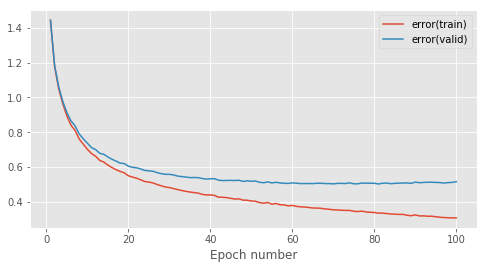

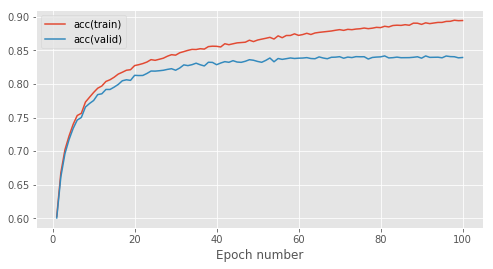

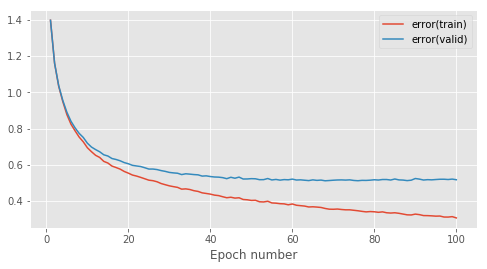

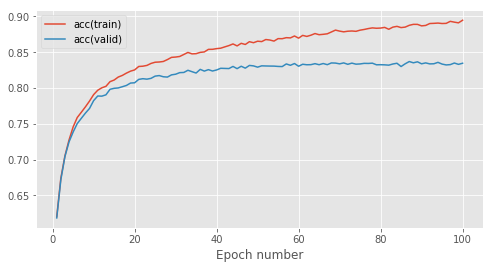

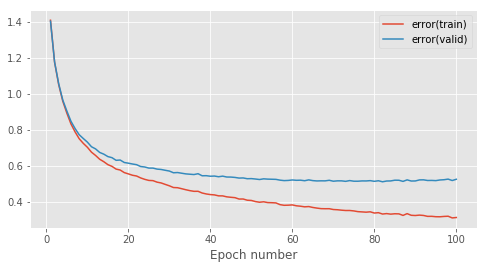

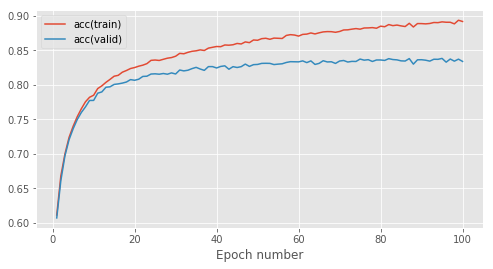

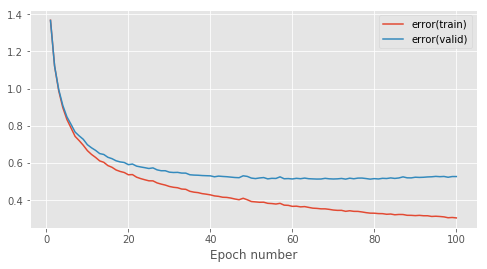

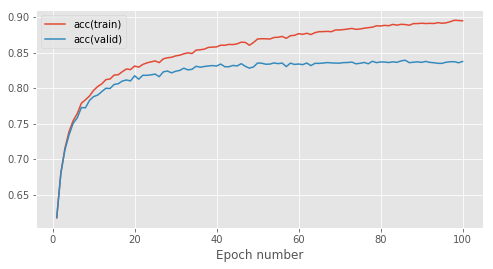

In [6]:
############## Adam With scheduler with specified restarts

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

#setup hyperparameters
learning_rate = 1e-4
learning_ranges = [1.05,1.1,1.15,1.2]
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

for learning_range in learning_ranges:
    

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    adam_scheduler_special = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / learning_range, max_learning_rate=learning_rate * learning_range,
                                                       total_iters_per_period=25,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=3.0)

    error = CrossEntropySoftmaxError() 

    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=adam_scheduler_special)